<br>
<br>
<br>
<br>

# 위치데이터와 앱 데이터 EDA

---

In [2]:
import pandas as pd
import numpy as np
pd.set_option('max_columns',999)

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
sns.set() 
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 
sns.set_style(style='white')
sns.set_context(context ='paper')

import datetime
import os

In [3]:
font_path = 'NanumSquareRoundR.ttf'
fontprop = fm.FontProperties(fname=font_path) # 얘네는 한번 선언만 하면 됨

In [ ]:
plt.rcParams["font.family"] = 'NanumGothic'

In [1]:
print('# 설정되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정되어있는 폰트 사이즈


NameError: name 'plt' is not defined

In [17]:
# 위치데이터와 앱 사용 데이터

sample_Location = pd.read_table('Bigdata_2_sample_Location.txt', error_bad_lines=False)
sample_AppUsage_usage_app_list = pd.read_table('Bigdata_3_sample_AppUsage_usage_app_list.txt', error_bad_lines=False)
sample_AppUsage_usage_sum_time = pd.read_table('Bigdata_3_sample_AppUsage_usage_sum_time.txt', error_bad_lines=False, encoding='cp949')

# 설문 데이터

PS_Question_1 = pd.read_csv('PS_Question_1.csv', encoding='cp949')
PS_Question_2 = pd.read_csv('PS_Question_2.csv', encoding='cp949')
PS_mobile = pd.read_csv('PS_mobile.csv', encoding='cp949')
PS_job = pd.read_csv('PS_job.csv', encoding='cp949')
PS_home = pd.read_csv('PS_home.csv', encoding='cp949')
PS_family = pd.read_csv('PS_family.csv', encoding='cp949')

# 한줄요약 데이터

sample_Location_final = pd.read_csv('Location_final.csv')
freq_category_matrix = pd.read_csv('freq_category_matrix.csv')
ps_all = pd.read_csv('ps_all.csv')

b'Skipping line 1095006: expected 21 fields, saw 22\nSkipping line 1095049: expected 21 fields, saw 22\nSkipping line 1096034: expected 21 fields, saw 22\n'
b'Skipping line 1140315: expected 21 fields, saw 22\n'
b'Skipping line 1234278: expected 21 fields, saw 22\nSkipping line 1236082: expected 21 fields, saw 22\nSkipping line 1238545: expected 21 fields, saw 22\nSkipping line 1238702: expected 21 fields, saw 22\nSkipping line 1238915: expected 21 fields, saw 22\nSkipping line 1242722: expected 21 fields, saw 22\n'
b'Skipping line 1256857: expected 21 fields, saw 22\nSkipping line 1256897: expected 21 fields, saw 22\nSkipping line 1256931: expected 21 fields, saw 22\nSkipping line 1257047: expected 21 fields, saw 22\nSkipping line 1257330: expected 21 fields, saw 22\nSkipping line 1257389: expected 21 fields, saw 22\nSkipping line 1257406: expected 21 fields, saw 22\n'
b'Skipping line 1350974: expected 21 fields, saw 22\n'
b'Skipping line 1450488: expected 21 fields, saw 22\nSkipping 

b'Skipping line 19664155: expected 8 fields, saw 9\n'
b'Skipping line 25067048: expected 8 fields, saw 9\nSkipping line 25067220: expected 8 fields, saw 9\nSkipping line 25067390: expected 8 fields, saw 9\nSkipping line 25067560: expected 8 fields, saw 9\nSkipping line 25067730: expected 8 fields, saw 9\nSkipping line 25067900: expected 8 fields, saw 9\nSkipping line 25068071: expected 8 fields, saw 9\n'
b'Skipping line 28225246: expected 8 fields, saw 9\nSkipping line 28225424: expected 8 fields, saw 9\nSkipping line 28225608: expected 8 fields, saw 9\nSkipping line 28225793: expected 8 fields, saw 9\nSkipping line 28225975: expected 8 fields, saw 9\nSkipping line 28226157: expected 8 fields, saw 9\nSkipping line 28226337: expected 8 fields, saw 9\nSkipping line 28226518: expected 8 fields, saw 9\nSkipping line 28226698: expected 8 fields, saw 9\nSkipping line 28226879: expected 8 fields, saw 9\nSkipping line 28227066: expected 8 fields, saw 9\nSkipping line 28227259: expected 8 field

FileNotFoundError: File b'freq_category_matrix.csv' does not exist

<br>
<br>
<br>
<br>

# sample_Location

<br>
null값이 적은 컬럼에 한하여 EDA 진행

---

In [5]:
sample_Location.head()

,idx,time,pid,placename,in_near,category,address,floor,lat,lng,loplat_id,place_tag,zipcode,area_name,area_tag,complex_name,complex_branch,area_id,area_lat,area_lng,complex_id
0,4,2017-09-06 08:44:43.000,H0123900,서울5호선,In,Subway Train,서울특별시 중구 회현동,-1.0,37.555104,126.970778,92237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,2017-09-06 08:45:12.000,I0274841,메디넷영동의원,Near,Others(Hospital),서울특별시 강남구 역삼1동,2.0,37.491746,127.030987,70186.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2017-09-06 09:02:05.000,I0274841,하나투어,Near,Travel Agency,서울특별시 강남구 역삼1동,16.0,37.491819,127.031087,70183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,2017-09-06 16:37:46.000,P0069737,서울3호선 안국역,In,Subway Station,서울특별시 종로구 종로1.2.3.4가동,-3.0,37.576556,126.985591,102318.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21,2017-09-06 16:40:57.000,P0053069,우리은행,Near,Bank,서울 동작구 노량진동 42-11,1.0,37.513165,126.937856,29984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# 3,641,462개의 row

len(sample_Location)

3641462

In [7]:
# 총 18463명의 패널 데이터가 존재

sample_Location['pid'].nunique()

18463

In [8]:
# 각 컬럼별 결측치 비율 확인
# 약 15%의 데이터는 아예 장소에 대한 정보가 없음
# 결측치가 50% 이상인 데이터에 대해서는 EDA를 진행하지 않음

sample_Location.isnull().sum() / len(sample_Location)

idx               0.000000
time              0.000000
pid               0.000000
placename         0.144341
in_near           0.144340
category          0.144340
address           0.166221
floor             0.156821
lat               0.152289
lng               0.152289
loplat_id         0.152284
place_tag         0.629312
zipcode           0.541312
area_name         0.697613
area_tag          0.697613
complex_name      0.977762
complex_branch    0.980798
area_id           0.697613
area_lat          0.697613
area_lng          0.697613
complex_id        0.972911
dtype: float64

In [9]:
# placename, in_near, category가 동시에 없는 데이터가 약 15%라는 것을 확인   
# 결국 저 셋에서는 동시에 결측치가 발생한게 맞음

len(sample_Location[lambda x: x.placename.isnull()][lambda x: x.in_near.isnull()][lambda x: x.category.isnull()]) / len(sample_Location)

0.14434010295864683

In [10]:
# placename, in_near, category에 결측치가 존재하는 데이터를 지움

sample_Location = sample_Location.dropna(thresh=11)

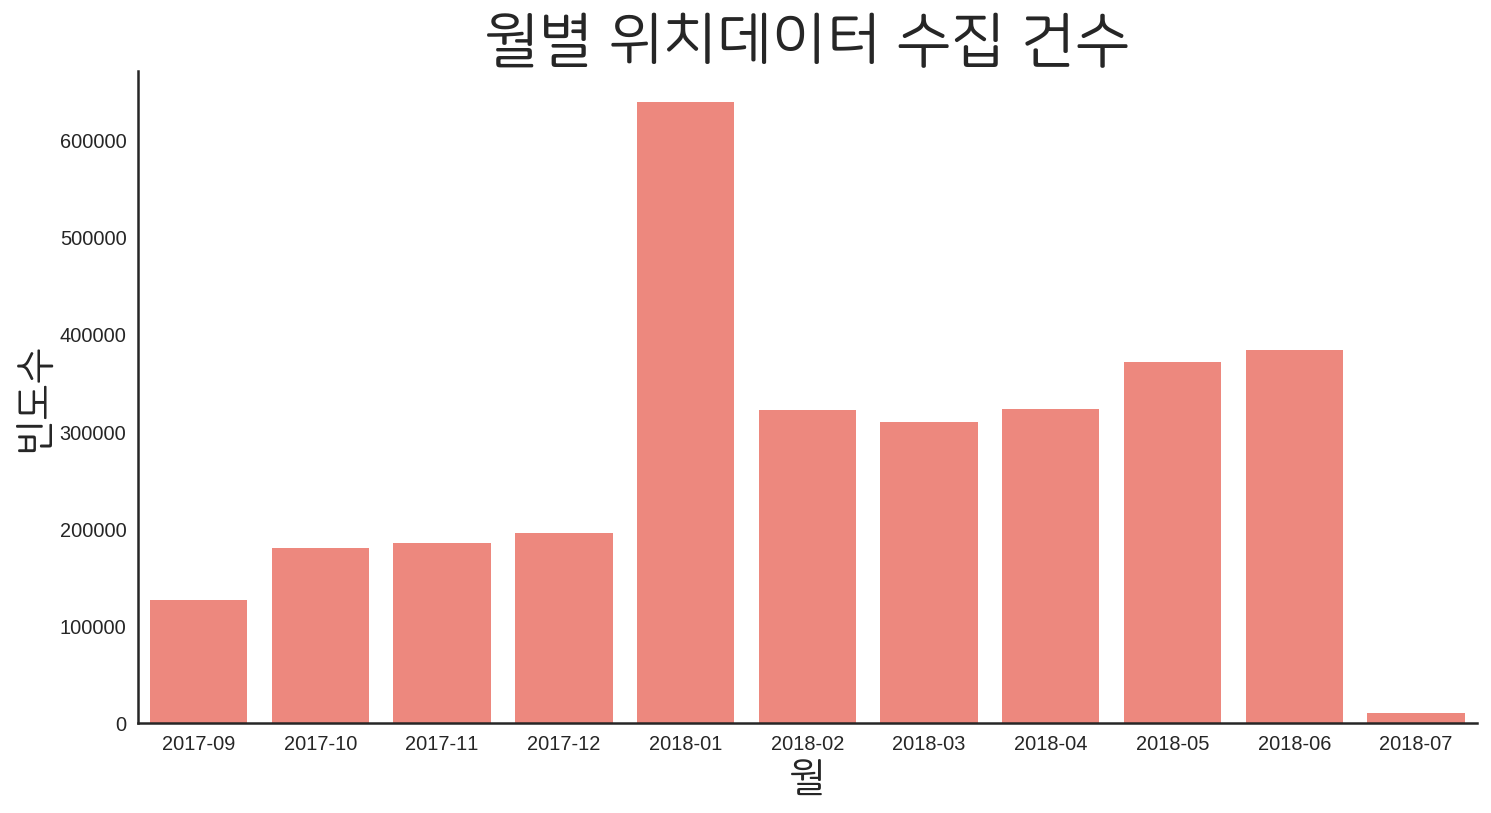

In [19]:
# 2017년의 데이터보다는 2018년의 데이터가 많고, 특히 2018년 1월에 집계된 데이터가 많음

sample_Location_month = sample_Location['time'].map(lambda x: x[:7]).reset_index().groupby('time').count()

plt.figure(figsize=(12,6))

sns.barplot(x=sample_Location_month.index, y=sample_Location_month['index'],  color='#ff796c')
sns.despine()

plt.xlabel('월', fontproperties=fontprop, fontsize=20)
plt.ylabel('빈도수', fontproperties=fontprop, fontsize=20)
plt.title('월별 위치데이터 수집 건수', fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.show()

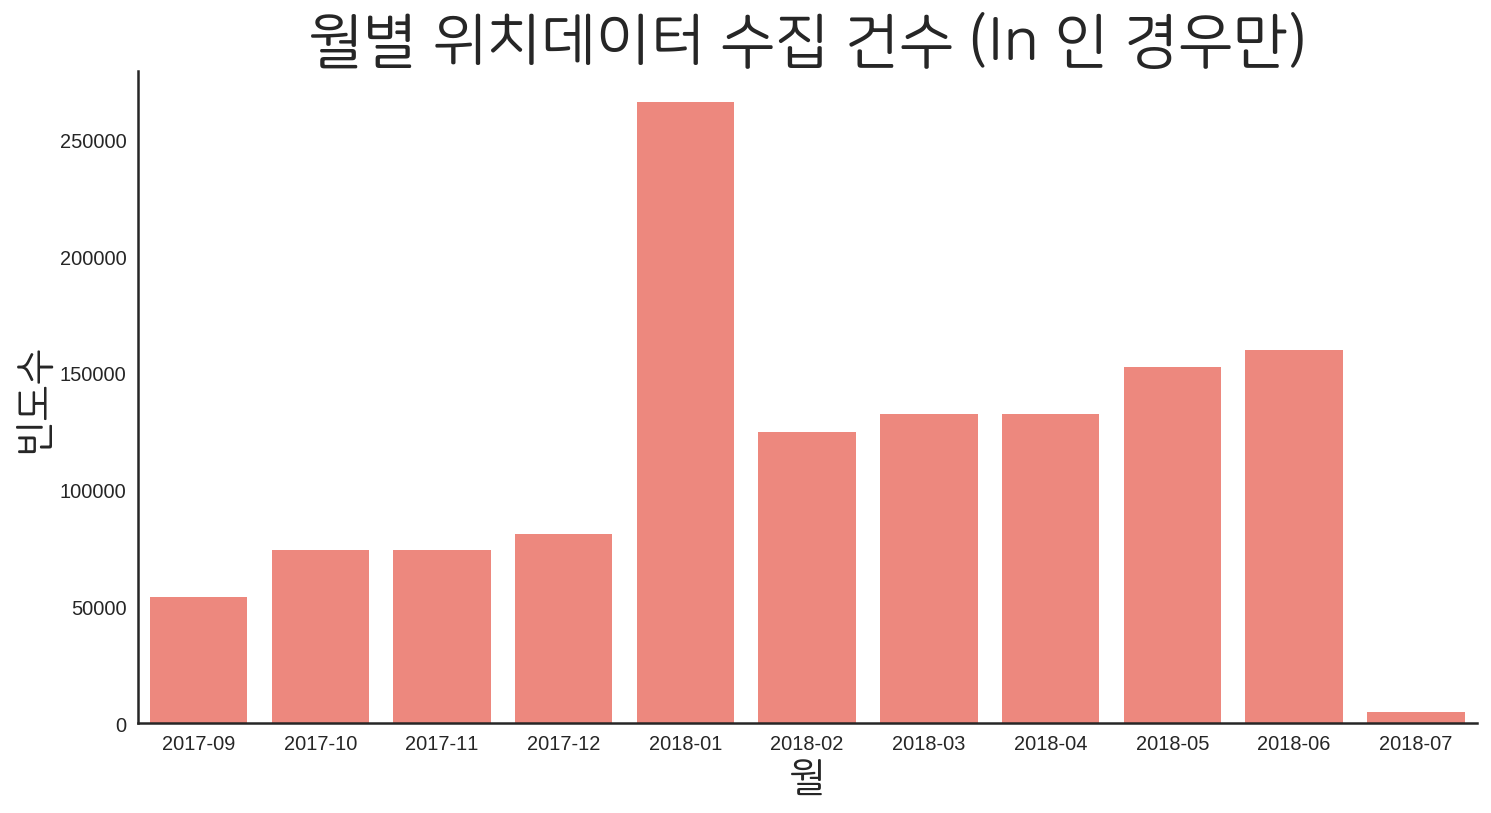

In [22]:
# in_near == 'In'인 데이터만 따로 보아도 비슷한 패턴

sample_Location_month = sample_Location[lambda x: x.in_near == 'In']['time'].map(lambda x: x[:7]).reset_index().groupby('time').count()

plt.figure(figsize=(12,6))

sns.barplot(x=sample_Location_month.index, y=sample_Location_month['index'],  color='#ff796c')
sns.despine()

plt.xlabel('월', fontproperties=fontprop, fontsize=20)
plt.ylabel('빈도수', fontproperties=fontprop, fontsize=20)
plt.title("월별 위치데이터 수집 건수 (In 인 경우만)", fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.show()

In [5]:
# 데이터가 수집된 첫 시점과 마지막 시점
# 작년 9월 6일부터 올해 7월 1일까지의 패널 이동 데이터가 담겨있음

sample_Location_time = sample_Location['time'].map(lambda x: x.split('.')[0])
sample_Location_time = sample_Location_time.map(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
# sample_Loaction_time = sample_Loaction['time'].map(lambda x: datetime.datetime.strftime(x,'%Y-%m-%d %H:%M:%S'))
print('min :', sample_Location_time.min(), ' , ' , 'max :', sample_Location_time.max())

min : 2017-09-06 08:44:43  ,  max : 2018-07-01 23:59:35


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


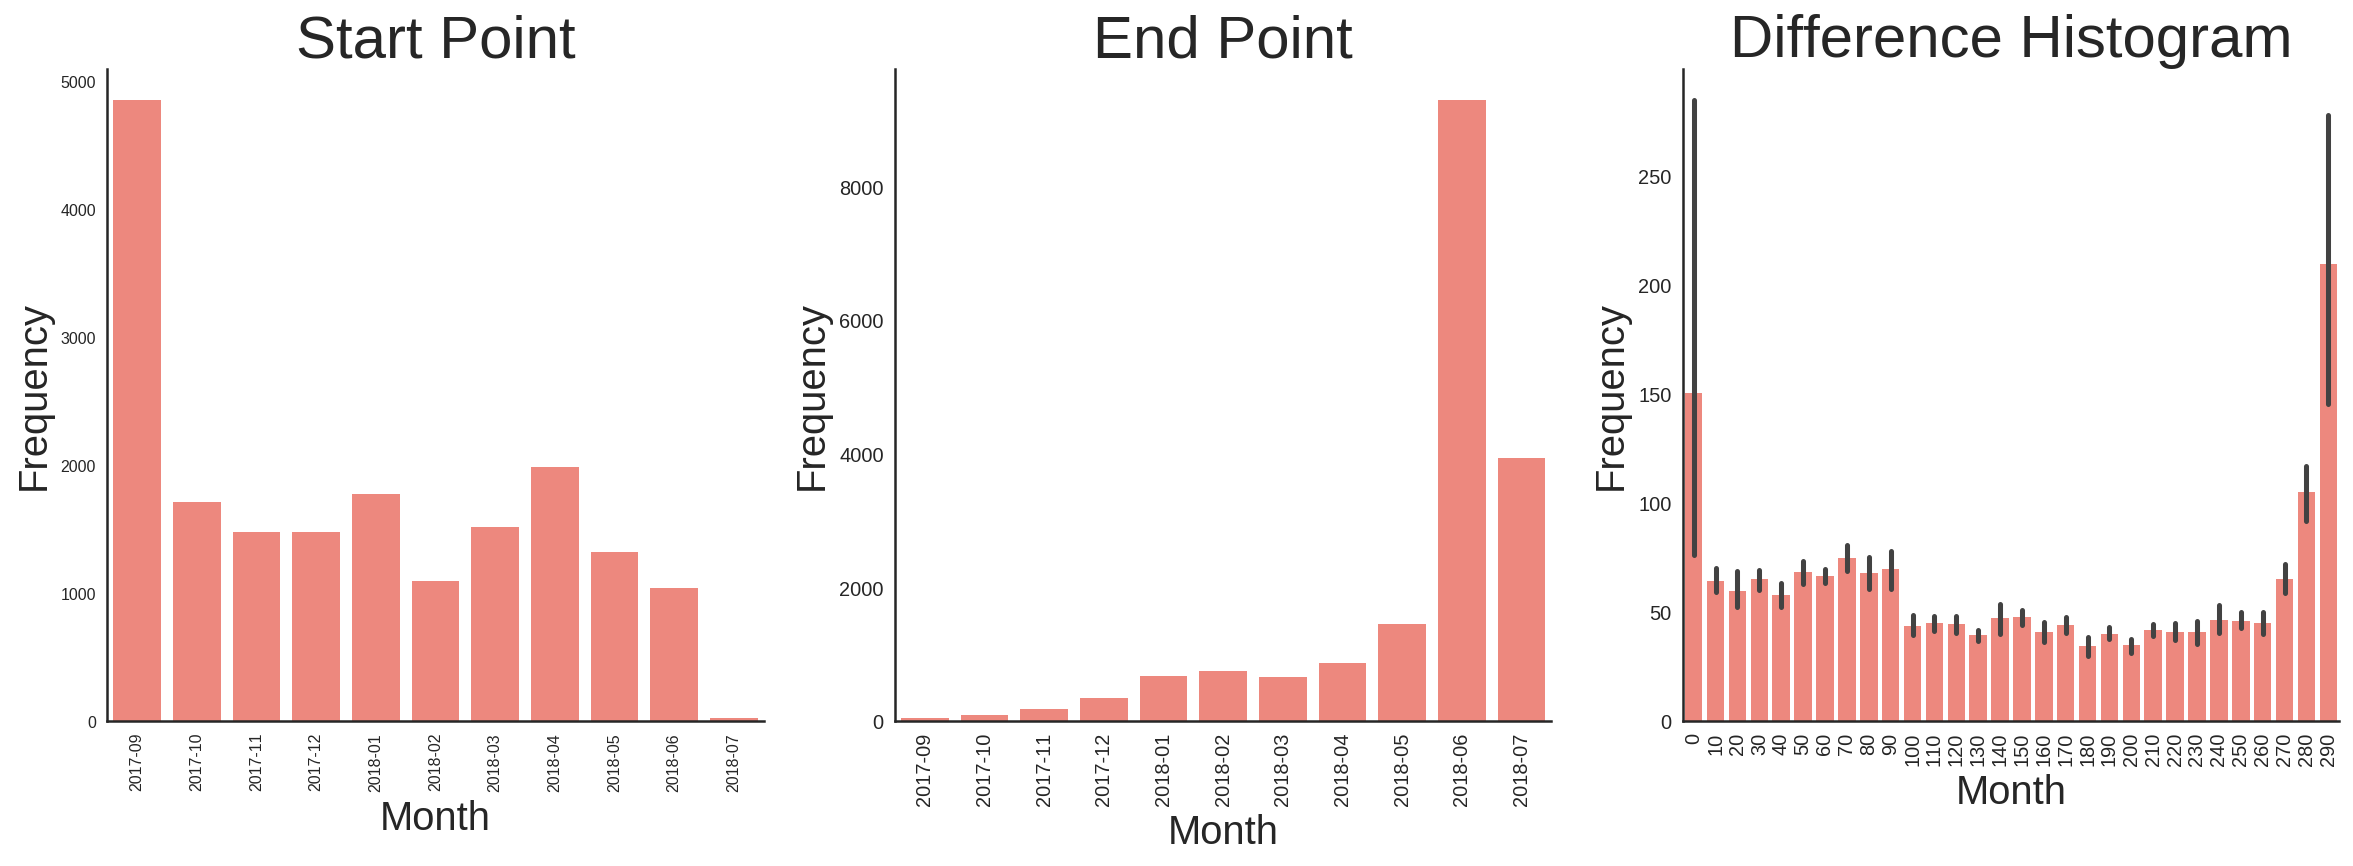

In [6]:
# 각 패널마다 데이터 수집이 시작된 시점과 끝난 시점이 각각 다르지 않을까?
# 데이터 수집이 시작된 17년 9월부터 위치데이터가 포착된 패널이 많긴 하지만, 이후 꾸준히 일정 수의 패널이 추가되는 모습
# 끝난 시점은 대부분 18년 6월으로 비슷하긴 하지만, 그 이전부터도 포착이 종료된 사람들이 있음
# 데이터가 수집된 기간은 각자 0일부터 280일까지 다양함
# 위치데이터 수집 기간이 패널마다 제각각이라는 것을 확인


sample_Location_duplicate = sample_Location.dropna(thresh=11)
sample_Location_duplicate['time'] = sample_Location_duplicate['time'].map(lambda x: x.split('.')[0][:10]).map(
    lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))

sample_Location_strptime = sample_Location_duplicate.groupby('pid')['time'].agg([min,max])
sample_Location_strptime['diff'] = sample_Location_strptime['max'] - sample_Location_strptime['min']
sample_Location_strptime['diff'] = sample_Location_strptime['diff'].map(lambda x: str(x).split(" ")[0])
sample_Location_strptime['min_month'] = sample_Location_strptime['min'].map(lambda x: str(x)[:7])
sample_Location_strptime['max_month'] = sample_Location_strptime['max'].map(lambda x: str(x)[:7])


plt.figure(figsize=(20,6))

plt.subplot(131)
sample_Location_strptime_min_month = sample_Location_strptime['min_month'].reset_index().groupby('min_month').count()
sns.barplot(x=sample_Location_strptime_min_month.index, y=sample_Location_strptime_min_month['pid'],  color='#ff796c')
sns.despine()
plt.xlabel('Month', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title("Start Point", fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)

plt.subplot(132)
sample_Location_strptime_max_month = sample_Location_strptime['max_month'].reset_index().groupby('max_month').count()
sns.barplot(x=sample_Location_strptime_max_month.index, y=sample_Location_strptime_max_month['pid'],  color='#ff796c')
sns.despine()
plt.xlabel('Month', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title("End Point", fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)

plt.subplot(133)
sample_Location_strptime_diff = sample_Location_strptime['diff'].reset_index().groupby('diff').count().reset_index()
sample_Location_strptime_diff['diff'] = sample_Location_strptime_diff['diff'].map(lambda x: int(x))//10*10
sample_Location_strptime_diff = sample_Location_strptime_diff.sort_values(by='diff')
sns.barplot(x='diff', y='pid', data=sample_Location_strptime_diff, color='#ff796c')
sns.despine()
plt.xlabel('Month', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title("Difference Histogram", fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)

plt.show()

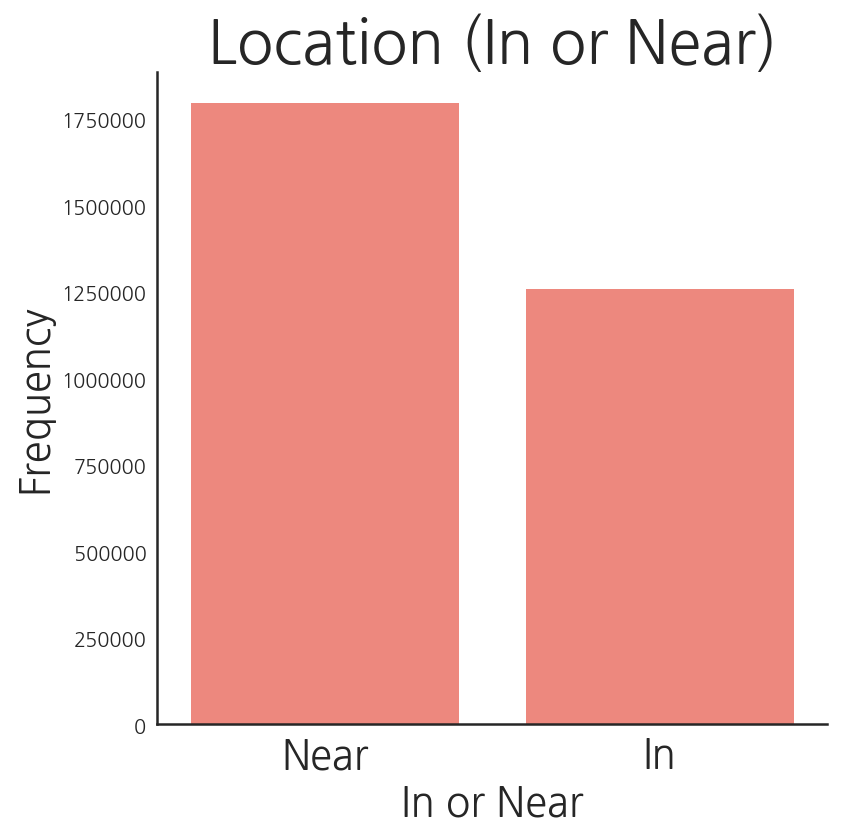

In [40]:
# 역시 In에 해당하는 데이터보다는 근처를 지나간 Near 데이터가 더 많았음

sample_Location_in_near = sample_Location['in_near'].value_counts()

plt.figure(figsize=(6,6))

sns.barplot(x=sample_Location_in_near.index, y=sample_Location_in_near.values,  color='#ff796c')
sns.despine()

plt.xlabel('In or Near', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('Location (In or Near)', fontsize=30)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=10) 

plt.show()

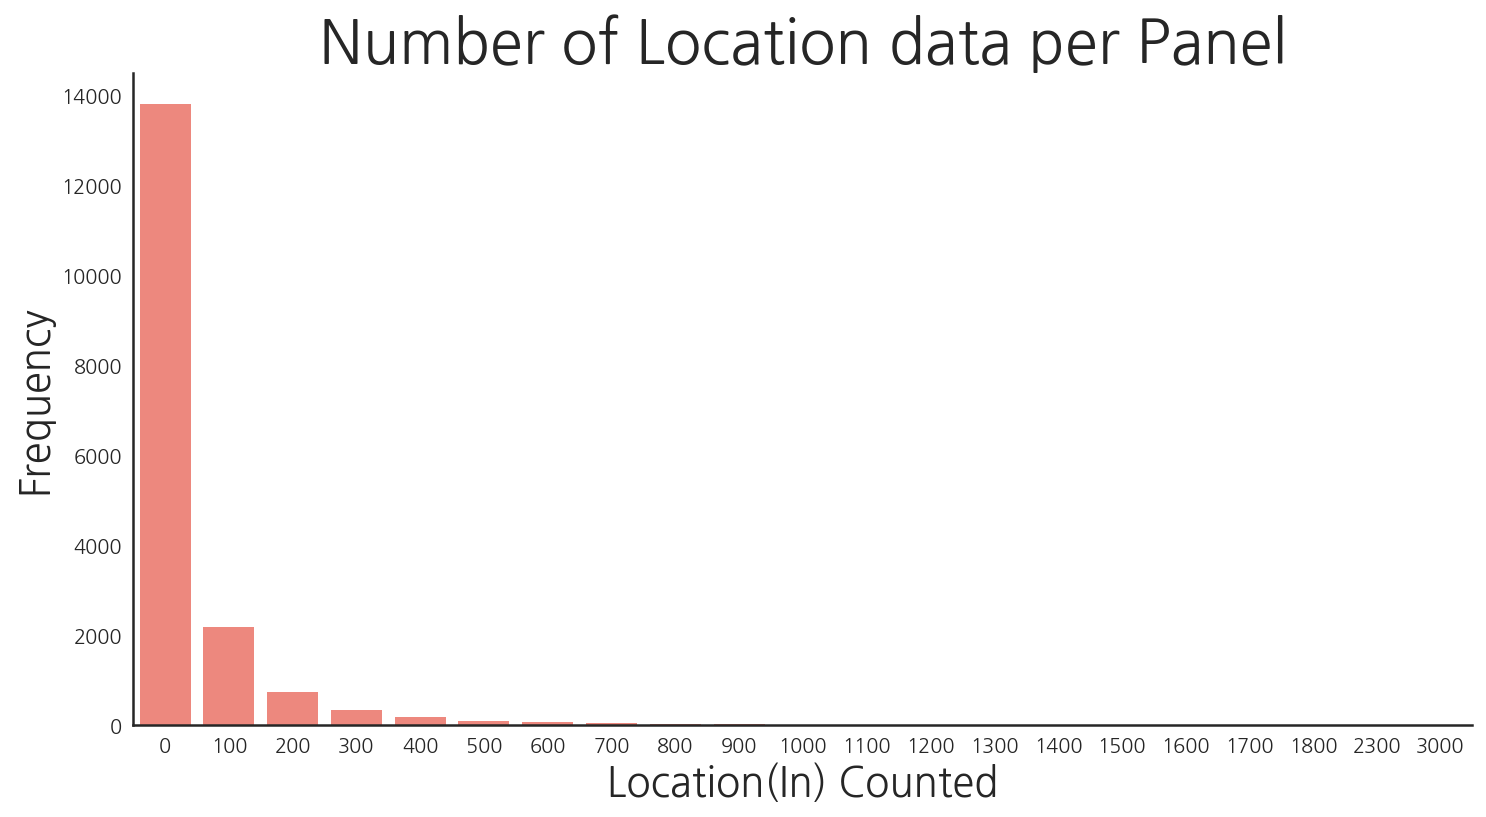

In [46]:
# 단말기 근처를 지나간 것(Near)은 중요한 정보가 되지 못하므로, In인 경우에 한하여 각 패널당 어느 정도의 데이터가 집계되었는지 확인
# 0 -> 0~99개의 데이터, 100 -> 100~199개의 데이터, ....
# 대부분의 패널이 300개 미만의 위치 데이터를 제공하였음
# 생각보다 위치 데이터 정보의 질이 좋지 못함....

Location_count = sample_Location[lambda x: x.in_near == 'In']['pid'].value_counts().map(lambda x: x//100*100).value_counts()

plt.figure(figsize=(12,6))
plt.xlabel('Location(In) Counted', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('Number of Location data per Panel', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

sns.barplot(x=Location_count.index, y=Location_count.values,  color='#ff796c')
sns.despine()

plt.show()

In [7]:
# 집계된 데이터의 수와 기간 사이에는 양의 상관관계가 있을까?
# 상식적으로 집계 기간이 길수록 포착된 데이터도 많아야 할 것이다

sample_Location_strptime = sample_Location_strptime.reset_index()

sample_Location_length = sample_Location[lambda x: x.in_near == 'In']['pid'].value_counts().reset_index()
sample_Location_length.columns = ['pid', 'count']

sample_Location_len_strp = sample_Location_length.merge(sample_Location_strptime, how='inner', on='pid')
sample_Location_len_strp['diff'] = sample_Location_len_strp['diff'].map(lambda x: int(x))
sample_Location_len_strp['count_diff_ratio'] = (sample_Location_len_strp['count']/sample_Location_len_strp['diff']).round(1)

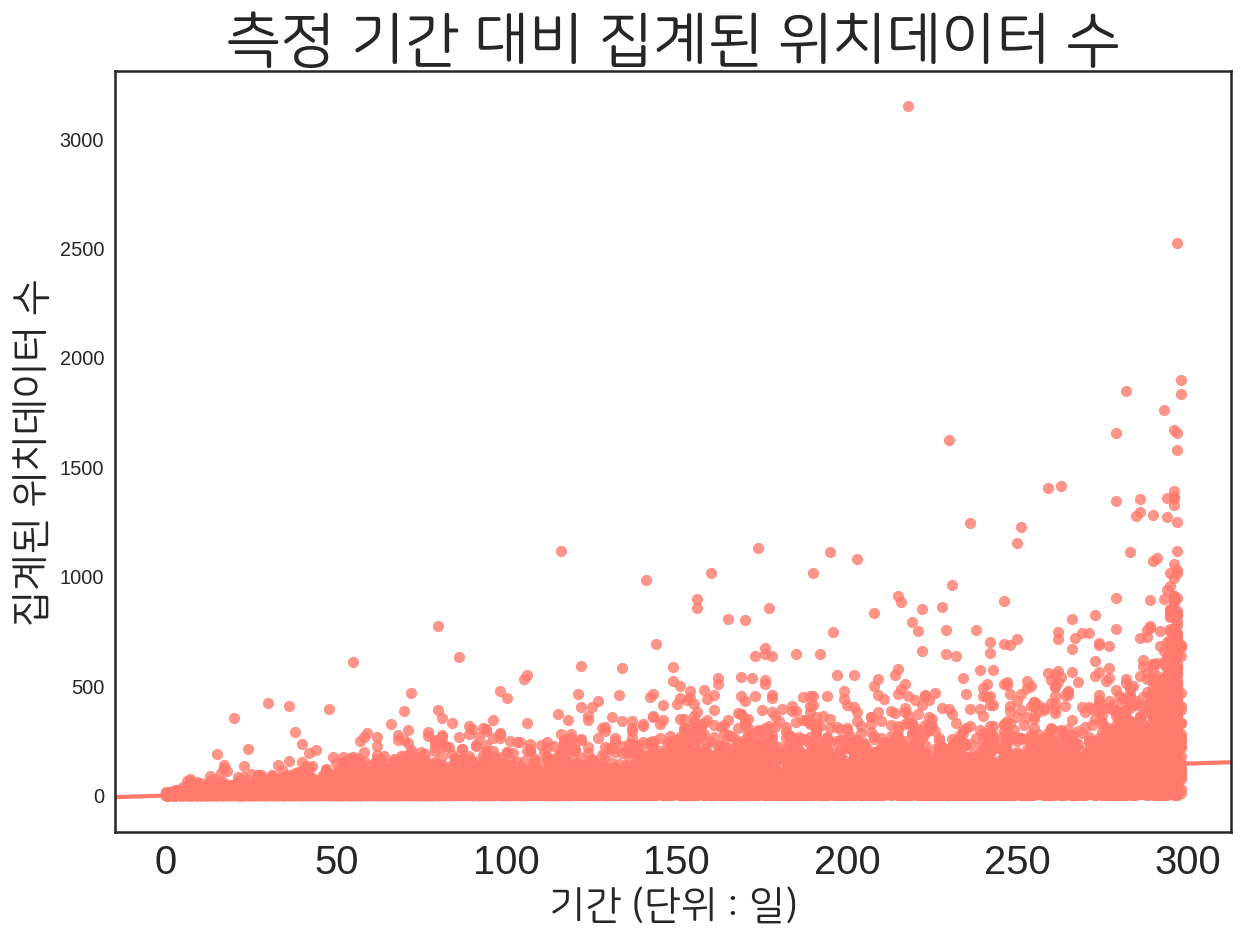

In [9]:
# 일단 보기에는 기간에 상관없이 300건 미만으로 집계된 패널이 다수
# 어쨌든 기간이 길어질수록 집계되는 위치데이터도 많아지긴 함

plt.figure(figsize=(10,7))

sns.regplot(x="diff", y="count", data=sample_Location_len_strp, color='#ff796c' )

plt.xlabel('기간 (단위 : 일)', fontproperties=fontprop, fontsize=20)
plt.ylabel('집계된 위치데이터 수', fontproperties=fontprop, fontsize=20)
plt.title('측정 기간 대비 집계된 위치데이터 수', fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=10) 

plt.show()

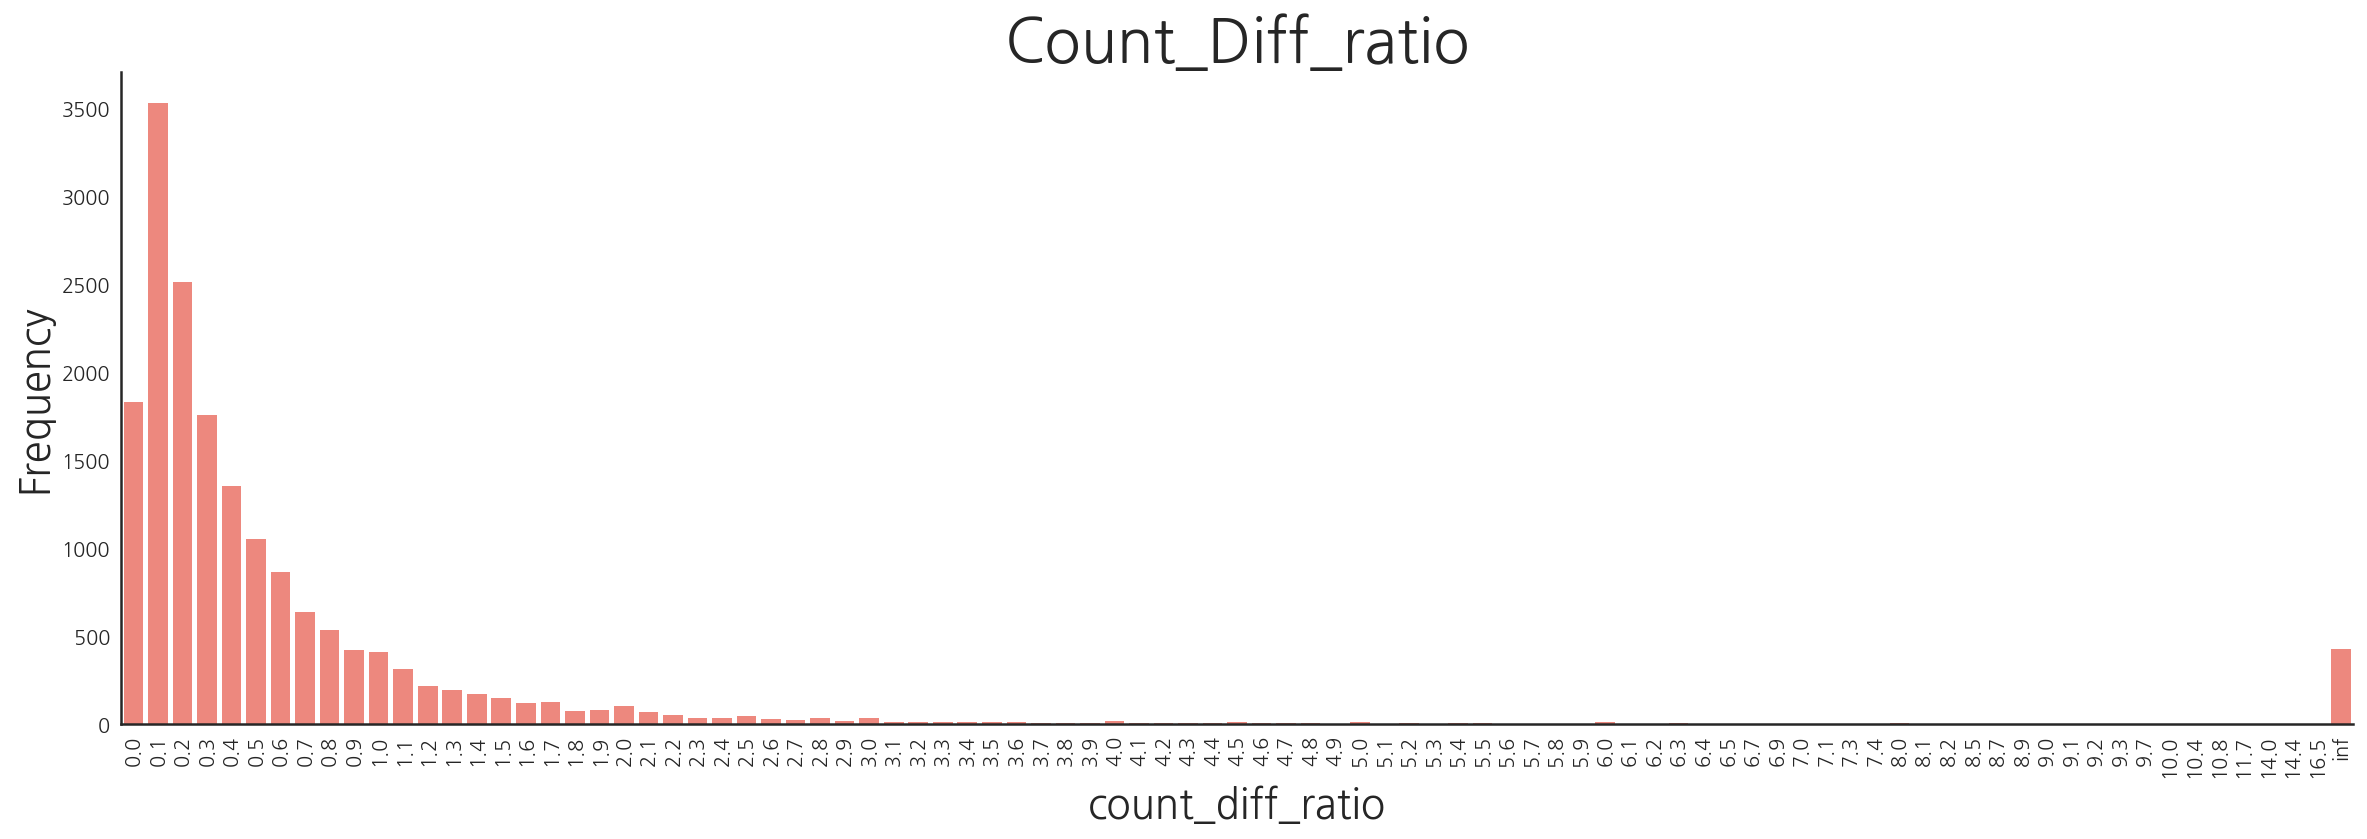

In [45]:
# 집계기간과 집계된 데이터 수의 비율
# 가장 많이 집계된 0.1 의 의미 : 하루에 집계된 데이터 수가 0.1개~0.1999개 (5일~10일에 한번 꼴로 위치데이터 들어옴)
# 로플랫 단말기가 있는 곳을 안가서일까? 하루에 1번 이상 집계된 사람이 드물 정도...

sample_Location_ratio = sample_Location_len_strp.groupby('count_diff_ratio')['pid'].count()

plt.figure(figsize=(20,6))
plt.xlabel('count_diff_ratio', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('Count_Diff_ratio', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)

sns.barplot(x=sample_Location_ratio.index, y=sample_Location_ratio.values, color='#ff796c')
sns.despine()

plt.show()

In [47]:
# 총 156,569곳의 위치에 대한 데이터

len(sample_Location['placename'].value_counts())

156569

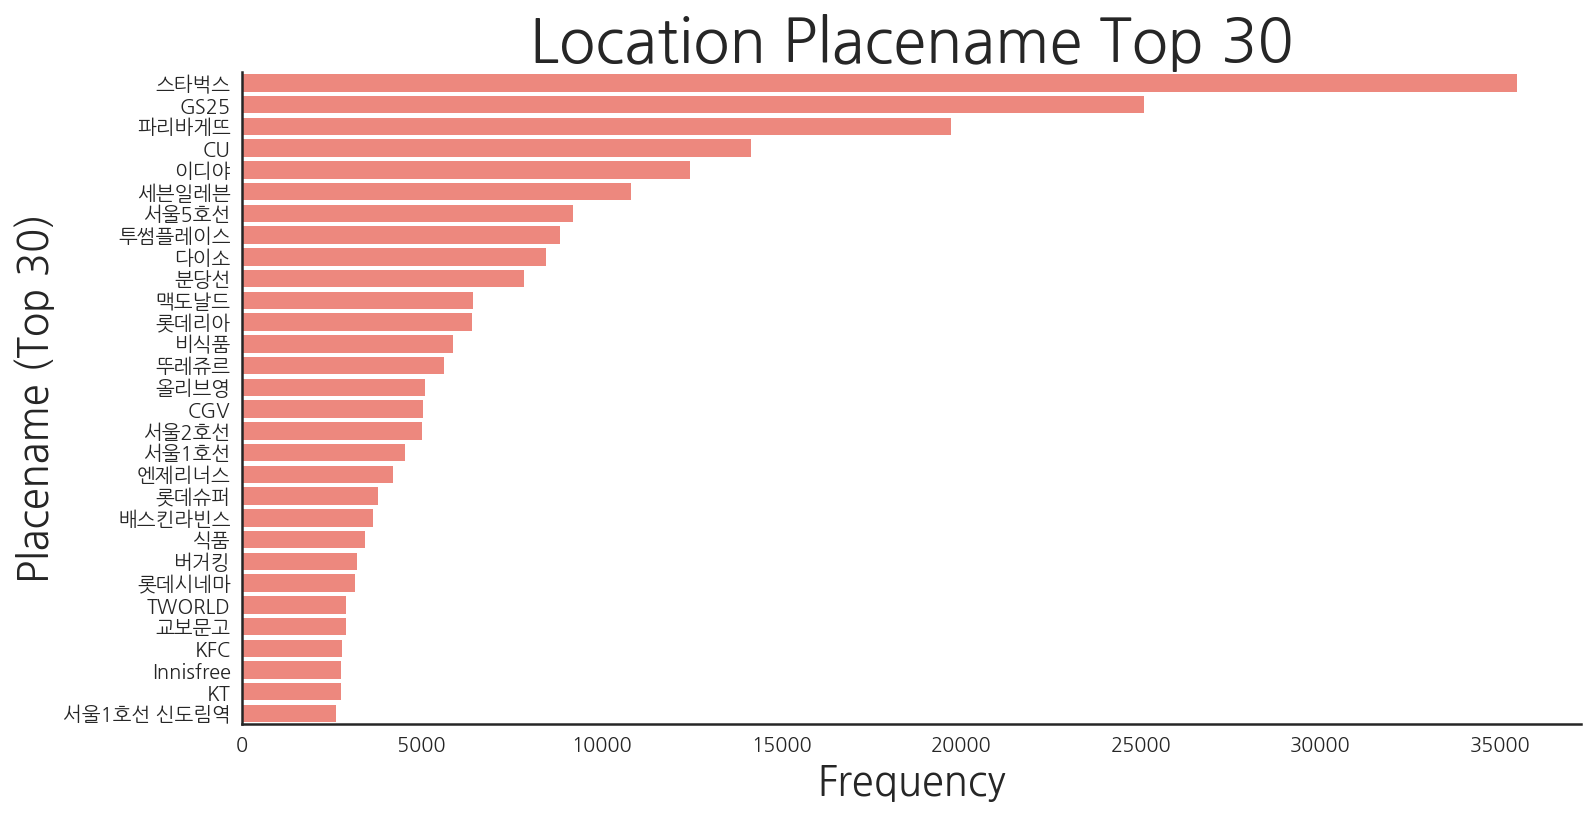

In [110]:
# 사람들이 가장 많이 방문한 곳 상위 30개
# 편의점과 까페가 상위권을 차지하고 있음

Location_placename_top30 = sample_Location[lambda x: x.in_near == 'In']['placename'].value_counts()[:30]

plt.figure(figsize=(12,6))
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Placename (Top 30)', fontsize=20)
plt.title('Location Placename Top 30', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

sns.barplot(x=Location_placename_top30.values, y=Location_placename_top30.index,  color='#ff796c')
sns.despine()


plt.show()

In [49]:
# 총 216개의 카테고리가 존재

len(sample_Location['category'].value_counts())

216

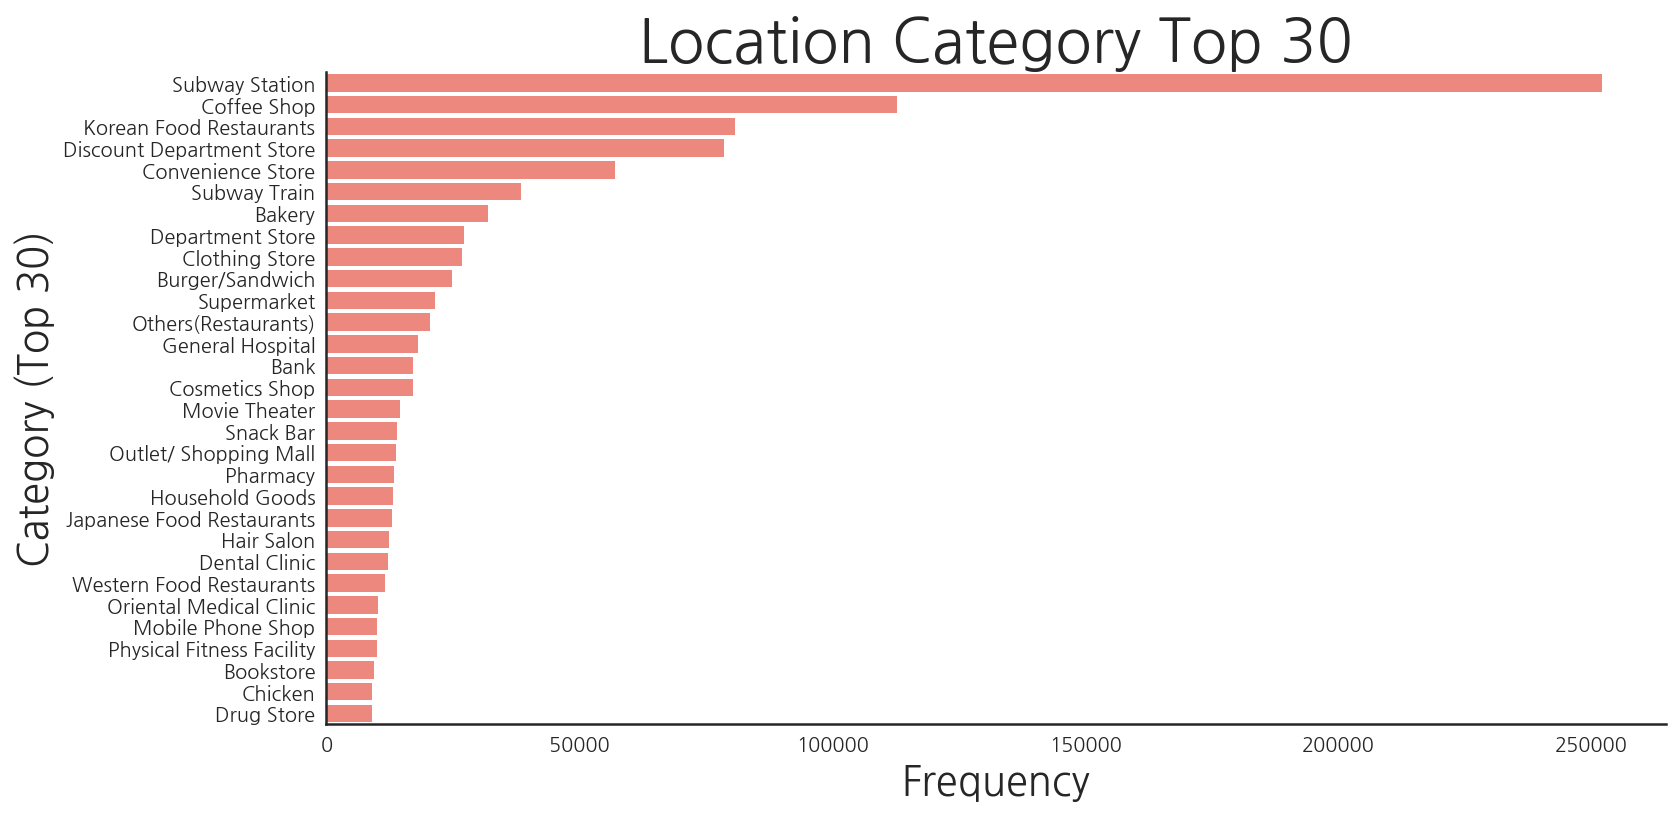

In [111]:
# 빈도가 높은 카테고리 상위 30개
# 지하철, 카페, 한식점, 편의점, 아울렛 순으로 방문 기록이 많음

Location_category_top30 = sample_Location[lambda x: x.in_near == 'In']['category'].value_counts()[:30]

plt.figure(figsize=(12,6))
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Category (Top 30)', fontsize=20)
plt.title('Location Category Top 30', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

sns.barplot(x=Location_category_top30.values, y=Location_category_top30.index,  color='#ff796c')
sns.despine()

plt.show()

In [52]:
sample_Location_address = sample_Location['address'].map(lambda x: str(x).split(" ")[0]).map(lambda x: 
                                                                   '서울' if x in ['서울','서울특별시','서울시'] 
                                                                   else '경기' if x in ['경기','경기도']
                                                                   else '인천' if x in ['인천','인천광역시','인천시']
                                                                   else '부산' if x in ['부산','부산광역시','부산시']
                                                                   else '대전' if x in ['대전','대전시','대전광역시']
                                                                   else '경남' if x in ['경남','경상남도']
                                                                   else '경북' if x in ['경북','경상북도']
                                                                   else '대구' if x in ['대구','대구광역시']
                                                                   else '광주' if x in ['광주','광주광역시']
                                                                   else '전북' if x in ['전북','전라북도']
                                                                   else '울산' if x in ['울산','울산광역시']
                                                                   else '전남' if x in ['전남','전라남도']
                                                                   else '강원' if x in ['강원','강원도']
                                                                   else '충북' if x in ['충북','충청북도']
                                                                   else '제주' if x in ['제주','제주특별자치도']
                                                                   else '세종' if x in ['세종','세종특별자치시']
                                                                   else '충남' if x in ['충남','충청남도']
                                                                   else x
                                                                    ).value_counts()

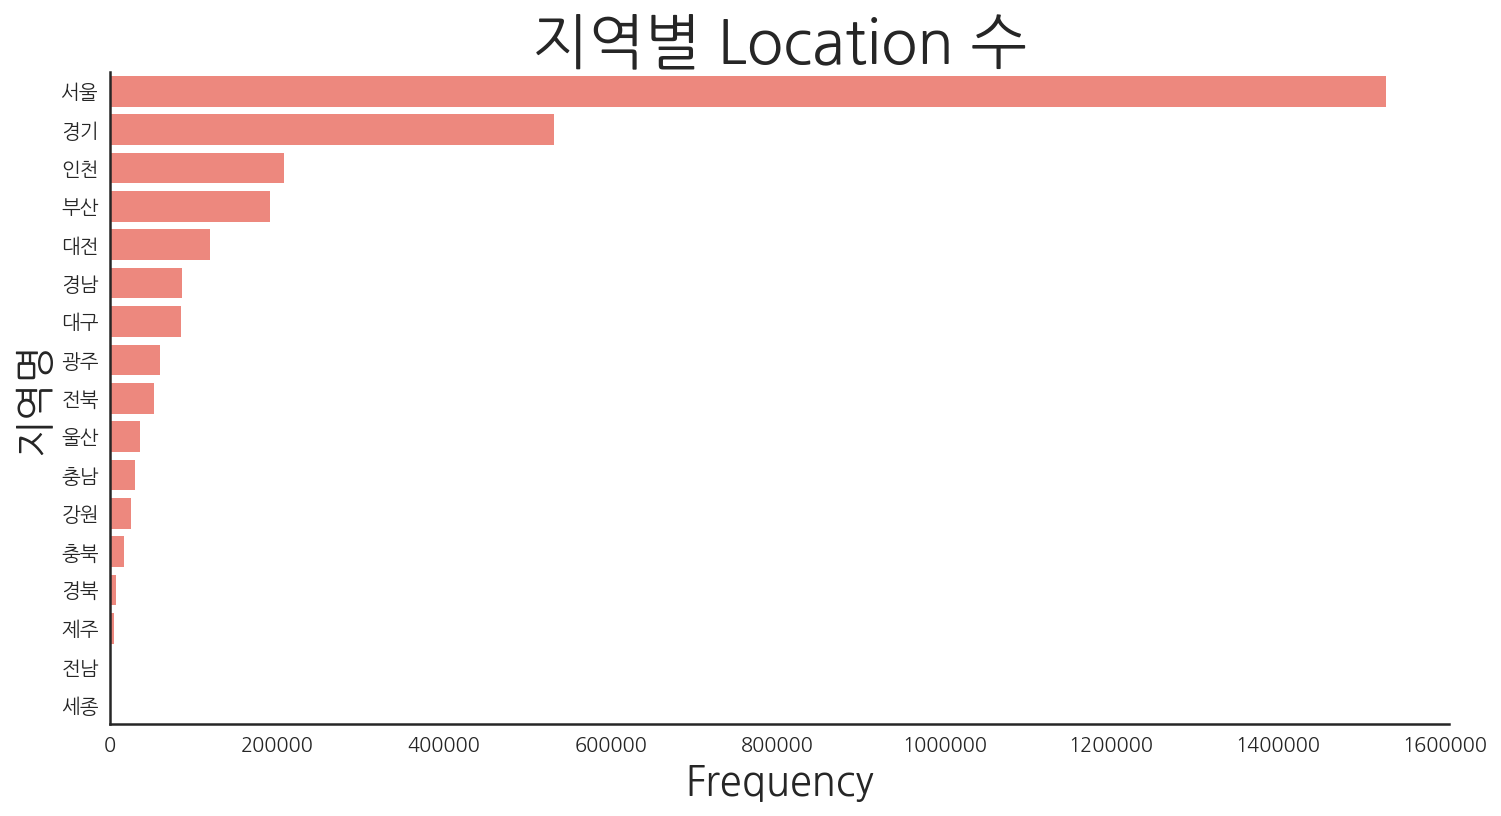

In [54]:
# 서울 및 경기 지역에서 포착된 데이터가 압도적으로 많은 것을 확인

sample_Location_address = sample_Location_address[lambda x: x.index != 'nan'][lambda x: x.index != 'None'][lambda x: x.values > 10]

plt.figure(figsize=(12,6))
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('지역명', fontsize=20)
plt.title('지역별 Location 수', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

sns.barplot(x=sample_Location_address.values, y=sample_Location_address.index,  color='#ff796c')
sns.despine()

plt.show()

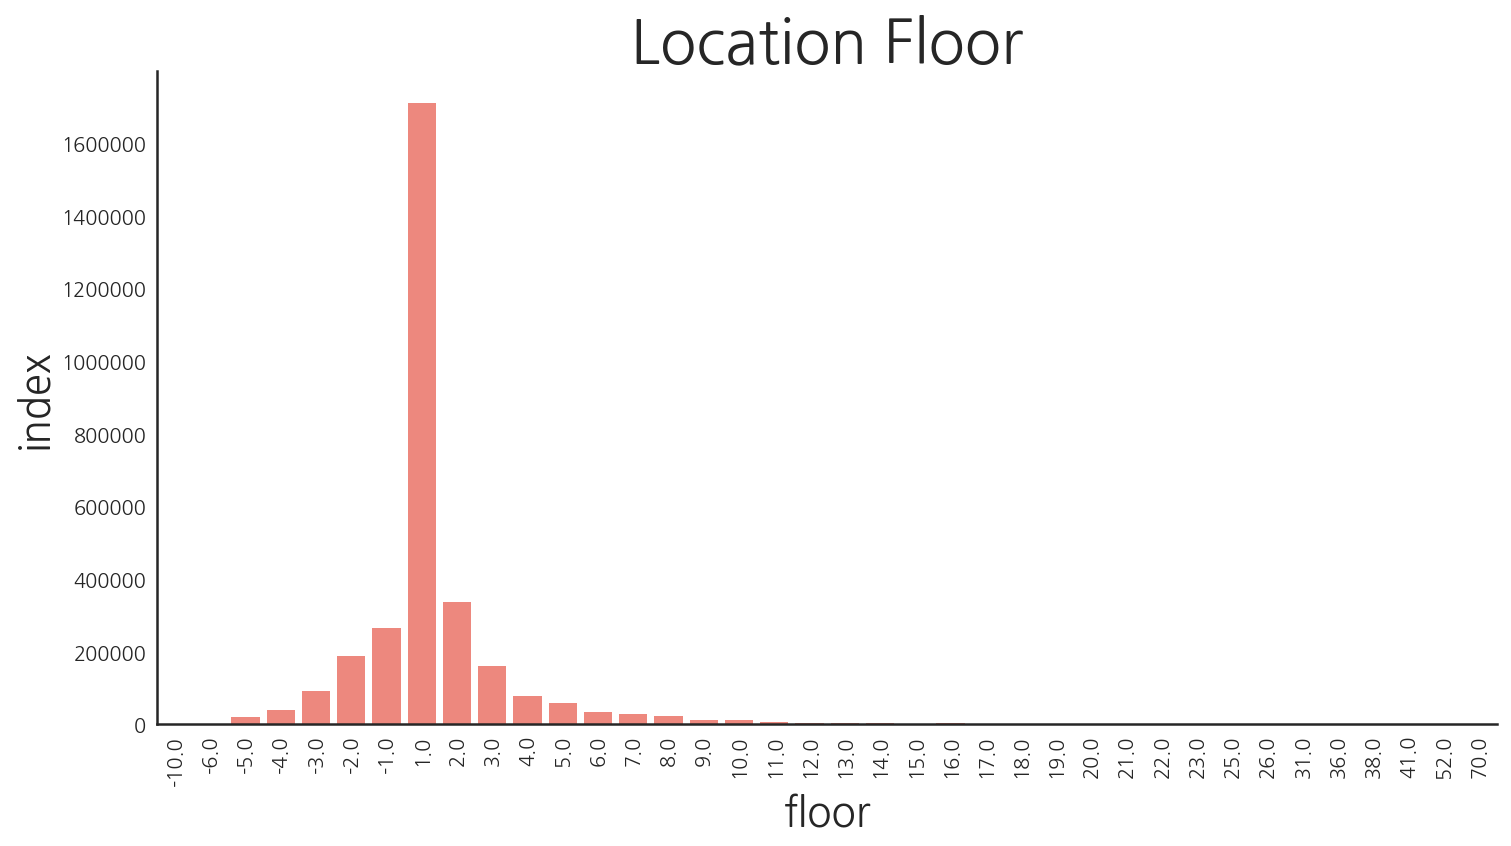

In [65]:
# Floor는 역시 1층이 압도적, 지하나 지상의 데이터도 어느 정도 관찰됨

sample_Location_floor = sample_Location['floor'][lambda x: x.notnull()].reset_index().groupby('floor').count().reset_index()

plt.figure(figsize=(12,6))
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Floor', fontsize=20)
plt.title('Location Floor', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)

sns.barplot(x='floor', y='index', data= sample_Location_floor,  color='#ff796c')
sns.despine()

plt.show()

In [57]:
sample_Location.head()

,idx,time,pid,placename,in_near,category,address,floor,lat,lng,loplat_id,place_tag,zipcode,area_name,area_tag,complex_name,complex_branch,area_id,area_lat,area_lng,complex_id
0,4,2017-09-06 08:44:43.000,H0123900,서울5호선,In,Subway Train,서울특별시 중구 회현동,-1.0,37.555104,126.970778,92237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,2017-09-06 08:45:12.000,I0274841,메디넷영동의원,Near,Others(Hospital),서울특별시 강남구 역삼1동,2.0,37.491746,127.030987,70186.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2017-09-06 09:02:05.000,I0274841,하나투어,Near,Travel Agency,서울특별시 강남구 역삼1동,16.0,37.491819,127.031087,70183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,2017-09-06 16:37:46.000,P0069737,서울3호선 안국역,In,Subway Station,서울특별시 종로구 종로1.2.3.4가동,-3.0,37.576556,126.985591,102318.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21,2017-09-06 16:40:57.000,P0053069,우리은행,Near,Bank,서울 동작구 노량진동 42-11,1.0,37.513165,126.937856,29984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# 306,896개의 loplat 단말기가 포착

sample_Location['loplat_id'].nunique()

305868

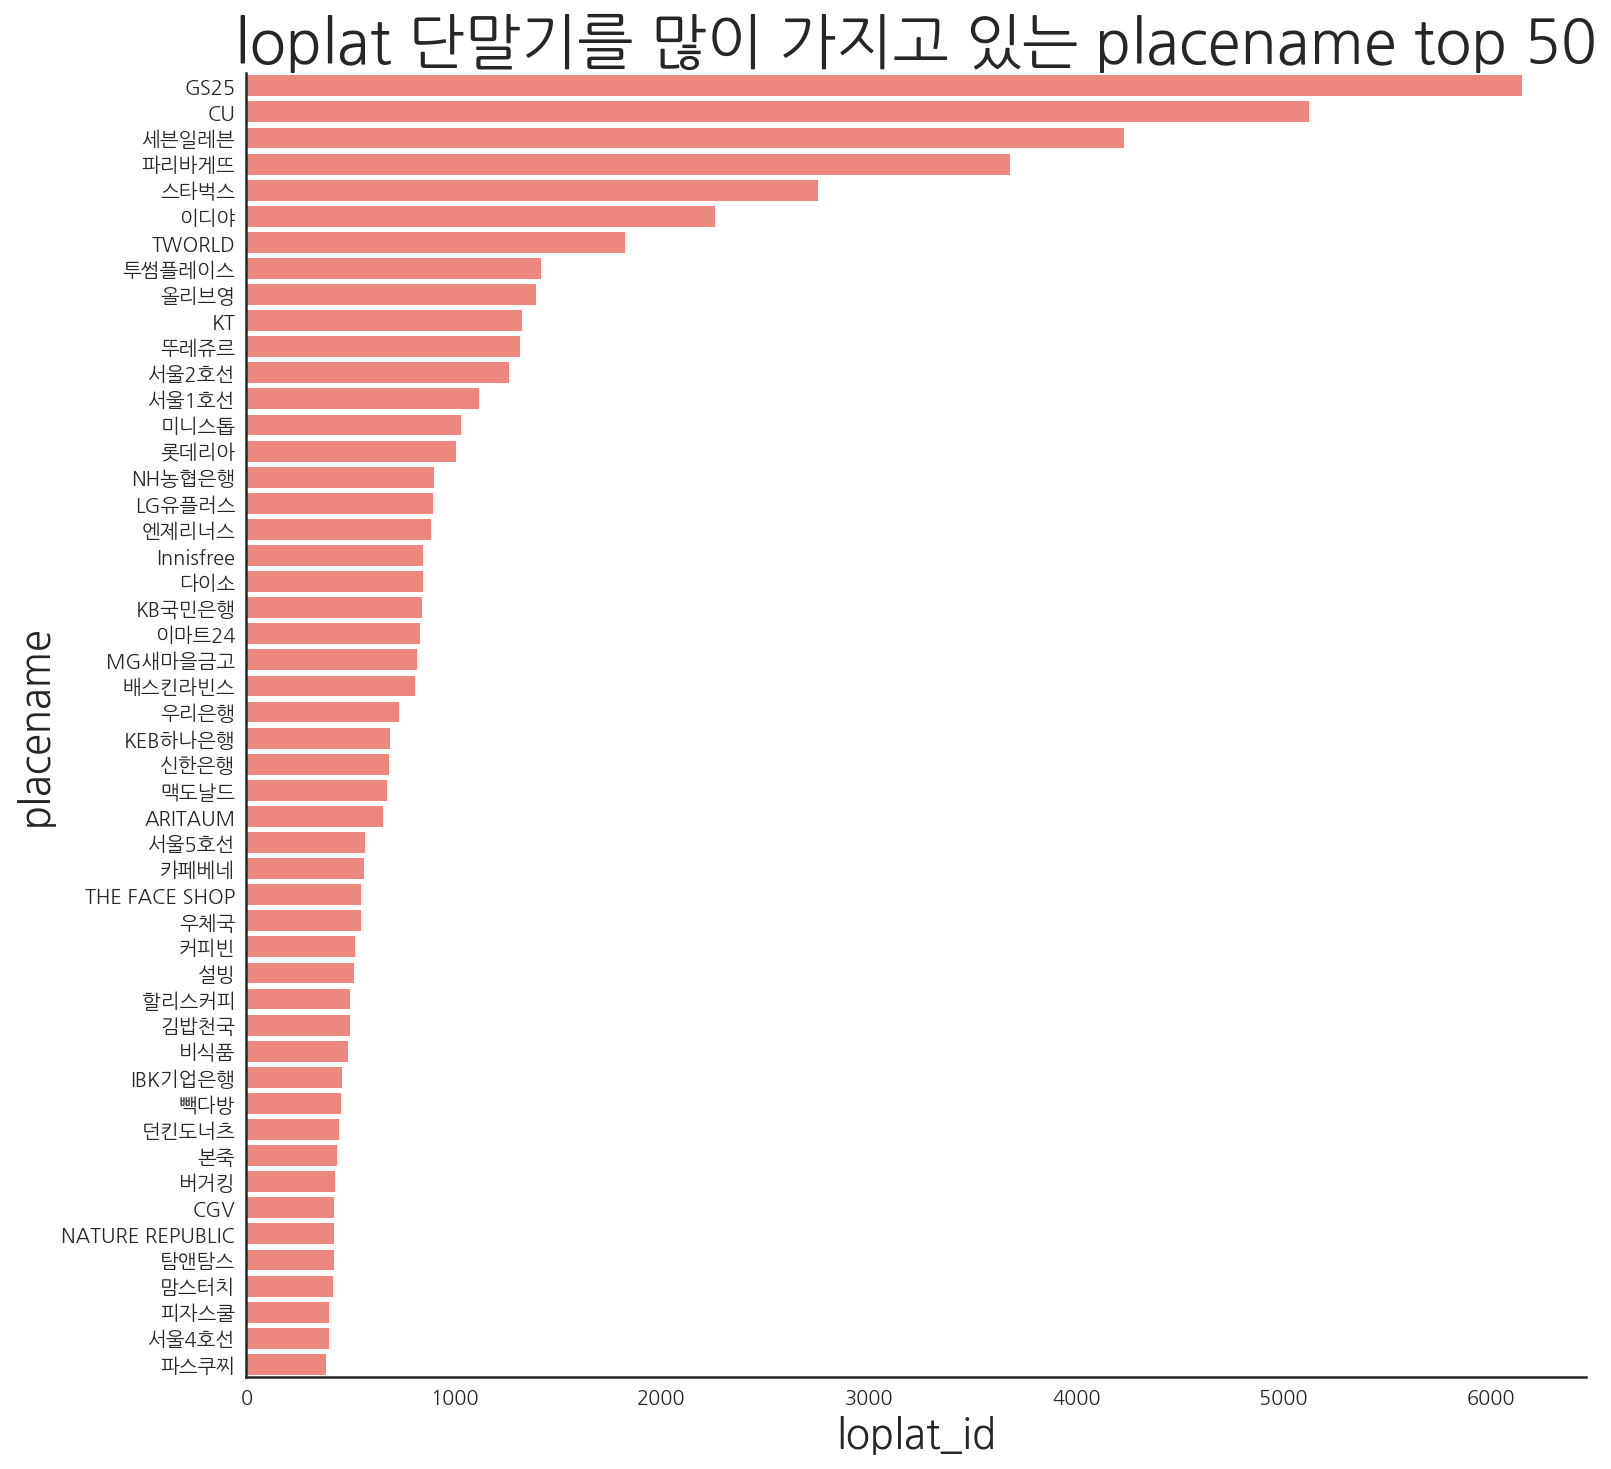

In [78]:
# 단말기를 많이 가지고 있는 Placename top50
# 전부 프랜차이즈 업종, 까페와 편의점이 상위권을 차지


sample_Location_loplat_num = sample_Location.groupby('placename')['loplat_id'].nunique().reset_index().sort_values(by='loplat_id', ascending=False)
sample_Location_loplat_top50 = sample_Location_loplat_num.head(50)

plt.figure(figsize=(12,12))
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Placename (Top 50)', fontsize=20)
plt.title('loplat 단말기를 많이 가지고 있는 placename top 50', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

sns.barplot(x='loplat_id', y='placename', data=sample_Location_loplat_top50, color='#ff796c')
sns.despine()

plt.show()

In [112]:
# 306896개의 장소 중 사람들이 많이 방문한 곳 top 100

sample_Location_popular_loplat = (
                                    sample_Location[lambda x: x.in_near == 'In'].groupby('loplat_id')['idx'].count()
                                      .sort_values(ascending=False)[:100]
                                      .reset_index()
                                      .iloc[0:100,:]
)

sample_Location_loplat_dict = sample_Location.drop_duplicates(subset='loplat_id')[['placename','address','loplat_id']]
sample_Location_popular_loplat = sample_Location_popular_loplat.merge(sample_Location_loplat_dict, how='inner', on='loplat_id')
sample_Location_popular_loplat.columns = ['loplat_id', 'count', 'placename', 'address']

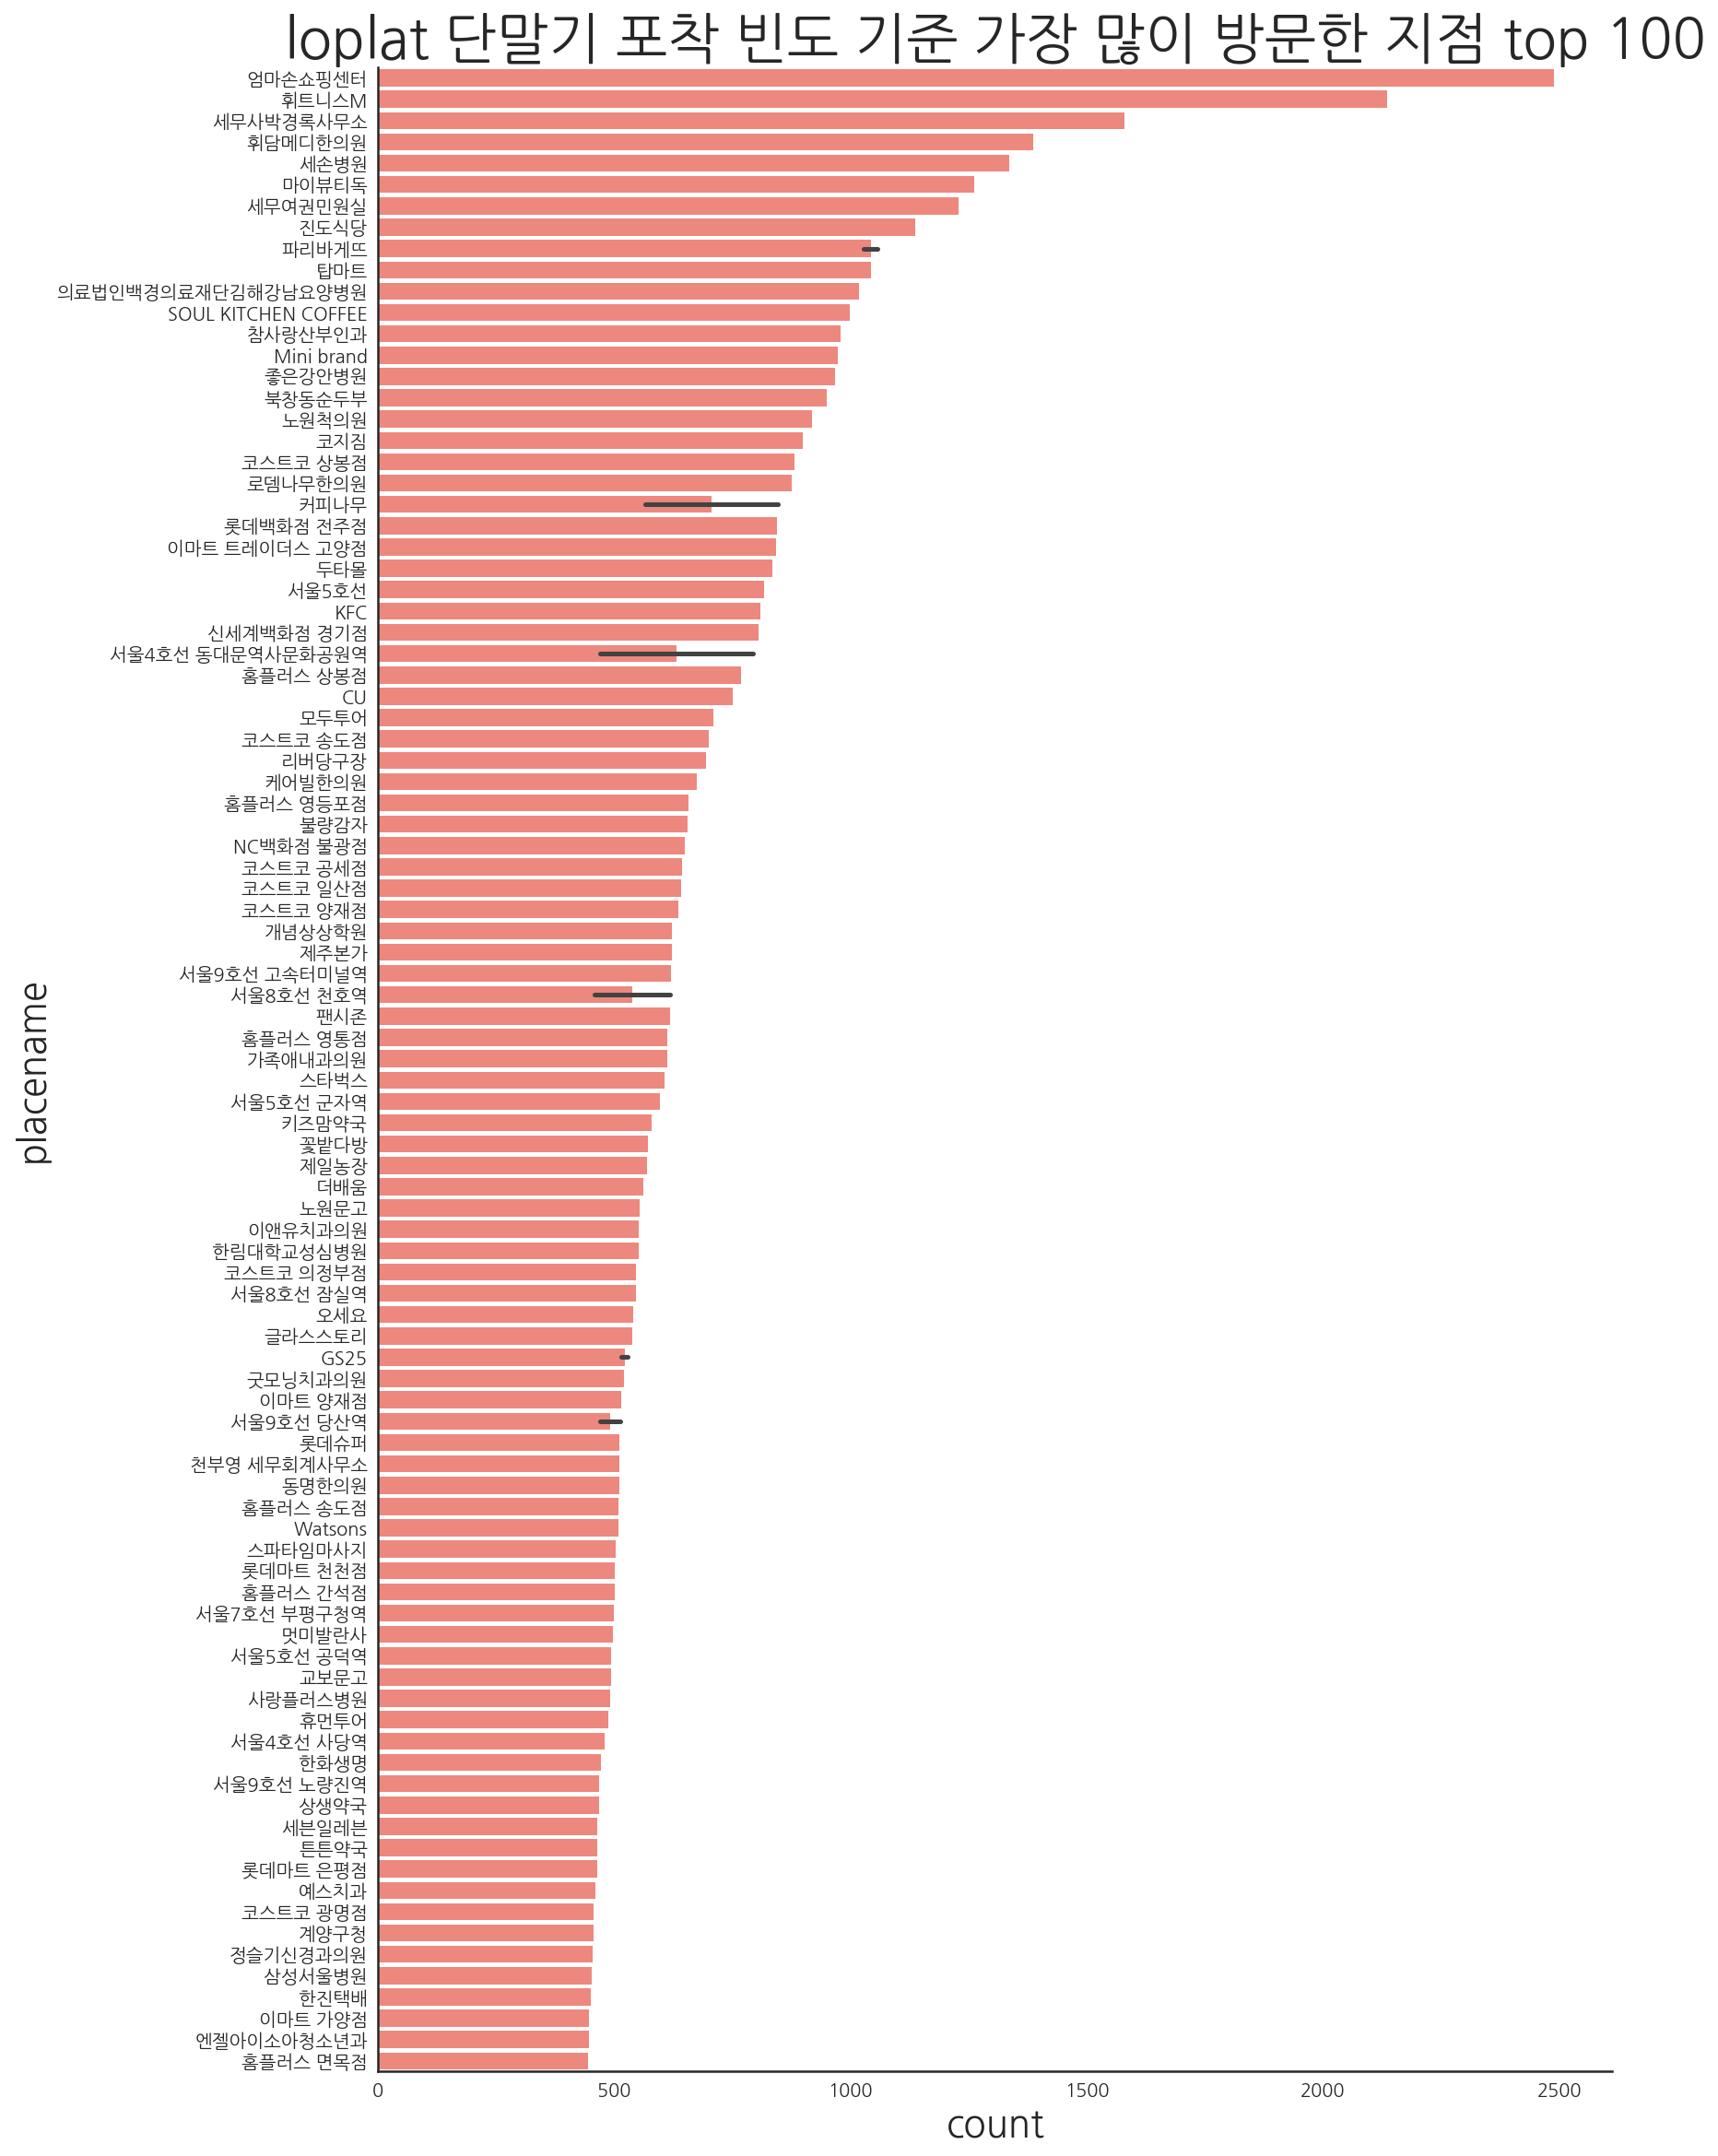

In [116]:
# 프랜차이즈가 많이 포착되었던 placename EDA 결과와는 상이한 모습
# 개별 지점별로 보았을 때에는 병원, 식당, 할인매장 등 다양한 업종의 매장이 상위권에 랭크됨

plt.figure(figsize=(12,20))
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Placename (Top 100)', fontsize=20)
plt.title('loplat 단말기 포착 빈도 기준 가장 많이 방문한 지점 top 100', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

sns.barplot(x='count', y='placename', data=sample_Location_popular_loplat, color='#ff796c')
sns.despine()

plt.show()

In [124]:
# 306896개의 장소 중 사람들이 많이 방문한 곳 top 100 지역별 분석

sample_Location_loplat_address = sample_Location_popular_loplat['address'].map(lambda x: x.split(" ")[0]).map(lambda x: 
                                                                   '서울' if x in ['서울','서울특별시','서울시'] 
                                                                   else '경기' if x in ['경기','경기도']
                                                                   else '인천' if x in ['인천','인천광역시','인천시']
                                                                   else '부산' if x in ['부산','부산광역시','부산시']
                                                                   else '대전' if x in ['대전','대전시','대전광역시']
                                                                   else '경남' if x in ['경남','경상남도']
                                                                   else '경북' if x in ['경북','경상북도']
                                                                   else '대구' if x in ['대구','대구광역시']
                                                                   else '광주' if x in ['광주','광주광역시']
                                                                   else '전북' if x in ['전북','전라북도']
                                                                   else '울산' if x in ['울산','울산광역시']
                                                                   else '전남' if x in ['전남','전라남도']
                                                                   else '강원' if x in ['강원','강원도']
                                                                   else '충북' if x in ['충북','충청북도']
                                                                   else '제주' if x in ['제주','제주특별자치도']
                                                                   else '세종' if x in ['세종','세종특별자치시']
                                                                   else '충남' if x in ['충남','충청남도']
                                                                   else x
                                                                    ).value_counts()

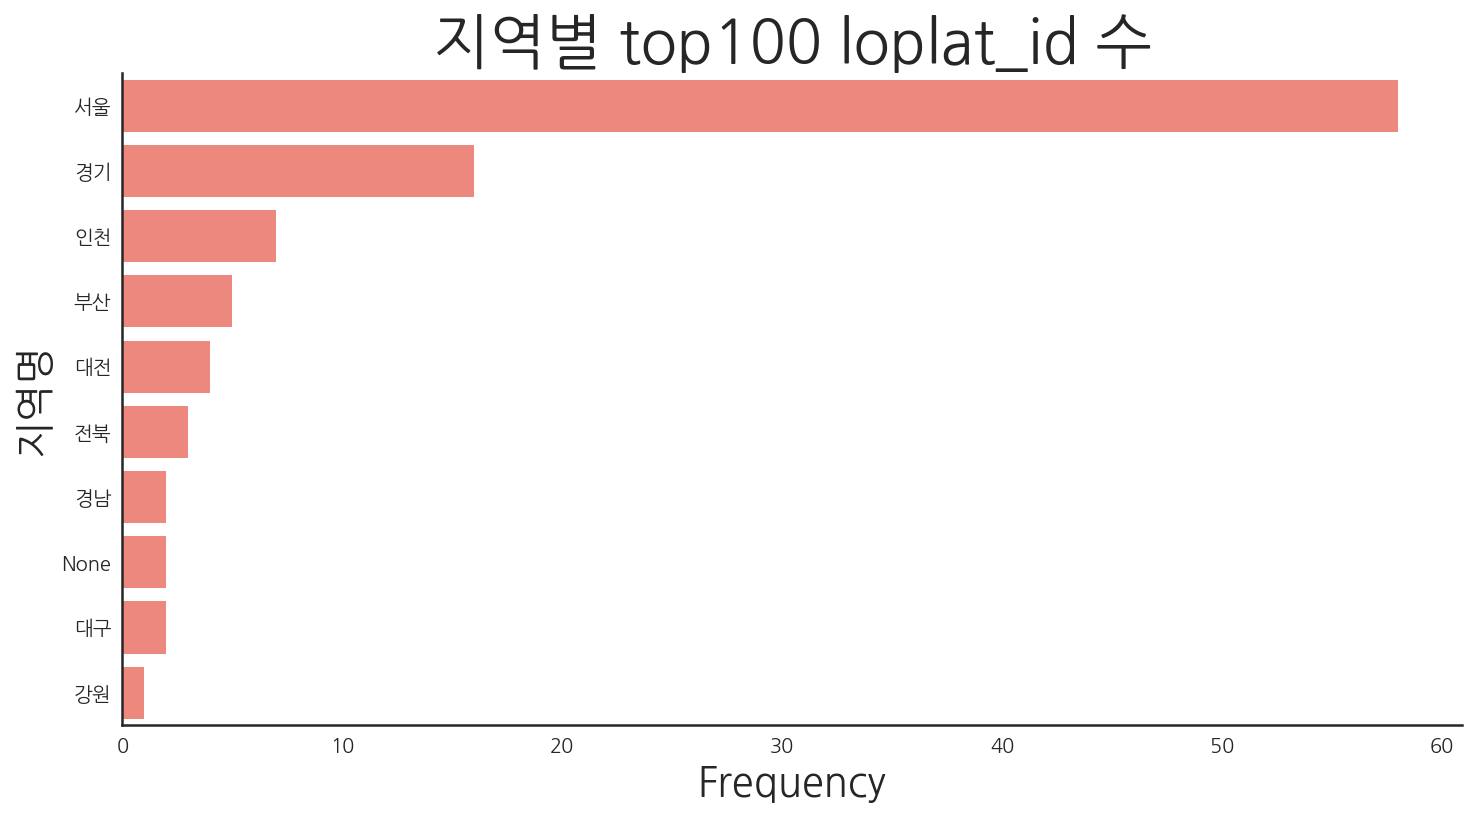

In [125]:
# 역시 서울,경기가 대다수이지만 다른 지역들도 생각보다 많이 보임

plt.figure(figsize=(12,6))
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('지역명', fontsize=20)
plt.title('지역별 top100 loplat_id 수', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

sns.barplot(x=sample_Location_loplat_address.values, y=sample_Location_loplat_address.index,  color='#ff796c')
sns.despine()

plt.show()

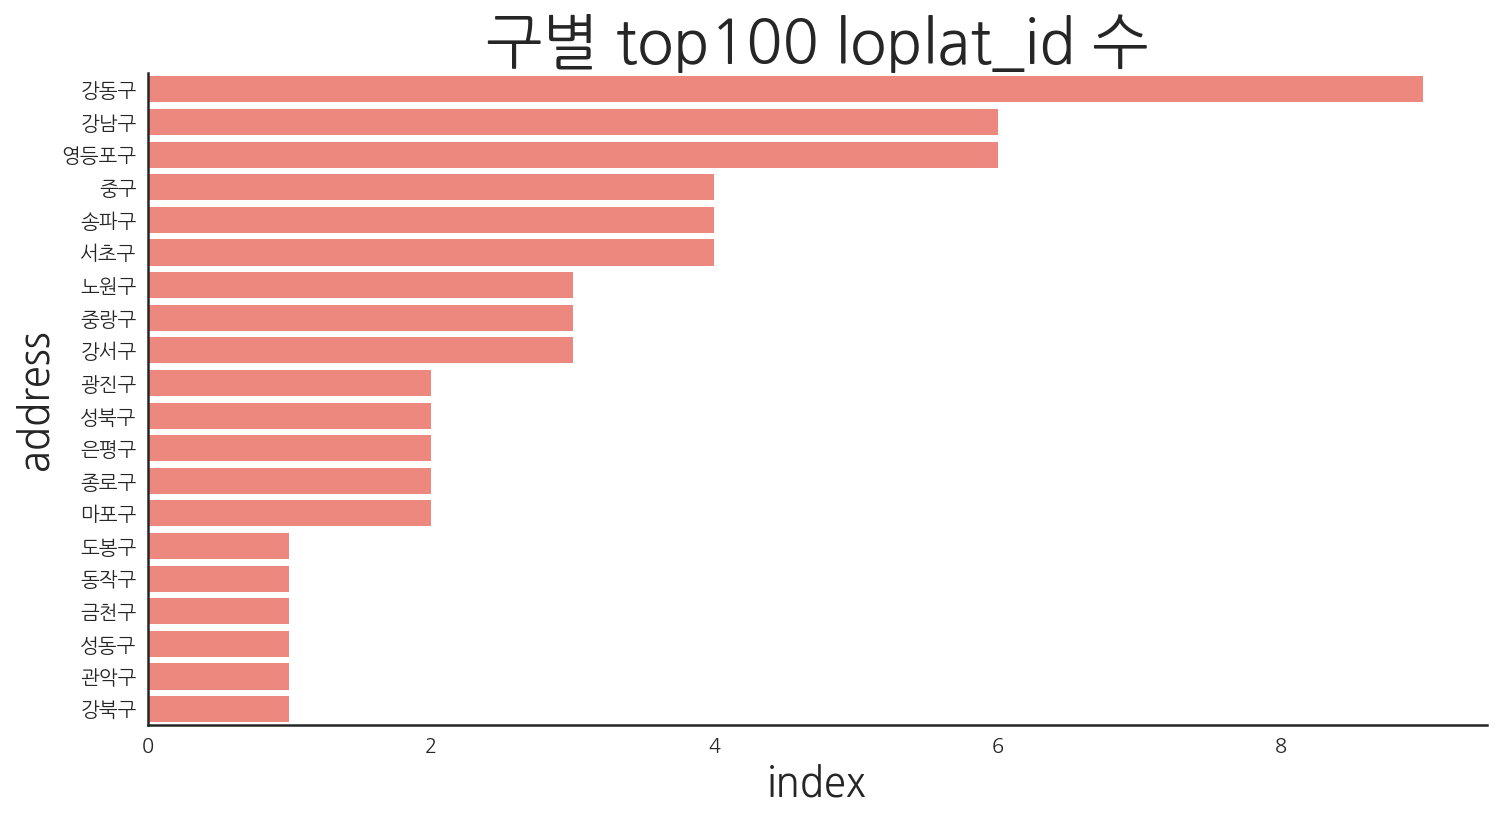

In [147]:
# 서울시만 보면 강동구, 강남구, 영등포구에 핫플레이스가 많은 것으로 확인됨 

sample_Location_popular_loplat['Seoul_or_not'] = sample_Location_popular_loplat['address'].map(lambda x: 1 if '서울' in x else 0)
sample_Location_popular_gu = sample_Location_popular_loplat[lambda x: x.Seoul_or_not == 1]['address'].map(lambda x: x.split(" ")[1]).reset_index().groupby('address').count().sort_values(by='index',ascending=False).reset_index()

plt.figure(figsize=(12,6))
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('구', fontsize=20)
plt.title('구별 top100 loplat_id 수', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

sns.barplot(x='index', y='address', data=sample_Location_popular_gu, color='#ff796c')
sns.despine()

plt.show()

<br>
<br>
<br>
<br>

# sample_AppUsage

---

In [148]:
sample_AppUsage_usage_app_list.head()

,panel_id,package_name,app_name,reg_date
0,H0066345,com.android.vpndialogs,VpnDialogs,2017-12-25 13:44:20.633
1,H0066345,com.samsung.dcmservice,com.samsung.dcmservice,2017-12-25 13:44:20.633
2,H0066345,com.skt.skaf.OA00018282,ONE store service,2017-12-25 13:44:20.633
3,H0066345,com.android.phone,전화,2017-12-25 13:44:20.633
4,H0066345,com.android.shell,셸,2017-12-25 13:44:20.633


In [153]:
# 총 2,977,761개의 데이터

len(sample_AppUsage_usage_app_list)

2977761

In [149]:
# 패널 수는 역시 18463명으로 누락된 패널 없음

sample_AppUsage_usage_app_list['panel_id'].nunique()

18463

In [150]:
# 무시할만한 수준의 결측치

sample_AppUsage_usage_app_list.isnull().sum()

panel_id        0
package_name    0
app_name        6
reg_date        0
dtype: int64

In [154]:
# 결측치 있는 row 제거

sample_AppUsage_usage_app_list = sample_AppUsage_usage_app_list.dropna()

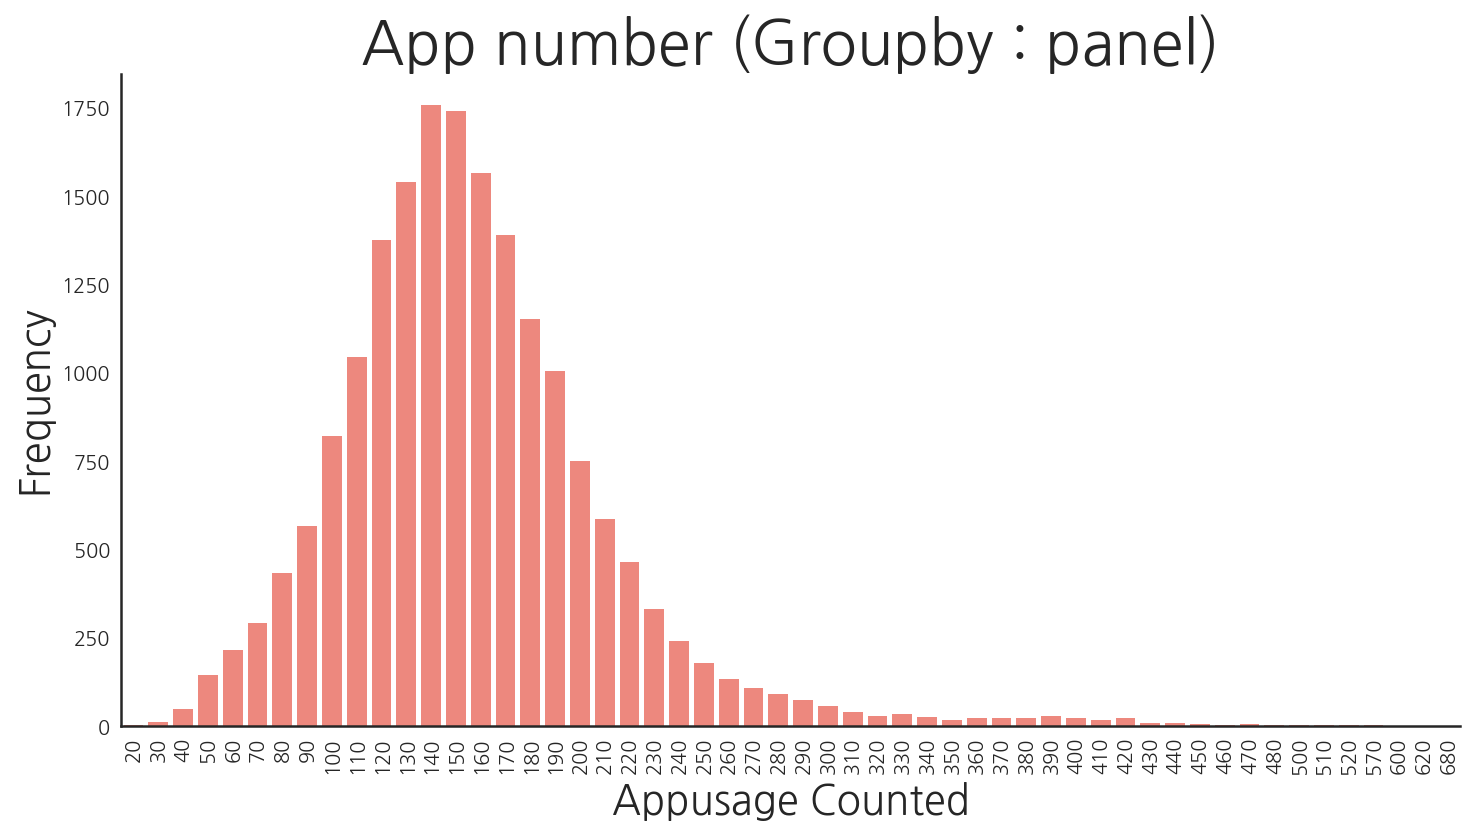

In [155]:
# 패널당 평균적으로 약 150개 정도의 app이 관찰되는 것을 확인

sample_AppUsage_count = sample_AppUsage_usage_app_list['panel_id'].value_counts().map(lambda x: x//10*10).value_counts()

plt.figure(figsize=(12,6))
plt.xlabel('Appusage Counted', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('App number (Groupby : panel)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)

sns.barplot(x=sample_AppUsage_count.index, y=sample_AppUsage_count.values,  color='#ff796c')
sns.despine()

plt.show()

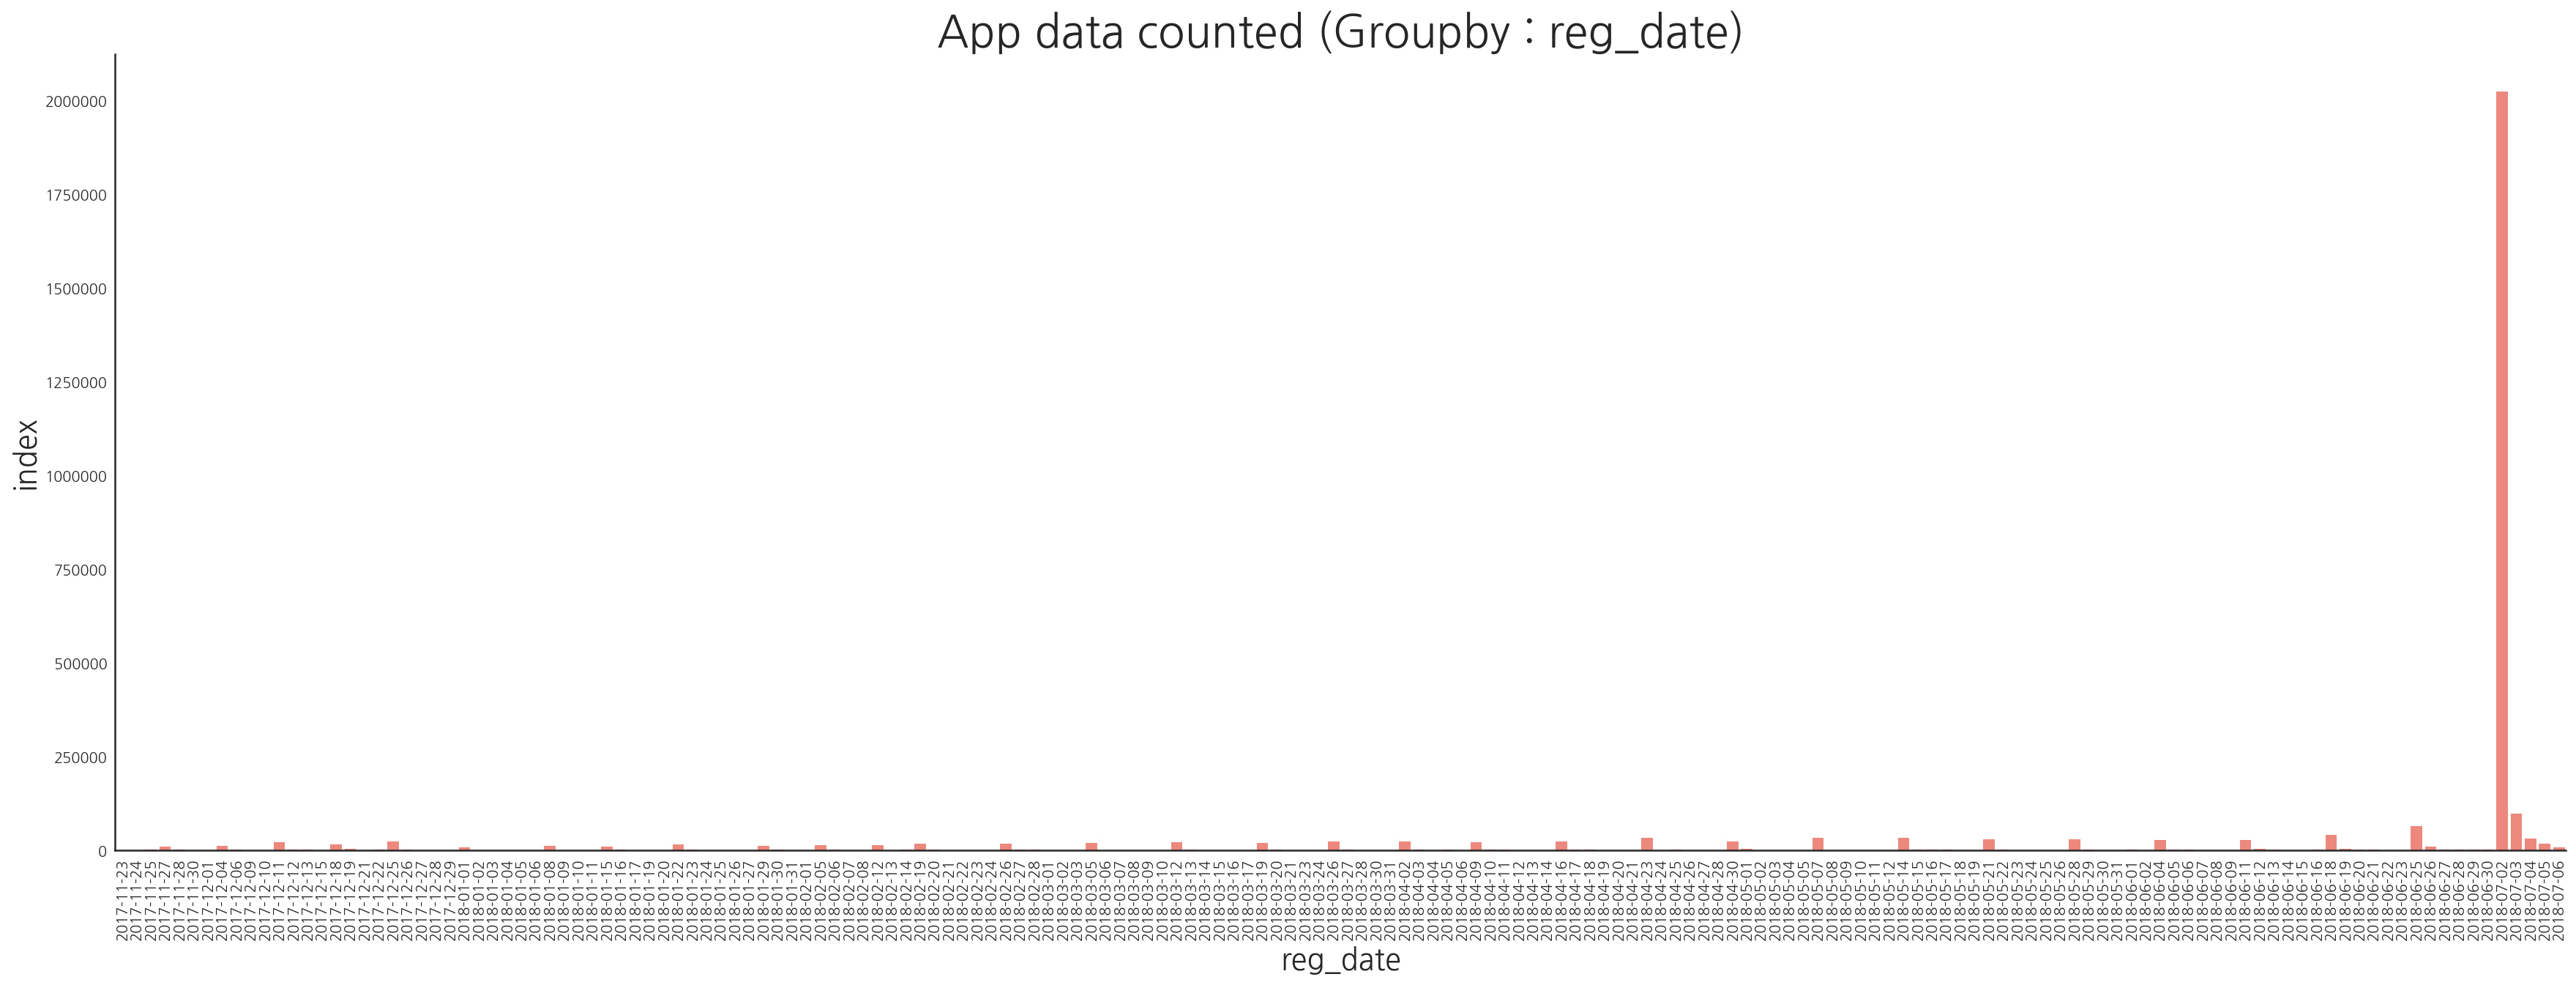

In [156]:
# 많은 양의 데이터가 7월 2일에 수집된 것을 확인, 그러나 다른 날에 데이터가 수집된 패널도 다수 존재

sample_AppUsage_date = sample_AppUsage_usage_app_list['reg_date'].map(lambda x: x[:10]).map(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
sample_AppUsage_date_df = sample_AppUsage_date.reset_index().groupby('reg_date').count()
sample_AppUsage_date_df = sample_AppUsage_date_df.reset_index()
sample_AppUsage_date_df['reg_date'] = sample_AppUsage_date_df['reg_date'].map(lambda x: str(x)[:10])

plt.figure(figsize=(30,10))
plt.xlabel('Appusage Counted', fontsize=20)
plt.ylabel('Date', fontsize=20)
plt.title('App data counted (Groupby : reg_date)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)

sns.barplot(x='reg_date', y='index', data=sample_AppUsage_date_df,  color='#ff796c')
sns.despine()

plt.show()

In [157]:
# 7월 2일에 67%의 데이터가 수집됨

sample_AppUsage_usage_app_list['reg_date'].map(lambda x: x[:10]).value_counts()[0] / len(sample_AppUsage_usage_app_list['reg_date'])

0.6796482585034699

In [158]:
# 패널들의 앱 데이터는 어쨌든 각 개인에 한하여 '같은 시점'에 수집된 것임을 알 수 있음
# 그러나 각 패널 간 수집된 날짜는 각각 다름
# 패널간 등록 일시 (reg_date)에 차이가 있는 이유는 무엇이고, 왜 약 67%의 패널의 데이터가 7월 2일에 수집되었을까?

sample_AppUsage_usage_app_list['reg_date'] = sample_AppUsage_usage_app_list['reg_date'].map(lambda x: x[:10])
sample_AppUsage_usage_app_list.groupby('panel_id')['reg_date'].nunique().value_counts()

1    18463
Name: reg_date, dtype: int64

In [159]:
# 총 50323개의 앱 관찰

sample_AppUsage_usage_app_list['app_name'].nunique()

50323

In [160]:
dict_app_name_modified = {'패널파워': 18498,
 'YouTube': 18477,
 'Chrome': 18456,
 'Gmail': 18446,
 '카카오톡': 17945,
 'Google': 17799,
 'AhnLab V3 Mobile Plus 2.0': 17489,
 'NAVER': 14891,
 'OK Cashbag': 11682,
 'Samsung Pay': 11473,
 'Samsung Location SDK': 11452,
 'Excel': 9899,
 '삼성 프린트 서비스 플러그인': 9805,
 'Syrup 월렛': 9694,
 'PowerPoint': 9650,
 'OneDrive': 9596,
 'Word': 9569,
 'Samsung Health': 9491,
 '11번가': 9386,
 'BAND': 9218,
 '모바일 T world': 9124,
 '삼성 계정': 9114,
 'T전화': 9028,
 'Instagram': 8972,
 'Facebook': 8789,
 'Always On Display': 8442,
 '해피포인트': 8291,
 '네이버 지도': 8229,
 'ISP/페이북': 7852,
 'T멤버십': 7726,
 '카카오스토리': 7180,
 '네이버 카페': 7088,
 '네이버 클라우드': 7082,
 'KB스타뱅킹': 7054,
 'ONE store Setup Wizard': 7053,
 '위메프': 7023,
 '카카오 T': 6942,
 'Samsung Gear': 6882,
 '쿠팡': 6664,
 'G마켓': 6514,
 'L.POINT': 6498,
 '티몬': 6456,
 '카카오뱅크': 6407,
 'CJ ONE': 6216,
 'Melon': 6178,
 'Duo': 6165,
 'NH뱅킹': 5712,
 'oksusu': 5665,
 '코레일톡': 5649,
 'SNOW': 5583,
 '신한 FAN (앱카드)': 5534,
 '배달의민족': 5532,
 'CGV': 5459,
 '후후': 5332,
 '신한 쏠(SOL)': 5251,
 'OneNote': 5229,
 '네이버 웹툰': 5094,
 '원터치개인': 5055,
 '다음': 5023,
 '하나멤버스': 4844,
 'PAYCO': 4840,
 '옥션': 4828,
 '카카오페이지': 4788,
 '토스': 4687,
 '네이버TV': 4569,
 '틸리언': 4530,
 'Google VR 서비스': 4522,
 '컬쳐랜드': 4451,
 'KEB 하나은행': 4387,
 'KT 멤버십': 4364,
 '캐시슬라이드': 4342,
 'U+ 고객센터': 4329,
 '알약M': 4317,
 '캐시워크': 4273,
 '카카오맵': 4089,
 '네이트': 3978,
 'GS SHOP': 3927,
 'Google Play 북': 3921,
 '패널나우': 3875,
 '지니 뮤직': 3869,
 '비디오포털': 3802,
 '리브메이트': 3798,
 '한컴오피스 viewer': 3678,
 '스타벅스': 3654,
 '신한카드': 3632,
 '오베이': 3627,
 '라임': 3609,
 'CJmall': 3601,
 '나만의냉장고': 3474,
 'KB국민카드': 3316,
 '올레 tv 모바일': 3309,
 'i-ONE뱅크': 3301,
 '클라우드베리': 3243,
 '알바몬': 3226,
 '배달요기요': 3201,
 'S노트': 3189,
 '롯데시네마': 3164,
 'Papago': 3104,
 '롯데홈쇼핑': 3073,
 '카카오버스': 3069,
 '네이버 블로그': 3049,
 '홈&쇼핑': 3029,
 '삼성카드': 2995,
 '인터파크': 2962,
 '서베이링크': 2954,
 '지하철종결자': 2912,
 '카카오톡 치즈': 2907,
 '모바일 티머니': 2907,
 '기프티콘': 2897,
 '이디야멤버스': 2873,
 'FaceProvider': 2865,
 '현대Hmall': 2852,
 'KB스타알림': 2778}

In [161]:
Series_app_name_modified = pd.Series(dict_app_name_modified)

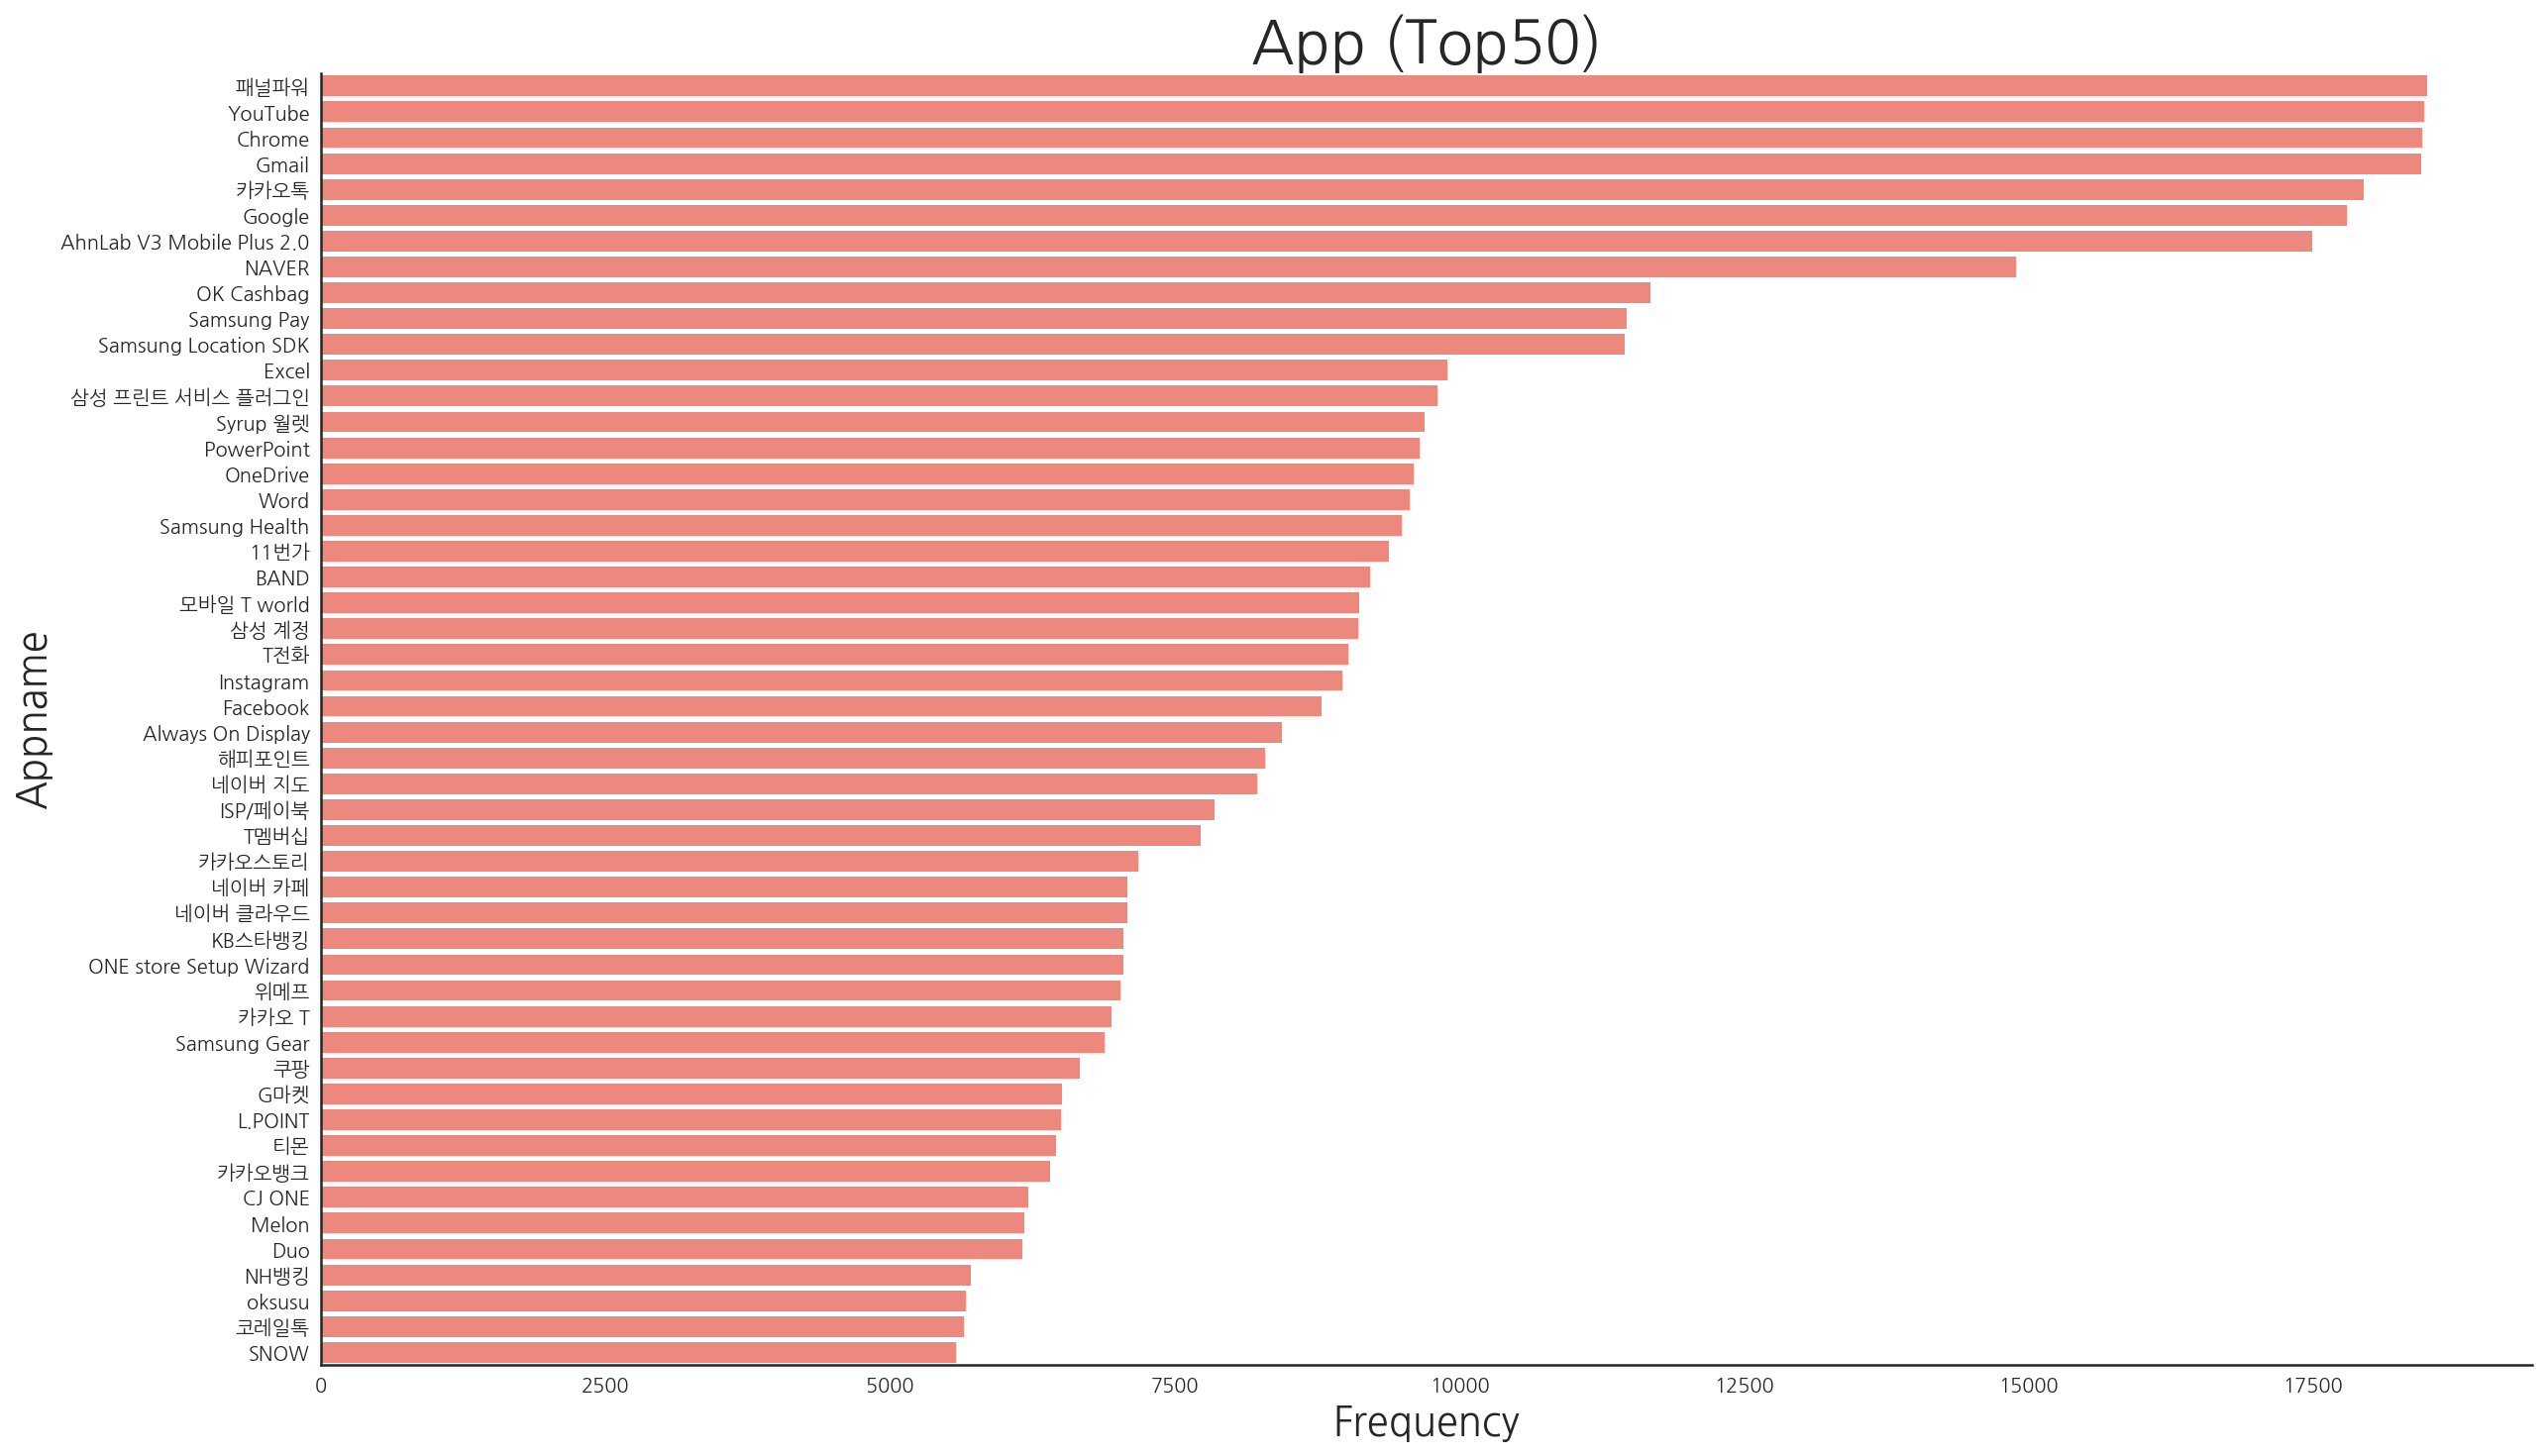

In [162]:
# 많이 사용된 앱 중 기본 내장 어플을 주관적으로 삭제하고 남은 앱 중 상위 50개
# 네이버, 카카오 관련 앱이 많이 보임

app_top_50 = Series_app_name_modified.head(50)

plt.figure(figsize=(20,12))
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Appname', fontsize=20)
plt.title('App (Top50)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

sns.barplot(x=app_top_50.values, y=app_top_50.index,  color='#ff796c')
sns.despine()

plt.show()

<br>
<br>
<br>
<br>

# sample_AppUsage_usage_sum_time

---

In [20]:
sample_AppUsage_usage_sum_time.head()

,panel_id,reg_cnt,package_name,app_name,app_category,total_time_stamp,total_time,reg_date
0,A0000910,10,cn.wps.moffice_eng,WPS Office,생산성,0.0,0,2017-11-25 11:01:48.930000000
1,A0000910,10,com.adobe.reader,Adobe Acrobat,생산성,0.0,0,2017-11-25 11:01:48.930000000
2,A0000910,10,com.ahnlab.v3mobileplus,AhnLab V3 Mobile Plus 2.0,도구,0.0,00:00:00,2017-11-25 11:01:48.920000000
3,A0000910,10,com.android.chrome,Chrome,커뮤니케이션,0.0,0,2017-11-25 11:01:48.930000000
4,A0000910,10,com.bravolang.dictionary.korean,사전,NaN,0.0,0,2017-11-25 11:01:48.930000000


In [21]:
# 56,299,744개의 데이터

len(sample_AppUsage_usage_sum_time)

56299744

In [26]:
# 결측치 확인
# reg_cnt는 수집된 기록차수 (각 개인당 몇번째로 수집된 기록인지)

sample_AppUsage_usage_sum_time.isnull().sum()

panel_id                  0
reg_cnt               29440
package_name              0
app_name                109
app_category        4434441
total_time_stamp    1034394
total_time          1034394
reg_date            1034394
dtype: int64

In [10]:
# 일단 데이터 크기를 줄이고자 사용시간이 0이거나 Null인 앱 사용기록을 모두 지움
# 사용시간이 0이거나 Null인 앱 사용기록은 따로 usage_sum_time_zero로 저장

usage_sum_time_notzero = sample_AppUsage_usage_sum_time[lambda x: x.total_time != '0']
usage_sum_time_notzero = usage_sum_time_notzero[lambda x: x.total_time != '00:00:00' ]
usage_sum_time_notzero = usage_sum_time_notzero[lambda x: x.total_time !=  '0:0:0']
usage_sum_time_notzero = usage_sum_time_notzero[lambda x: x.total_time.notnull()]

sample_AppUsage_usage_sum_time['total_time'] = sample_AppUsage_usage_sum_time['total_time'].fillna('None')
sample_AppUsage_usage_sum_time['usage_zero'] = sample_AppUsage_usage_sum_time['total_time'].map(lambda x: 1 if x in ['0','00:00:00','0:0:0','None'] else 0)
usage_sum_time_zero = sample_AppUsage_usage_sum_time[lambda x: x.usage_zero == 1]

In [76]:
# 약 1378만 row로 데이터 수가 많이 줄어들게 됨!
# 설치하고 사용하지 않는 앱이 매우 많다는 것을 알 수 있다

print("사용시간이 0이 아닌 앱 사용기록은 총 ", len(usage_sum_time_notzero),'row이며,' ,
      "사용시간이 0인 앱 사용기록은 총 ", len(usage_sum_time_zero), "row입니다.")

사용시간이 0이 아닌 앱 사용기록은 총  13872672 row이며, 사용시간이 0인 앱 사용기록은 총  42426980 row입니다.


In [29]:
# 다시 결측치 확인
# app_name 결측치 30개만 지워주면 될 듯 하다.

usage_sum_time_notzero.isnull().sum()

panel_id                 0
reg_cnt                  0
package_name             0
app_name                30
app_category        795196
total_time_stamp         0
total_time               0
reg_date                 0
dtype: int64

In [11]:
# app_name 결측치, panel_id 이상한거 처리하기

usage_sum_time_notzero = usage_sum_time_notzero[lambda x: x.app_name.notnull()]

panel_id_list = list(sample_AppUsage_usage_app_list['panel_id'].unique())
usage_sum_time_notzero = usage_sum_time_notzero[lambda x: x.panel_id.isin(panel_id_list)]

In [31]:
# 깔끔하게 정리된 결측치 확인

usage_sum_time_notzero.isnull().sum()

panel_id                 0
reg_cnt                  0
package_name             0
app_name                 0
app_category        795194
total_time_stamp         0
total_time               0
reg_date                 0
dtype: int64

In [32]:
# 최종 row 수

len(usage_sum_time_notzero)

13872734

In [33]:
# 패널 4명은 실제 앱 사용 데이터가 없음

len(panel_id_list) - len(usage_sum_time_notzero['panel_id'].unique())

4

In [34]:
len(usage_sum_time_notzero['panel_id'].unique())

18459

In [12]:
# 데이터 측정일시를 timestamp 객체로 바꾸고 사용시간 정리
# 사용시간이 음수인 데이터 제거 (총 62개의 row)

usage_sum_time_notzero['reg_date'] = usage_sum_time_notzero['reg_date'].map(
    lambda x: x[:10]).map(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))

usage_sum_time_notzero['total_time_hour'] = usage_sum_time_notzero['total_time'].map(lambda x: int(x.split(":")[0]))
usage_sum_time_notzero['total_time_minute'] = usage_sum_time_notzero['total_time'].map(lambda x: int(x.split(":")[1]))
usage_sum_time_notzero['total_time_second'] = usage_sum_time_notzero['total_time'].map(lambda x: int(x.split(":")[2]))
usage_sum_time_notzero['total_usage_time'] = round(
    usage_sum_time_notzero['total_time_hour']*60 
    + usage_sum_time_notzero['total_time_minute'] 
    + usage_sum_time_notzero['total_time_second']/60 , 1)

usage_sum_time_notzero = usage_sum_time_notzero[lambda x: x.total_usage_time >= 0]

In [45]:
usage_sum_time_notzero.head()

,panel_id,reg_cnt,package_name,app_name,app_category,total_time_stamp,total_time,reg_date,total_time_hour,total_time_minute,total_time_second,total_usage_time
14,A0000910,10,com.facebook.katana,Facebook,소셜,105439.0,00:01:45,2017-11-25,0,1,45,1.8
16,A0000910,10,com.facebook.orca,Messenger,커뮤니케이션,124418.0,00:02:04,2017-11-25,0,2,4,2.1
31,A0000910,10,com.hrc.mobilo,MobileCX,라이프스타일,64098.0,00:01:04,2017-11-25,0,1,4,1.1
36,A0000910,10,com.interpark.notitome,NotiToMe,라이프스타일,307031.0,00:05:07,2017-11-25,0,5,7,5.1
39,A0000910,10,com.kakao.page,카카오페이지,도서/참고자료,3581975.0,00:59:41,2017-11-25,0,59,41,59.7


In [16]:
# 데이터가 어느 정도 정리되었으니, 각 데이터 간 수집 시점과 기간을 비교해보자
# 위치데이터 수집시접 및 기간 + 앱데이터 수집시접 및 기간 + 설문조사 작성시점

notzero_strptime = usage_sum_time_notzero.groupby('panel_id')['reg_date'].agg([min,max]).reset_index()
notzero_strptime.columns = ['panel_id', 'min_app', 'max_app']

sample_Location_strptime.columns = ['pid', 'min_loc', 'max_loc', 'diff_loc', 'min_month_loc', 'max_month_loc']
sample_Location_strptime = sample_Location_strptime.reset_index()

PS_home['ins_date'] = PS_home['ins_date'].map(lambda x: x.split(' ')[0]).map(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
PS_date = PS_home[['id', 'ins_date']]

regdate_minmax = notzero_strptime.merge(sample_Location_strptime, how='inner', left_on='panel_id', right_on='pid')
regdate_minmax = regdate_minmax.merge(PS_date, how='inner', left_on='panel_id', right_on='id')
regdate_minmax = regdate_minmax[['panel_id','ins_date','min_app','min_loc','max_app','max_loc','diff_loc']]

regdate_minmax['diff_app'] = (regdate_minmax['max_app'] - regdate_minmax['min_app']).map(lambda x: str(x).split(' ')[0])
regdate_minmax['app_start_gap'] = (regdate_minmax['min_app'] - regdate_minmax['ins_date']).map(lambda x: str(x).split(' ')[0])
regdate_minmax['loc_start_gap'] = (regdate_minmax['min_loc'] - regdate_minmax['ins_date']).map(lambda x: str(x).split(' ')[0])
regdate_minmax['min_gap'] = (regdate_minmax['min_loc'] - regdate_minmax['min_app']).map(lambda x: str(x).split(' ')[0])
regdate_minmax['max_gap'] = (regdate_minmax['max_loc'] - regdate_minmax['max_app']).map(lambda x: str(x).split(' ')[0])

ValueError: Length mismatch: Expected axis has 7 elements, new values have 6 elements

In [53]:
regdate_minmax.head()

,panel_id,ins_date,min_app,min_loc,max_app,max_loc,diff_loc,diff_app,app_start_gap,loc_start_gap,min_gap,max_gap
0,A0000910,2017-05-03,2017-11-25,2017-09-10,2018-06-25,2018-06-27,290,212,206,130,-76,2
1,A0001355,2017-05-18,2018-04-16,2018-06-22,2018-05-14,2018-06-22,0,28,333,400,67,39
2,A0002394,2017-09-12,2018-03-26,2018-03-28,2018-07-02,2018-06-30,94,98,195,197,2,-2
3,A0002542,2017-04-26,2018-04-12,2018-04-12,2018-07-02,2018-06-29,78,81,351,351,0,-3
4,A0003204,2018-02-19,2018-02-17,2018-03-12,2018-07-02,2018-07-01,111,135,-2,21,23,-1


In [81]:
regdate_minmax_apponly = regdate_minmax[['min_app','max_app']].applymap(lambda x: str(x)[0:7])

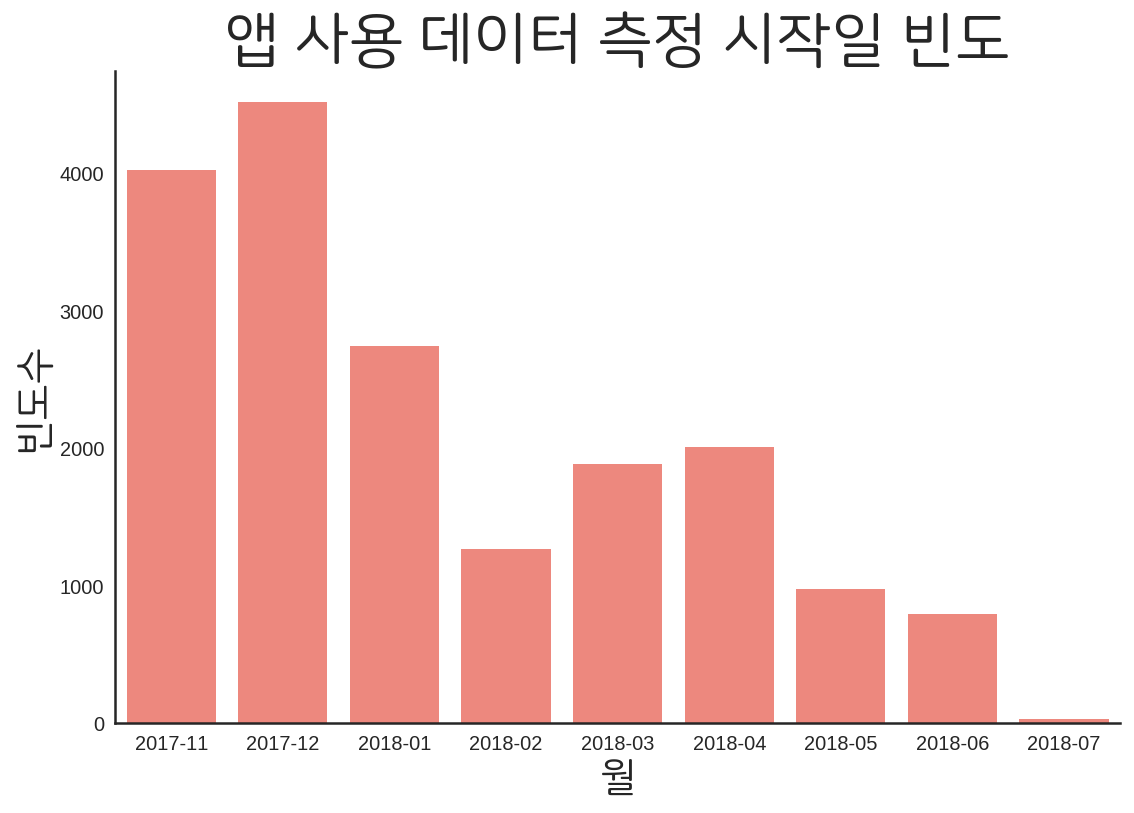

In [99]:

rmao_min = regdate_minmax_apponly.groupby('min_app')['max_app'].count().reset_index()

plt.figure(figsize=(9,6))

sns.barplot(x='min_app', y='max_app', data=rmao_min, color='#ff796c')
sns.despine()

plt.xlabel('월', fontproperties=fontprop, fontsize=20)
plt.ylabel('빈도수', fontproperties=fontprop, fontsize=20)
plt.title('앱 사용 데이터 측정 시작일 빈도', fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.show()

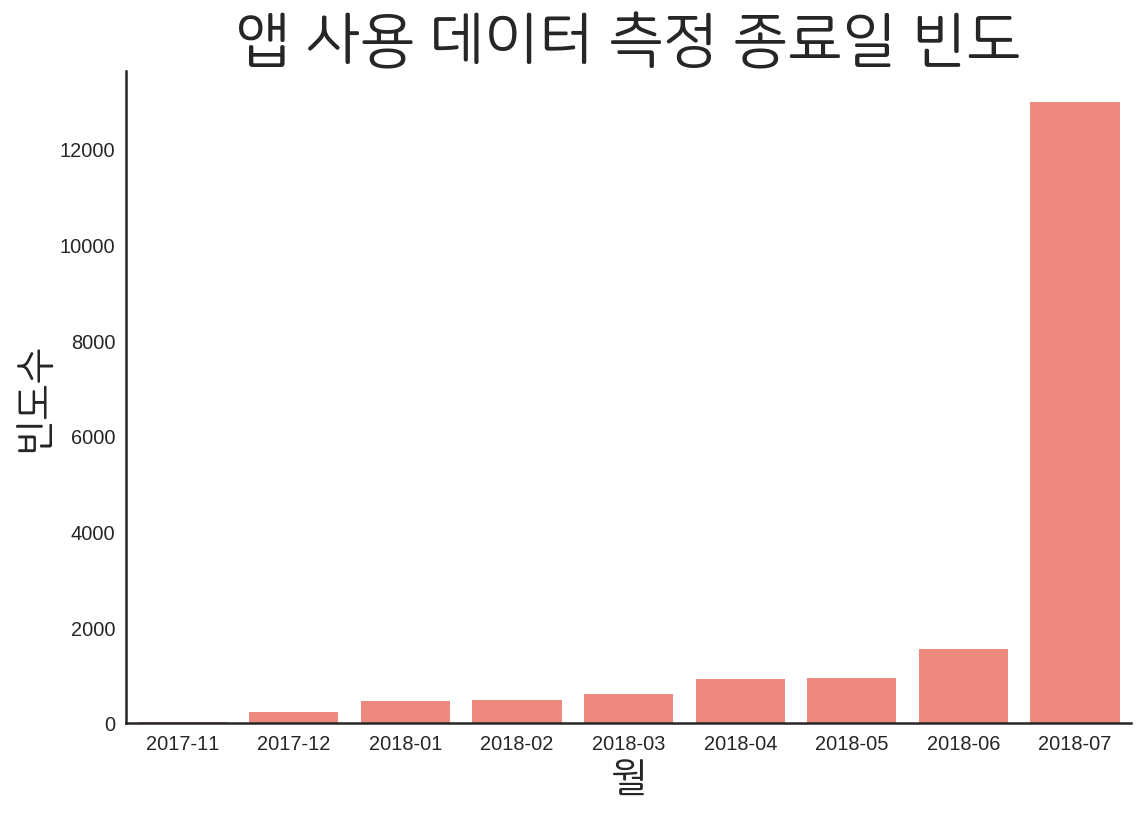

In [100]:
rmao_max = regdate_minmax_apponly.groupby('max_app')['min_app'].count().reset_index()

plt.figure(figsize=(9,6))

sns.barplot(x='max_app', y='min_app', data=rmao_max, color='#ff796c')
sns.despine()

plt.xlabel('월', fontproperties=fontprop, fontsize=20)
plt.ylabel('빈도수', fontproperties=fontprop, fontsize=20)
plt.title('앱 사용 데이터 측정 종료일 빈도', fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

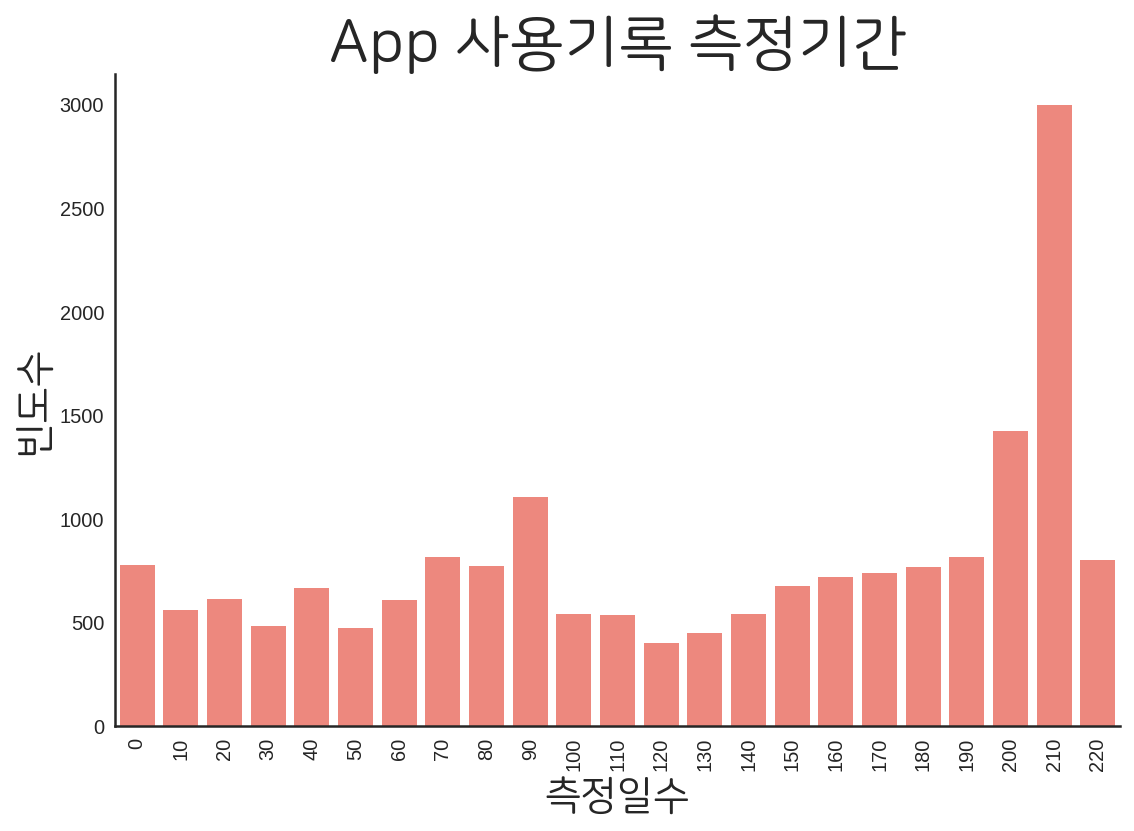

In [102]:
tmp2 = regdate_minmax['diff_app'].reset_index().groupby('diff_app').count().reset_index()
tmp2['diff_app'] = tmp2['diff_app'].map(lambda x: int(x))//10*10
tmp2 = tmp2.sort_values(by='diff_app')
tmp2 = tmp2.groupby('diff_app')['index'].sum()

plt.figure(figsize=(9,6))

sns.barplot(x=tmp2.index, y=tmp2.values,  color='#ff796c')
sns.despine()
plt.xlabel('측정일수', fontproperties=fontprop, fontsize=20)
plt.ylabel('빈도수', fontproperties=fontprop, fontsize=20)
plt.title("App 사용기록 측정기간", fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)

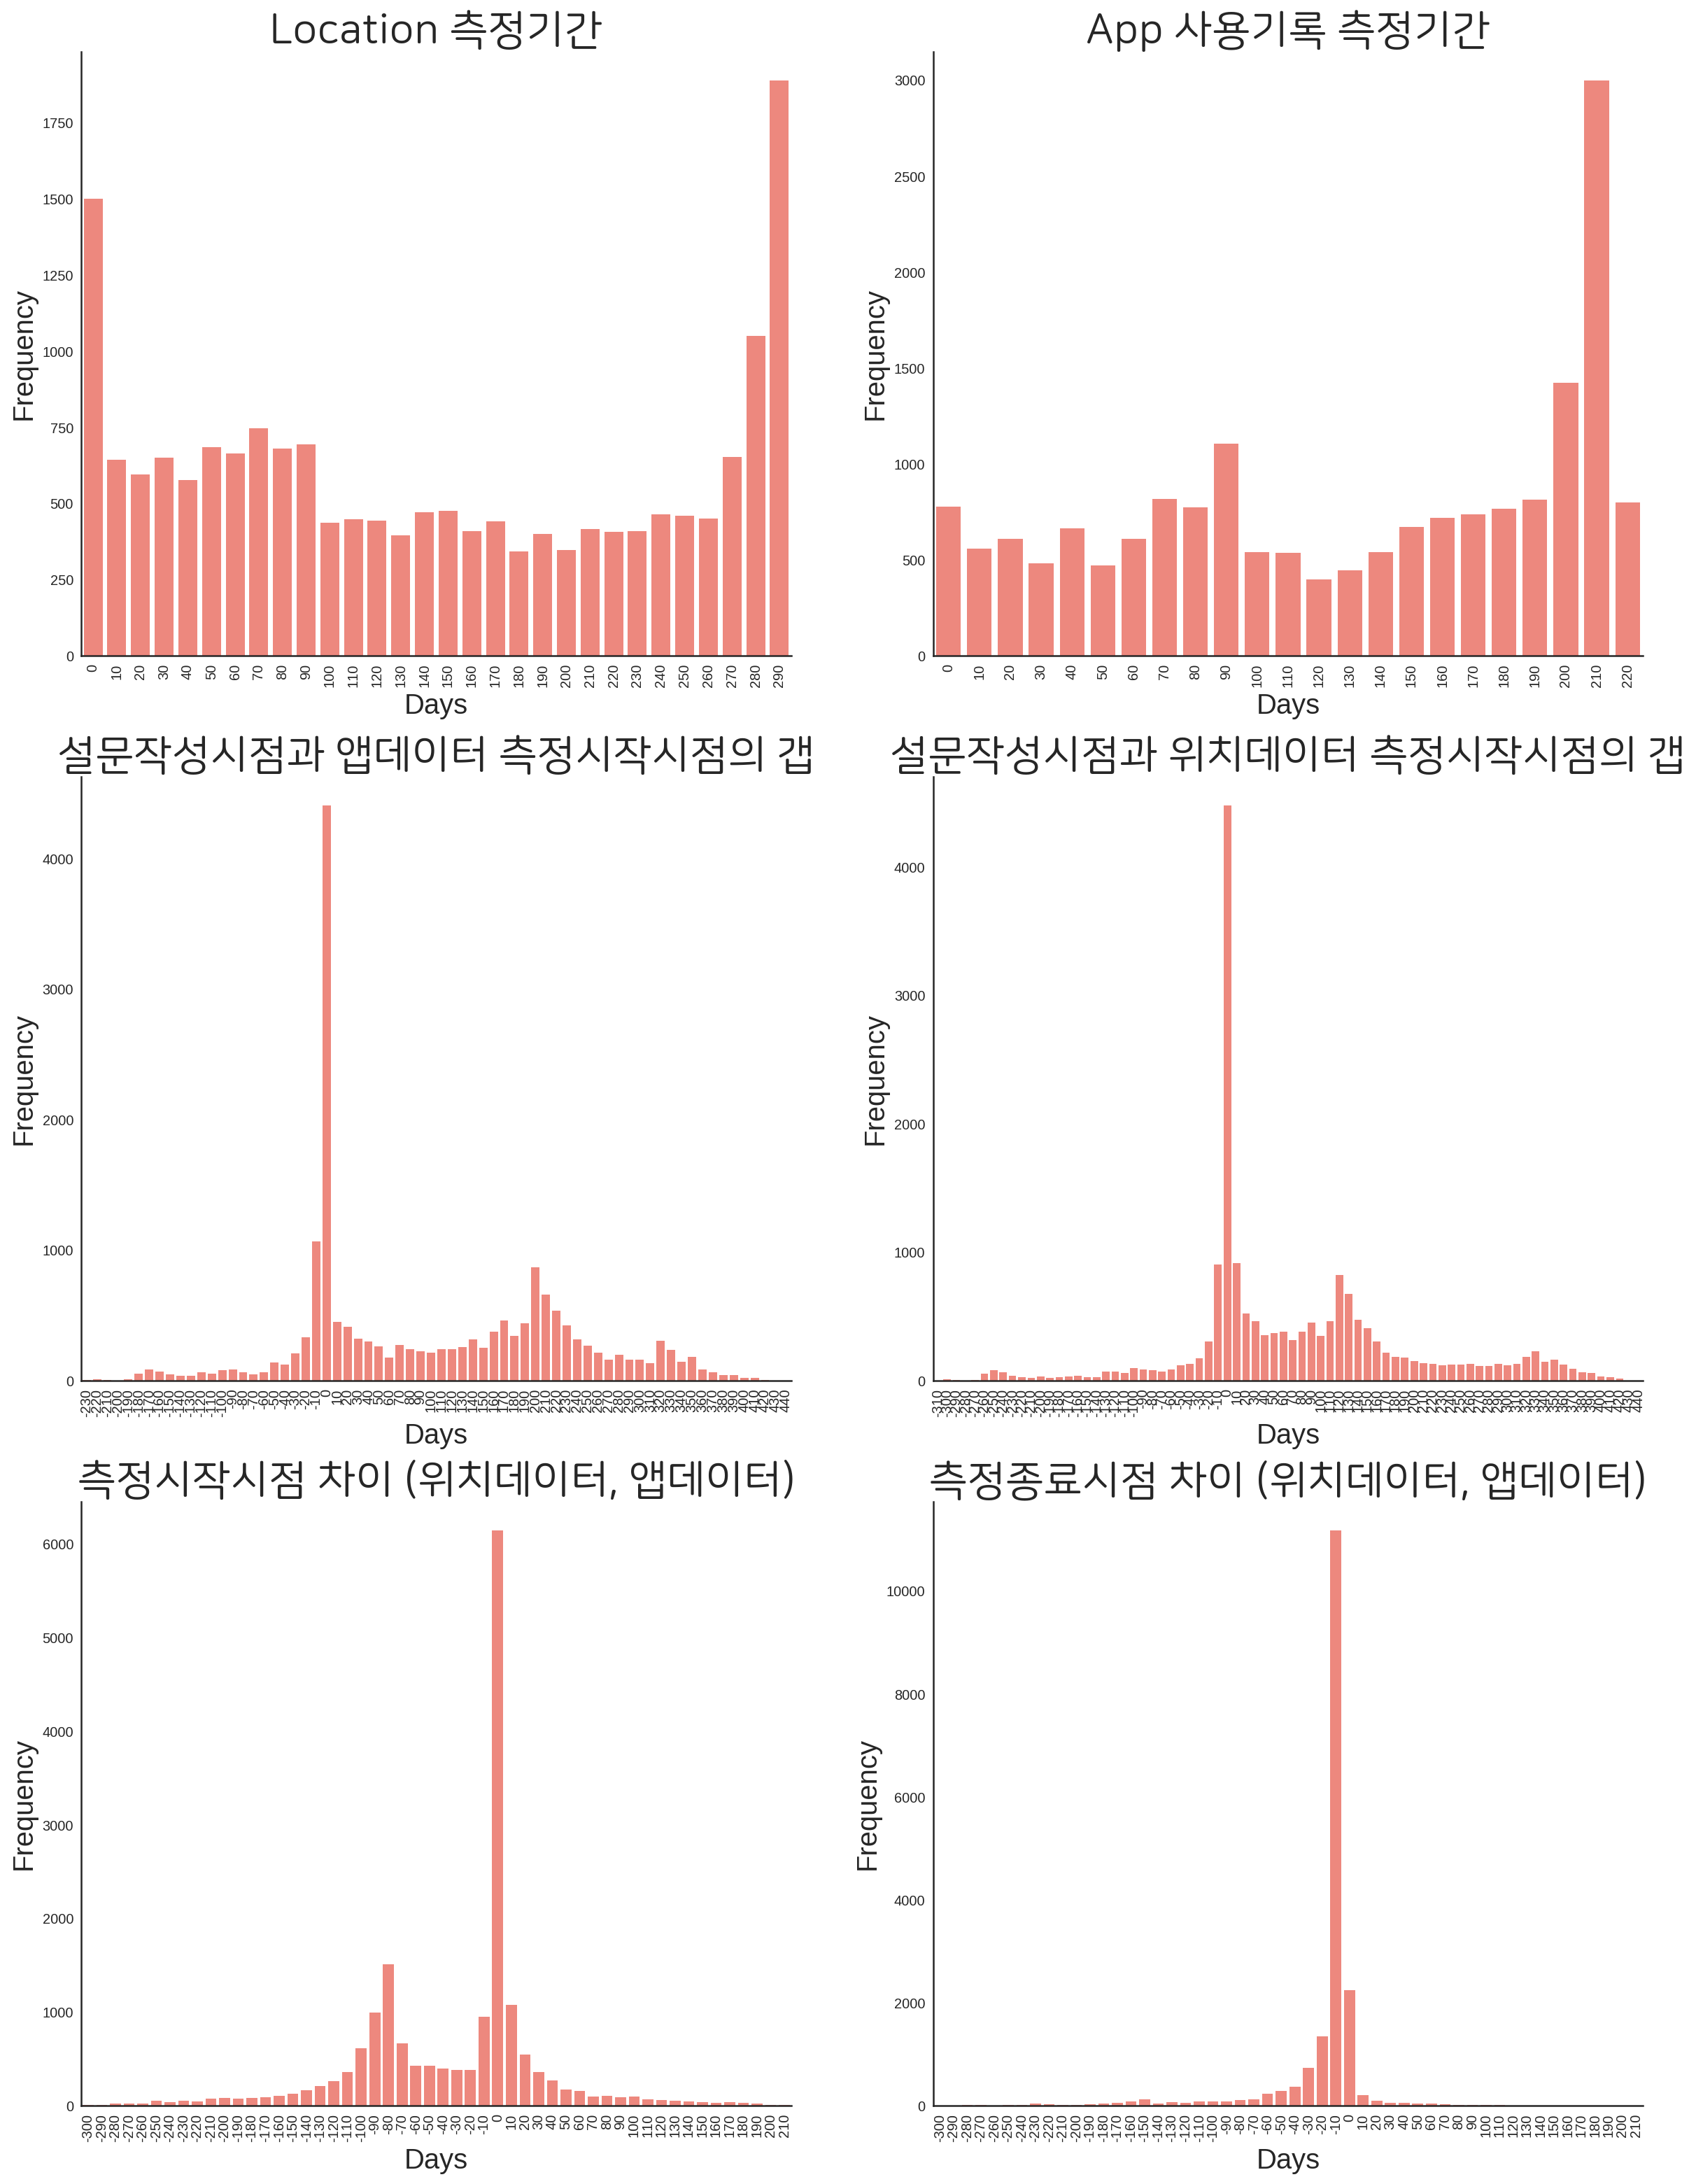

In [54]:
# 앱 사용기록 측정기간도 제각각임

# 설문조사 작성 후 바로 앱데이터 및 위치데이터가 수집된 경우가 많음
# 그러나 작성 시점 이후로 수집되는 시기가 제각각인 경우가 더 많음

# 앱데이터와 위치데이터 수집시점은 동일한 경우가 가장 많긴함
# 앱데이터가 먼저 수집된 경우가 꽤 많음
# 수집종료시점은 거의 비슷


plt.figure(figsize=(20,27))


plt.subplot(321)
tmp1 = regdate_minmax['diff_loc'].reset_index().groupby('diff_loc').count().reset_index()
tmp1['diff_loc'] = tmp1['diff_loc'].map(lambda x: int(x))//10*10
tmp1 = tmp1.sort_values(by='diff_loc')
tmp1 = tmp1.groupby('diff_loc')['index'].sum()

sns.barplot(x=tmp1.index, y=tmp1.values, color='#ff796c')
sns.despine()
plt.xlabel('Days', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title("Location 측정기간", fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)


plt.subplot(322)
tmp2 = regdate_minmax['diff_app'].reset_index().groupby('diff_app').count().reset_index()
tmp2['diff_app'] = tmp2['diff_app'].map(lambda x: int(x))//10*10
tmp2 = tmp2.sort_values(by='diff_app')
tmp2 = tmp2.groupby('diff_app')['index'].sum()

sns.barplot(x=tmp2.index, y=tmp2.values,  color='#ff796c')
sns.despine()
plt.xlabel('Days', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title("App 사용기록 측정기간", fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)


plt.subplot(323)
tmp3 = regdate_minmax['app_start_gap'].reset_index().groupby('app_start_gap').count().reset_index()
tmp3['app_start_gap'] = tmp3['app_start_gap'].map(lambda x: int(x))//10*10
tmp3 = tmp3.sort_values(by='app_start_gap')
tmp3 = tmp3.groupby('app_start_gap')['index'].sum()

sns.barplot(x=tmp3.index, y=tmp3.values,  color='#ff796c')
sns.despine()
plt.xlabel('Days', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title("설문작성시점과 앱데이터 측정시작시점의 갭", fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)


plt.subplot(324)
tmp4 = regdate_minmax['loc_start_gap'].reset_index().groupby('loc_start_gap').count().reset_index()
tmp4['loc_start_gap'] = tmp4['loc_start_gap'].map(lambda x: int(x))//10*10
tmp4 = tmp4.sort_values(by='loc_start_gap')
tmp4 = tmp4.groupby('loc_start_gap')['index'].sum()

sns.barplot(x=tmp4.index, y=tmp4.values,  color='#ff796c')
sns.despine()
plt.xlabel('Days', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title("설문작성시점과 위치데이터 측정시작시점의 갭", fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)


plt.subplot(325)
tmp5 = regdate_minmax['min_gap'].reset_index().groupby('min_gap').count().reset_index()
tmp5['min_gap'] = tmp5['min_gap'].map(lambda x: int(x))//10*10
tmp5 = tmp5.sort_values(by='min_gap')
tmp5 = tmp5.groupby('min_gap')['index'].sum()

sns.barplot(x=tmp5.index, y=tmp5.values,  color='#ff796c')
sns.despine()
plt.xlabel('Days', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title("측정시작시점 차이 (위치데이터, 앱데이터)", fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)


plt.subplot(326)
tmp6 = regdate_minmax['max_gap'].reset_index().groupby('max_gap').count().reset_index()
tmp6['max_gap'] = tmp6['max_gap'].map(lambda x: int(x))//10*10
tmp6 = tmp6.sort_values(by='max_gap')
tmp6 = tmp6.groupby('max_gap')['index'].sum()

sns.barplot(x=tmp6.index, y=tmp6.values,  color='#ff796c')
sns.despine()
plt.xlabel('Days', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title("측정종료시점 차이 (위치데이터, 앱데이터)", fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)


plt.show()

In [15]:
# 측정된 기간에 정확히 비례하는 측정 횟수!
# 위치데이터보다 훨씬 나음

nonzero_reg_cnt = usage_sum_time_notzero.groupby('panel_id')['reg_cnt'].nunique().reset_index()
regdate_minmax = regdate_minmax.merge(nonzero_reg_cnt, how='inner', on='panel_id')
regdate_minmax['diff_app'] = regdate_minmax['diff_app'].map(lambda x: int(x))

plt.figure(figsize=(10,7))

sns.regplot(x="diff_app", y="reg_cnt", data=regdate_minmax, color='#ff796c' )

plt.xlabel('기간 (단위 : 일)', fontproperties=fontprop, fontsize=20)
plt.ylabel('앱 데이터가 측정된 주차 수', fontproperties=fontprop, fontsize=20)
plt.title('측정 기간 대비 집계된 앱 사용데이터 수', fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=10) 

plt.show()

KeyError: 'reg_cnt'

In [56]:
usage_sum_time_notzero.head()

,panel_id,reg_cnt,package_name,app_name,app_category,total_time_stamp,total_time,reg_date,total_time_hour,total_time_minute,total_time_second,total_usage_time
14,A0000910,10,com.facebook.katana,Facebook,소셜,105439.0,00:01:45,2017-11-25,0,1,45,1.8
16,A0000910,10,com.facebook.orca,Messenger,커뮤니케이션,124418.0,00:02:04,2017-11-25,0,2,4,2.1
31,A0000910,10,com.hrc.mobilo,MobileCX,라이프스타일,64098.0,00:01:04,2017-11-25,0,1,4,1.1
36,A0000910,10,com.interpark.notitome,NotiToMe,라이프스타일,307031.0,00:05:07,2017-11-25,0,5,7,5.1
39,A0000910,10,com.kakao.page,카카오페이지,도서/참고자료,3581975.0,00:59:41,2017-11-25,0,59,41,59.7


In [57]:
# reg_cnt는 데이터 수집 시점을 숫자로 표현한 것
# 10번부터 42번까지 있음 

usage_sum_time_notzero['reg_cnt'].unique()

array(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '32',
       '33', '34', '35', '36', '38', '39', '40', '41', '31', '37', '42'], dtype=object)

In [58]:
reg_cnt_reg_date = usage_sum_time_notzero.groupby('reg_cnt')['reg_date'].unique().reset_index()
reg_cnt_reg_date['reg_date'] = reg_cnt_reg_date['reg_date'].map(lambda x: max(x))

In [59]:
# 항상 그런 것은 아니지만, 해당 주차를 reg_cnt에 해당하는 수로 mapping한 것으로 이해됨
# 예를 들어 17년 11월 20~26일인 주차는 10번 reg_cnt
# 총 33주차의 기록이라고 볼 수 있고, 사람마다 기록된 주차는 다름

reg_cnt_reg_date.head(10)

,reg_cnt,reg_date
0,10,2017-11-26
1,11,2017-12-03
2,12,2017-12-10
3,13,2017-12-17
4,14,2017-12-23
5,15,2017-12-31
6,16,2018-01-06
7,17,2018-01-14
8,18,2018-01-20
9,19,2018-01-28


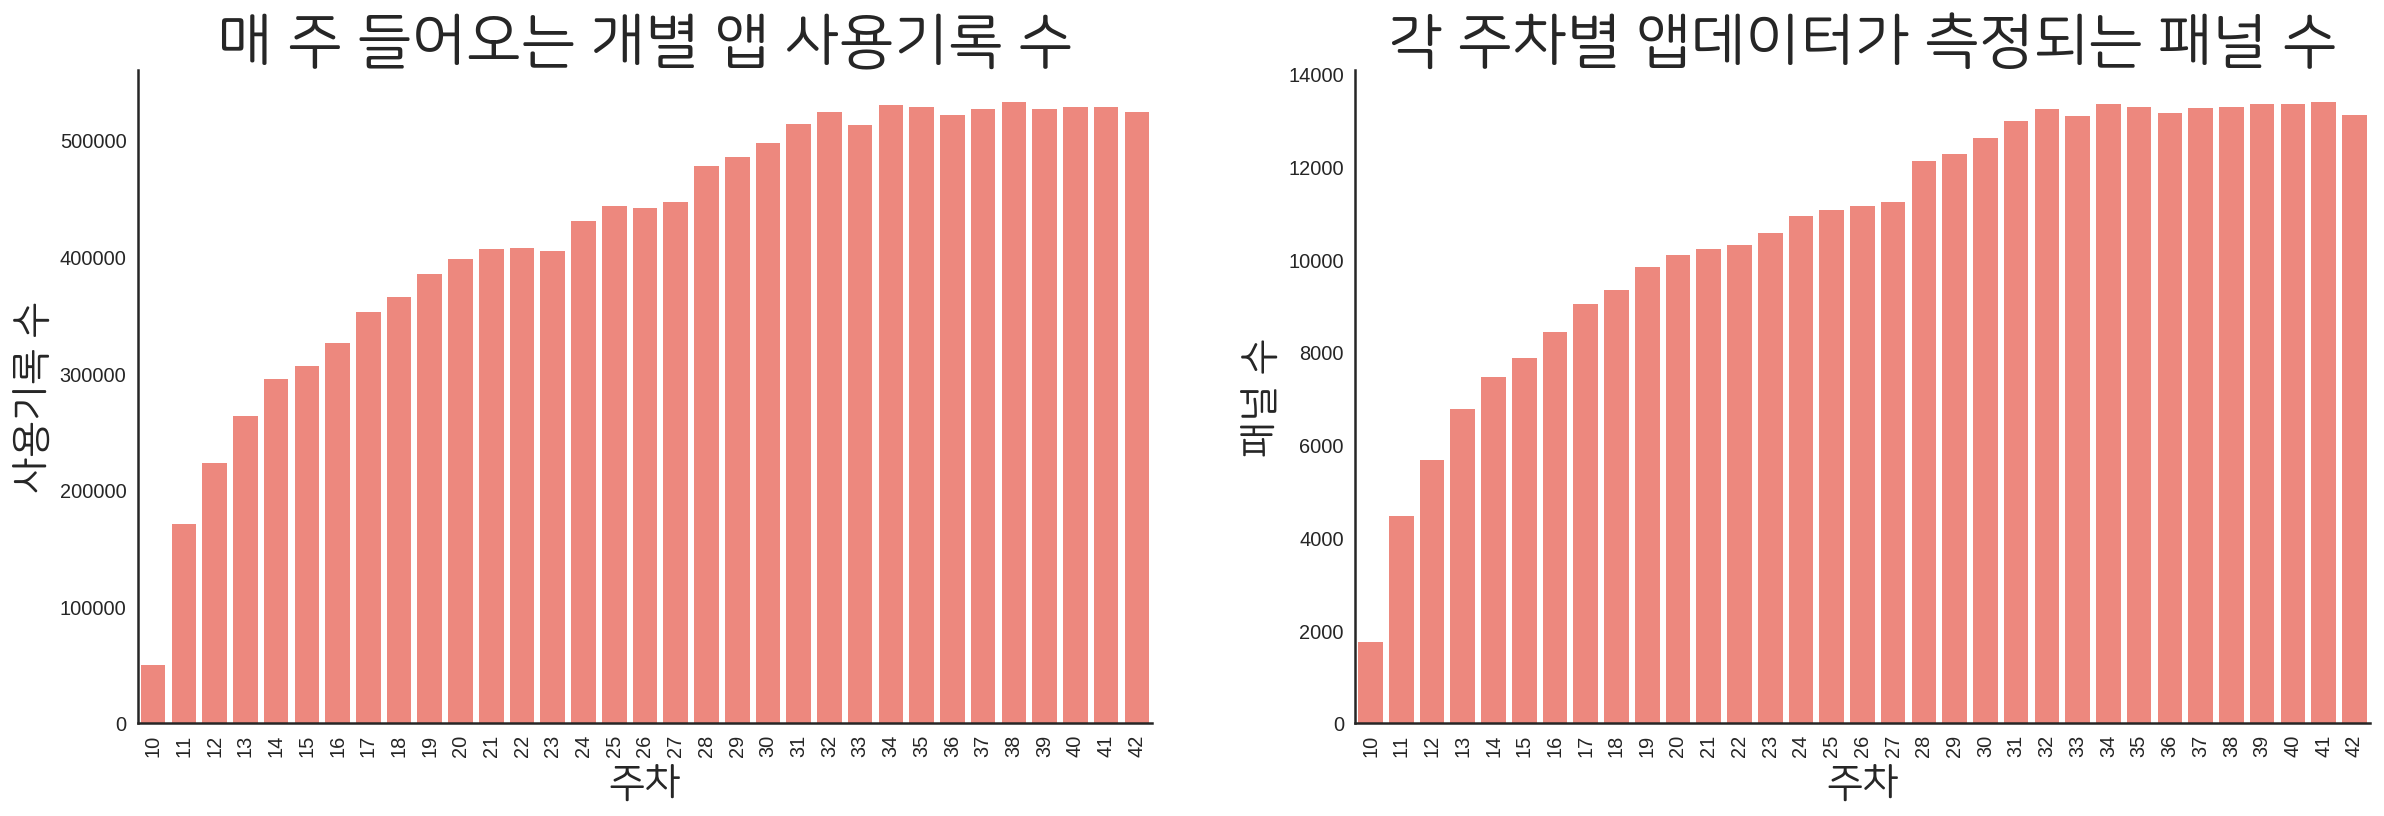

In [104]:
# 주차별로 데이터 수가 누적되는 것을 확인
# 전체 패널의 반 이상이 16주차 이상부터 데이터 제공

reg_cnt_count = usage_sum_time_notzero.groupby('reg_cnt')['panel_id'].count()
reg_cnt_pidcount = usage_sum_time_notzero.groupby('reg_cnt')['panel_id'].nunique()

plt.figure(figsize=(20,6))

plt.subplot(121)
sns.barplot(x=reg_cnt_count.index, y=reg_cnt_count.values, color='#ff796c')
plt.xlabel('주차', fontproperties=fontprop, fontsize=20)
plt.ylabel('사용기록 수', fontproperties=fontprop, fontsize=20)
plt.title('매 주 들어오는 개별 앱 사용기록 수', fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)
sns.despine()

plt.subplot(122)
sns.barplot(x=reg_cnt_pidcount.index, y=reg_cnt_pidcount.values, color='#ff796c')
plt.xlabel('주차', fontproperties=fontprop, fontsize=20)
plt.ylabel('패널 수', fontproperties=fontprop, fontsize=20)
plt.title('각 주차별 앱데이터가 측정되는 패널 수', fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)
sns.despine()

plt.show()

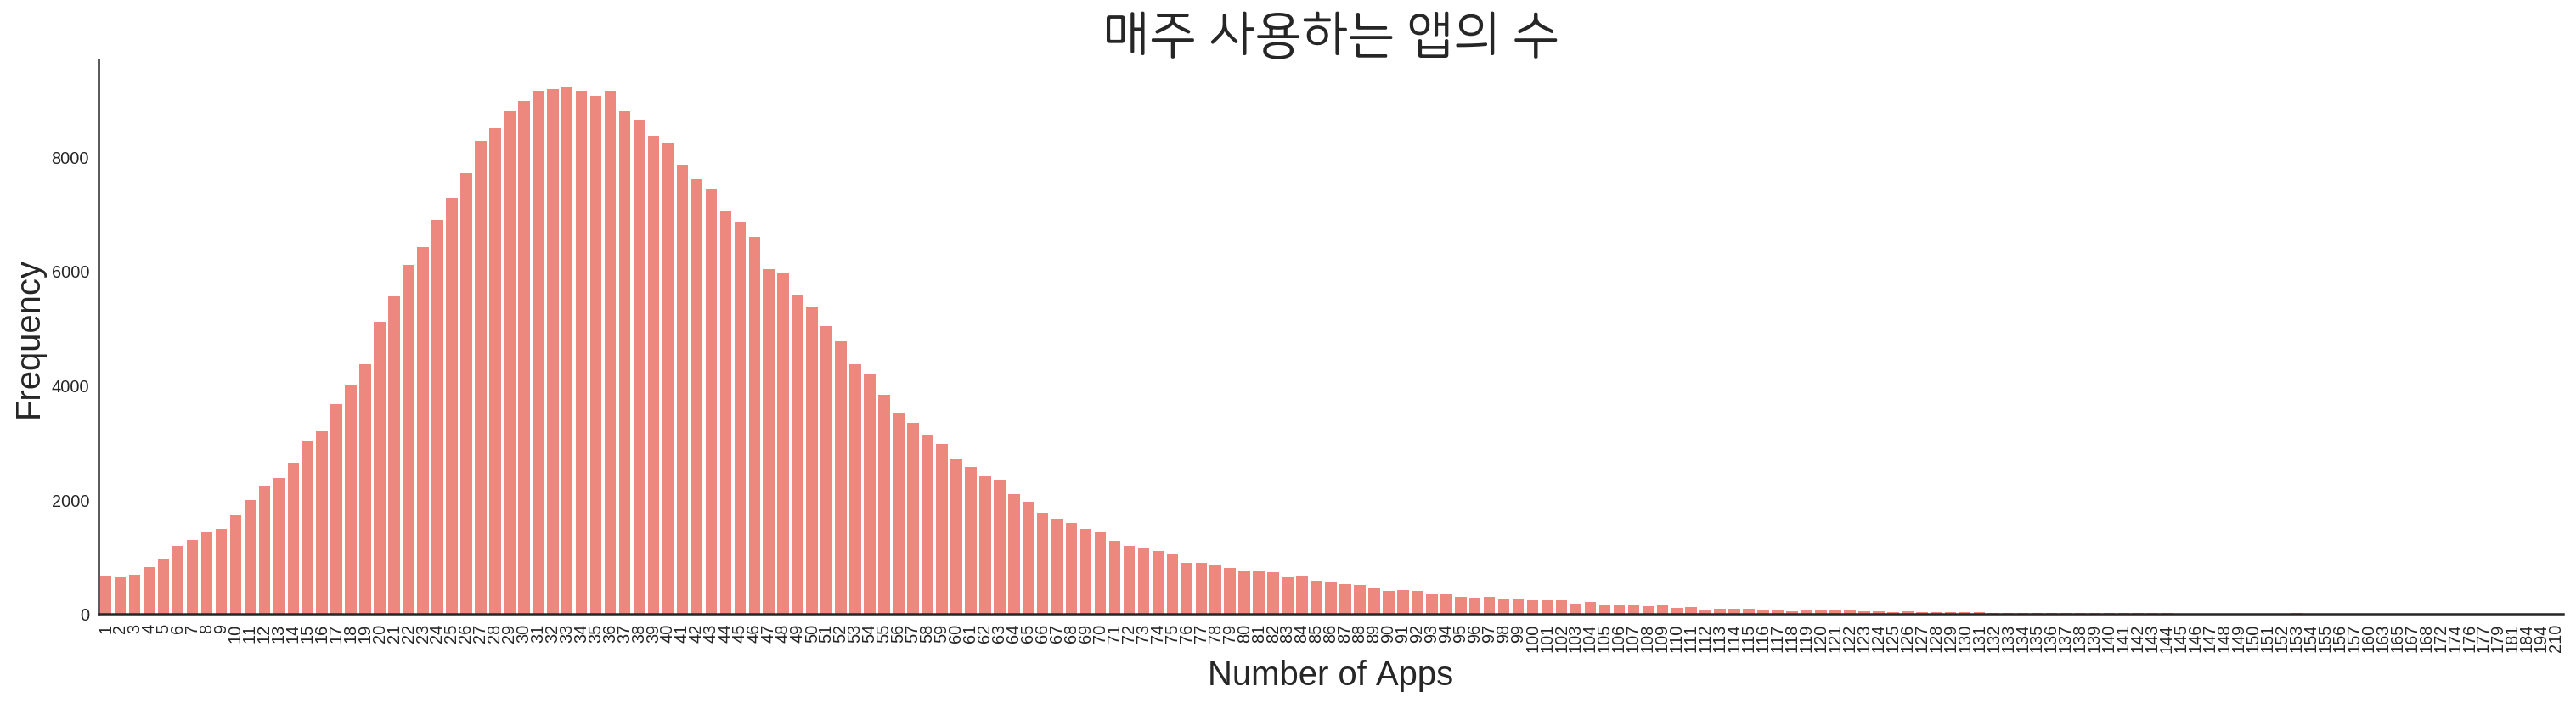

In [62]:
# 매주 사용하는 앱의 수?
# 살짝 right-skewed된 정규분포 모양
# 보통 1주일에 3x~4x개 정도의 앱을 사용하는 사람이 가장 많음
# 기본 내장 앱을 지우면 좀 더 다른 결과가 나올지도?

appnum_for_each_count = usage_sum_time_notzero.groupby(['panel_id','reg_cnt'])['total_time_stamp'].count().reset_index()
appcount = appnum_for_each_count.groupby('total_time_stamp')['panel_id'].count()

plt.figure(figsize=(26,6))
sns.barplot(x=appcount.index, y=appcount.values, color='#ff796c')
sns.despine()

plt.xlabel('Number of Apps', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('매주 사용하는 앱의 수', fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)

plt.show()

In [63]:
# 앱 사용시간과 관련된 데이터
# 앱이 한 기기에서 동시에 여러개가 사용될... 수도 있겠지? 노래 들으면서 웹서핑, 유튜브레드 켜놓고 카톡하기 등등....

notzero_appusage_timedata = usage_sum_time_notzero.groupby(['panel_id','reg_cnt'])['total_usage_time'].agg([sum,np.mean,np.std,min,max]).reset_index()
notzero_appusage_timedata['max_ratio'] = notzero_appusage_timedata['max'] / notzero_appusage_timedata['sum']

timedata_stat_table = notzero_appusage_timedata.groupby('reg_cnt').agg({'sum': [np.mean,np.std], 
                               'mean': [np.mean,np.std], 
                               'std': [np.mean,np.std], 
                               'min': [np.mean,np.std],
                               'max': [np.mean,np.std],
                               'max_ratio': [np.mean,np.std]                                       
                                })

In [64]:
notzero_appusage_timedata.head()

,panel_id,reg_cnt,sum,mean,std,min,max,max_ratio
0,A0000910,10,295.3,11.812000,19.577162,0.0,73.1,0.247545
1,A0000910,11,1431.1,30.448936,85.110207,0.0,506.5,0.353924
2,A0000910,12,2096.3,58.230556,164.257061,0.1,890.8,0.424939
3,A0000910,13,1949.0,51.289474,98.939768,0.1,387.4,0.198769
4,A0000910,14,2815.3,70.382500,197.423177,0.2,1026.3,0.364544


In [133]:
notzero_appusage_timedata['reg_cnt'] = notzero_appusage_timedata['reg_cnt'].map(lambda x: int(x))
notzero_appusage_timedata['reg_cnt_before'] = notzero_appusage_timedata['reg_cnt'].map(lambda x: int(x)-1)

notzero_appusage_timedata_before = notzero_appusage_timedata[['panel_id','reg_cnt','sum','mean','std','min','max','max_ratio']]
notzero_appusage_timedata_before.columns = ['panel_id', 'reg_cnt_before', 'sum_before', 
                                            'mean_before', 'std_before', 'min_before', 'max_before', 'max_ratio_before']
notzero_appusage_timedata = notzero_appusage_timedata.merge(notzero_appusage_timedata_before, 
                                                            how='left', on=['panel_id','reg_cnt_before'] )

notzero_appusage_timedata['sum_diff'] = notzero_appusage_timedata['sum'] - notzero_appusage_timedata['sum_before']
notzero_appusage_timedata['mean_diff'] = notzero_appusage_timedata['mean'] - notzero_appusage_timedata['mean_before']
notzero_appusage_timedata['std_diff'] = notzero_appusage_timedata['std'] - notzero_appusage_timedata['std_before']
notzero_appusage_timedata['min_diff'] = notzero_appusage_timedata['min'] - notzero_appusage_timedata['min_before']
notzero_appusage_timedata['max_diff'] = notzero_appusage_timedata['max'] - notzero_appusage_timedata['max_before']
notzero_appusage_timedata['max_ratio_diff'] = notzero_appusage_timedata['max_ratio'] - notzero_appusage_timedata['max_ratio_before']

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


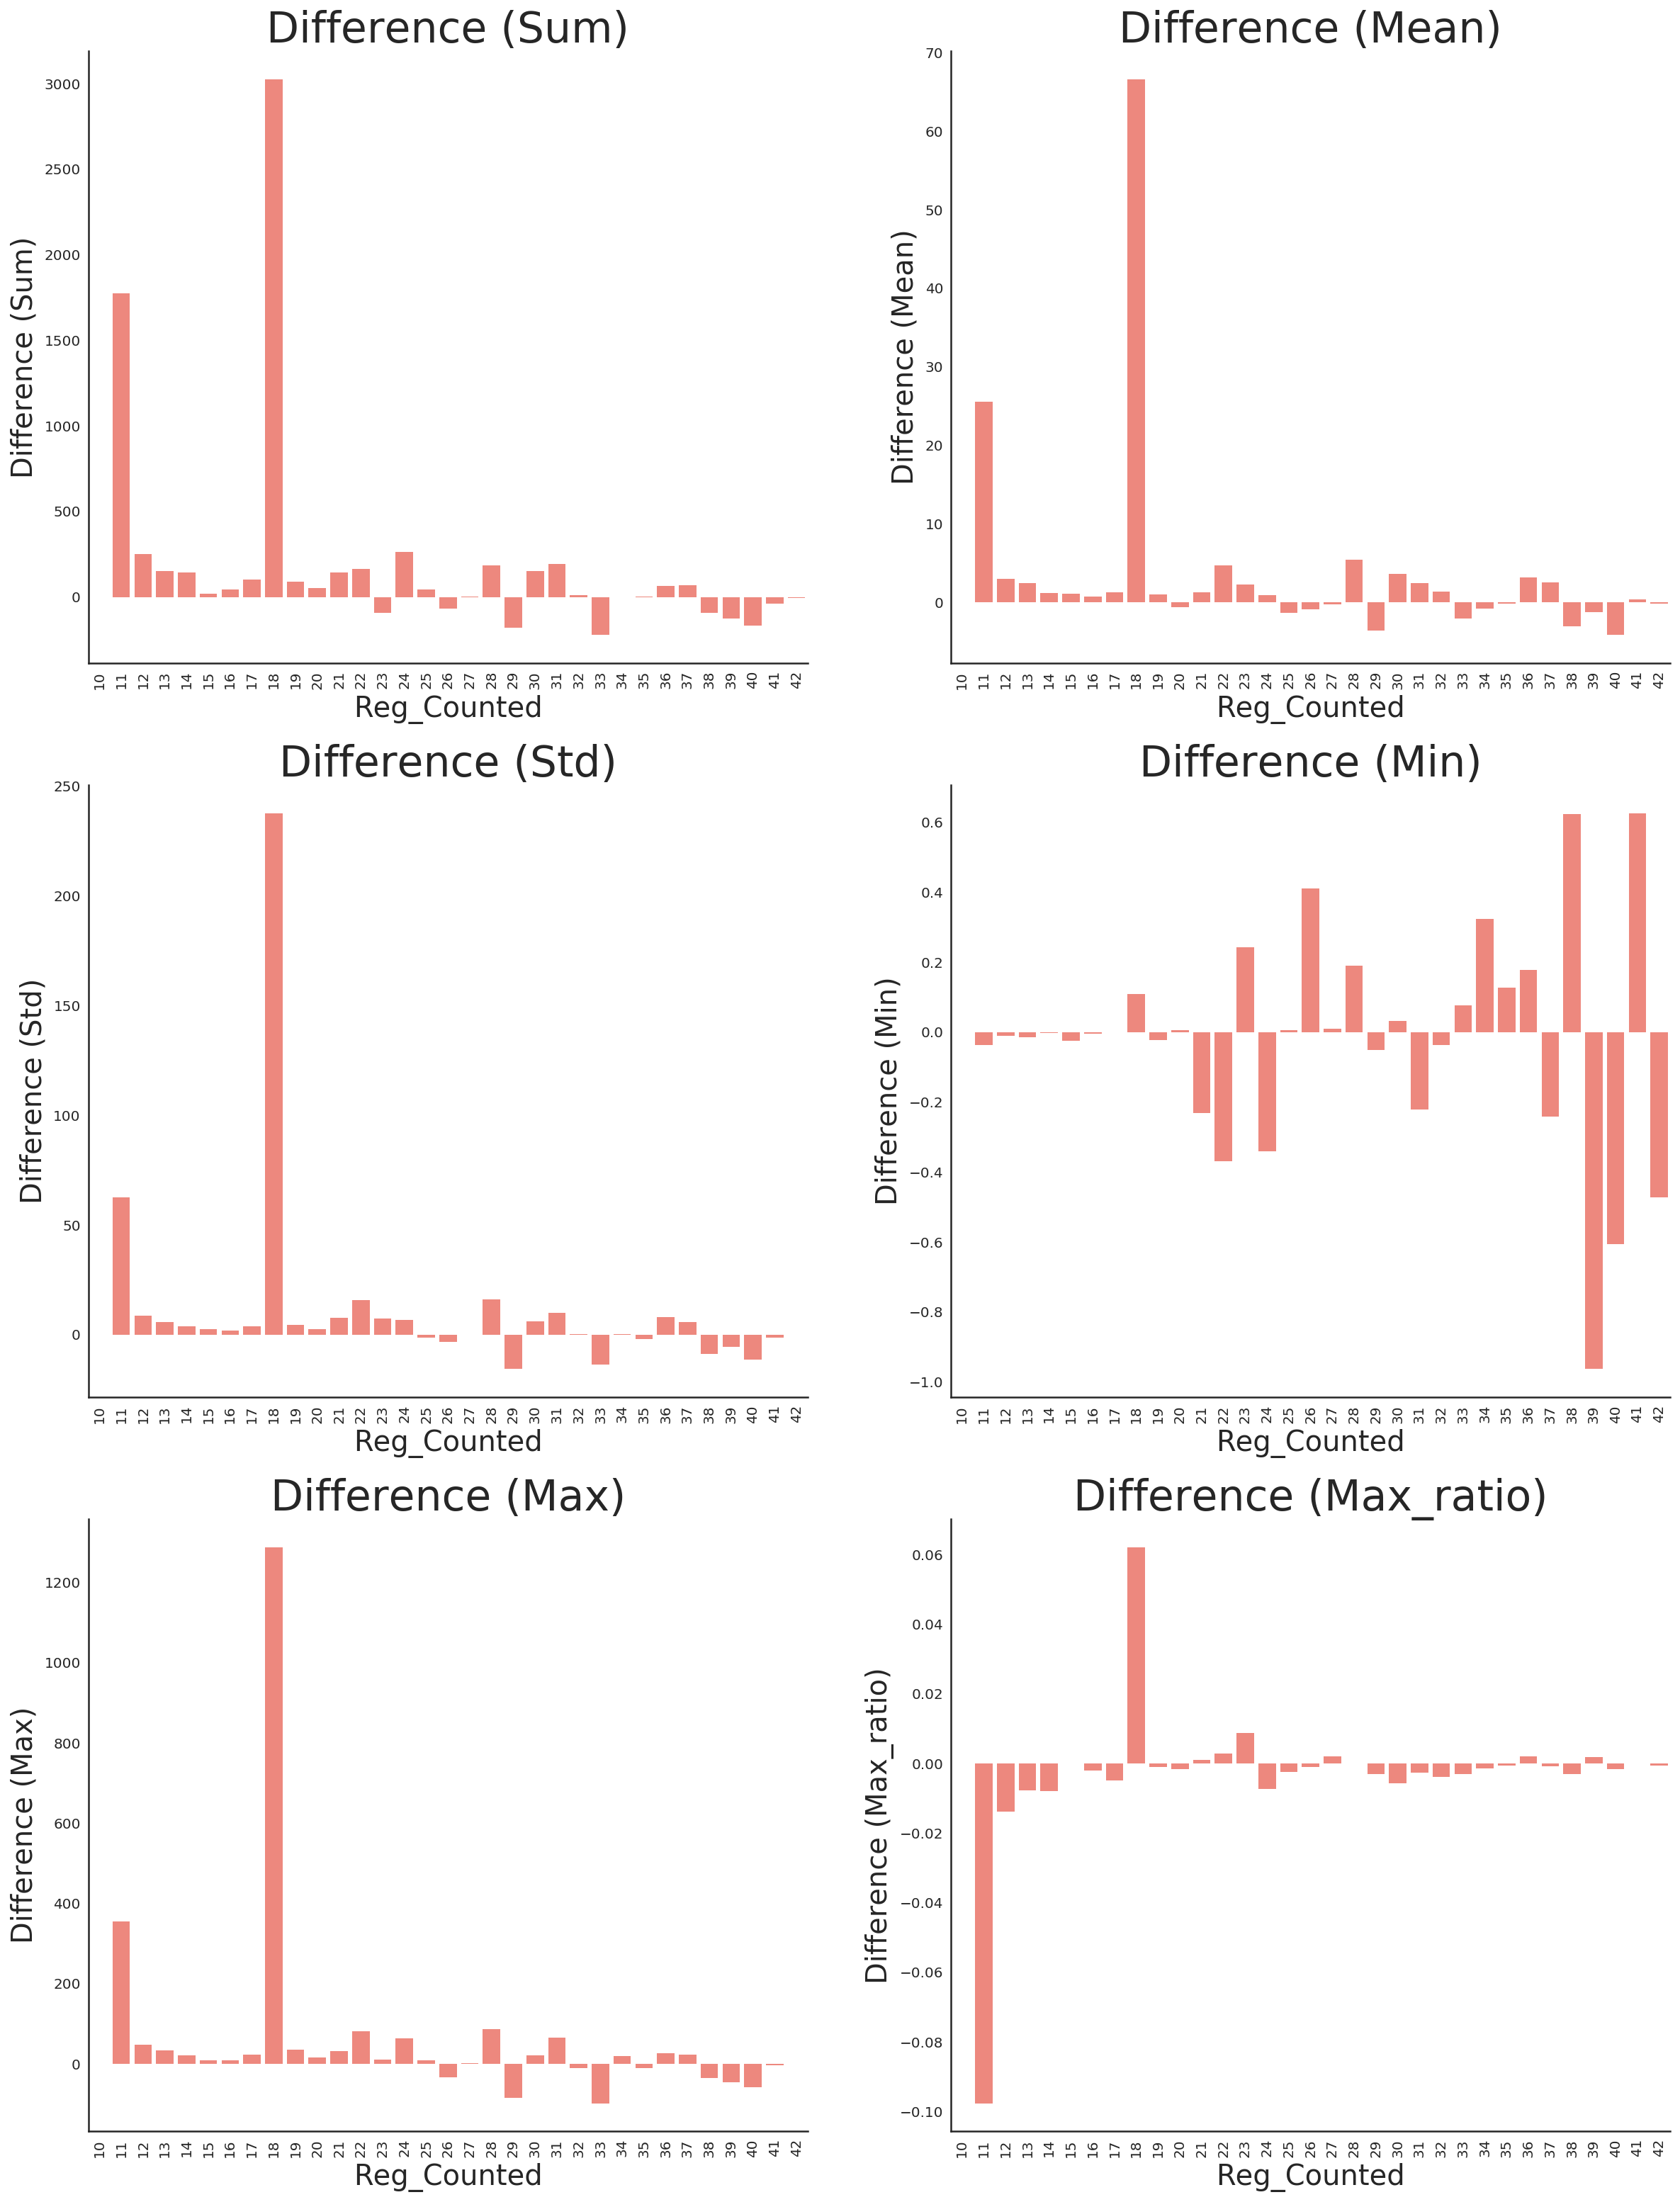

In [153]:
# 18번째 count주차에 무슨 일이 있었던 것일까?
# 18년 1월 15일~ 1월 20일에 측정

sum_diff_mean = notzero_appusage_timedata.groupby('reg_cnt')['sum_diff'].mean()
mean_diff_mean = notzero_appusage_timedata.groupby('reg_cnt')['mean_diff'].mean()
std_diff_mean = notzero_appusage_timedata.groupby('reg_cnt')['std_diff'].mean()
min_diff_mean = notzero_appusage_timedata.groupby('reg_cnt')['min_diff'].mean()
max_diff_mean = notzero_appusage_timedata.groupby('reg_cnt')['max_diff'].mean()
max_ratio_diff_mean = notzero_appusage_timedata.groupby('reg_cnt')['max_ratio_diff'].mean()


plt.figure(figsize=(20,27))


plt.subplot(321)
sns.barplot(x=sum_diff_mean.index, y=sum_diff_mean.values, color='#ff796c')
sns.despine()

plt.xlabel('Reg_Counted', fontsize=20)
plt.ylabel('Difference (Sum)', fontsize=20)
plt.title('Difference (Sum)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)


plt.subplot(322)
sns.barplot(x=mean_diff_mean.index, y=mean_diff_mean.values, color='#ff796c')
sns.despine()

plt.xlabel('Reg_Counted', fontsize=20)
plt.ylabel('Difference (Mean)', fontsize=20)
plt.title('Difference (Mean)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)


plt.subplot(323)
sns.barplot(x=std_diff_mean.index, y=std_diff_mean.values, color='#ff796c')
sns.despine()

plt.xlabel('Reg_Counted', fontsize=20)
plt.ylabel('Difference (Std)', fontsize=20)
plt.title('Difference (Std)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)


plt.subplot(324)
sns.barplot(x=min_diff_mean.index, y=min_diff_mean.values, color='#ff796c')
sns.despine()

plt.xlabel('Reg_Counted', fontsize=20)
plt.ylabel('Difference (Min)', fontsize=20)
plt.title('Difference (Min)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)


plt.subplot(325)
sns.barplot(x=max_diff_mean.index, y=max_diff_mean.values, color='#ff796c')
sns.despine()

plt.xlabel('Reg_Counted', fontsize=20)
plt.ylabel('Difference (Max)', fontsize=20)
plt.title('Difference (Max)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)


plt.subplot(326)
sns.barplot(x=max_ratio_diff_mean.index, y=max_ratio_diff_mean.values, color='#ff796c')
sns.despine()

plt.xlabel('Reg_Counted', fontsize=20)
plt.ylabel('Difference (Max_ratio)', fontsize=20)
plt.title('Difference (Max_ratio)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)


plt.show()

In [ ]:
usage_sum_time_notzero.head()

In [73]:
# 주간 앱 사용시간 총합, 평균, 표준편차 각가의 평균과 표준편차값
# 보통 평균적으로 1주일에 80시간 정도 (하루에 12.x시간) 앱 사용 - 깨어있을때는 폰을 사용하므로 당연함, 기본 내장어플 빼고 다시 해봐야함...
# 주간 앱의 평균 사용시간은 보통 116분 정도... 1주일에 2시간 정도 사용, 하지만 표준편차가 크므로 이를 고려해야함
# 주간 앱 사용시간의 표준편차는 보통 339분으로 굉장히 크다...

# min 값과 max 값이 비정상적으로 큰건 어떤 경우일까?
# 잠자는 시간에도 계속 돌아가는 app?

timedata_stat_table

sum                     mean                     std  \
                mean          std        mean         std        mean   
reg_cnt                                                                 
10       1458.584880  1388.173110   51.337356   43.380969  123.368923   
11       2674.602782  1992.259542   69.201978   43.902315  165.951662   
12       2761.323275  2023.906981   70.110709   42.719630  169.161951   
13       2769.776315  2001.015352   70.798929   41.988102  170.485886   
14       2828.336644  2033.026577   71.006521   42.774315  171.535838   
15       2790.058649  1991.926717   71.486754   42.154738  171.952407   
16       2756.268455  1978.678807   71.242043   42.365081  171.327168   
17       2792.661340  1987.496955   71.614708   44.620636  172.279090   
18       5706.409527  8307.965673  135.701356  153.654244  401.996470   
19       5634.048786  8221.720894  134.338496  156.738968  396.814754   
20       5557.253435  7792.738356  131.658765  147.371625  392.347095   
21       5701.427861  8599.164209  133.469549  157.591249  399.366829   
22       5846.605797  9076.689357  137.219362  167.833675  413.044996   
23       5657.846691  8306.881989  137.575177  160.066508  414.406841   
24       5744.496069  8314.537162  134.867498  158.453833  410.580860   
25       5742.887581  8776.876123  132.605301  159.734536  405.769024   
26       5620.682220  8956.015056  130.306447  166.938042  397.498650   
27       5533.441115  8673.233806  128.434271  161.305621  392.758190   
28       5480.864273  8898.441365  128.851529  165.494920  394.424334   
29       5241.734426  8367.713157  123.535701  155.363006  374.027052   
30       5262.814023  8617.740304  124.476656  165.416860  370.915810   
31       5321.535413  8800.486305  124.177183  161.349415  372.977208   
32       5300.489055  8908.504275  124.874216  157.800051  370.486919   
33       5074.694117  8539.683676  122.814252  164.270643  356.837599   
34       5006.140691  8382.065085  120.395789  170.450023  352.044330   
35       4951.645441  8515.879661  119.421990  177.123131  347.300374   
36       4968.466218  8074.120235  120.985738  182.624767  351.100672   
37       5004.102360  8511.582316  122.411102  178.604987  353.540209   
38       4825.812821  8026.836612  117.938228  182.844187  340.267231   
39       4612.308438  7771.980552  115.026058  169.205839  329.081627   
40       4391.157243  7329.920193  110.093897  152.363885  315.043068   
41       4386.759527  7218.299319  111.026817  167.128978  316.288049   
42       4282.864398  6680.122636  107.977345  149.654231  309.244434   

                          min                     max              max_ratio  \
                std      mean        std         mean          std      mean   
reg_cnt                                                                        
10        96.661682  0.088373   0.292616   533.224513   409.324419  0.413505   
11        91.317029  0.078618   0.781346   774.312161   415.842693  0.347556   
12        90.546055  0.085546   1.253339   790.868011   412.170790  0.343556   
13        89.195716  0.074143   0.513899   798.897385   408.763729  0.343334   
14        89.477640  0.099490   2.476744   802.172872   406.480047  0.340428   
15        89.013365  0.084087   1.148903   800.679578   403.743576  0.343519   
16        88.967667  0.082362   0.928279   795.577351   401.960997  0.345714   
17        91.124738  0.079059   1.182520   801.192470   409.517687  0.344020   
18       465.236314  0.167903   5.516585  2049.775544  2504.985583  0.405043   
19       463.569974  0.103292   3.984778  2026.608363  2452.495939  0.404801   
20       446.406034  0.296565  22.612039  2004.611503  2381.605676  0.404334   
21       472.035606  0.474741  37.031750  2032.358785  2502.085694  0.404726   
22       495.703390  0.070654   0.938289  2101.825914  2628.693262  0.407068   
23       482.038138  0.623426  30.818417  2086.703224  2529.178583  0.416417   
24       485.202455  0.20963

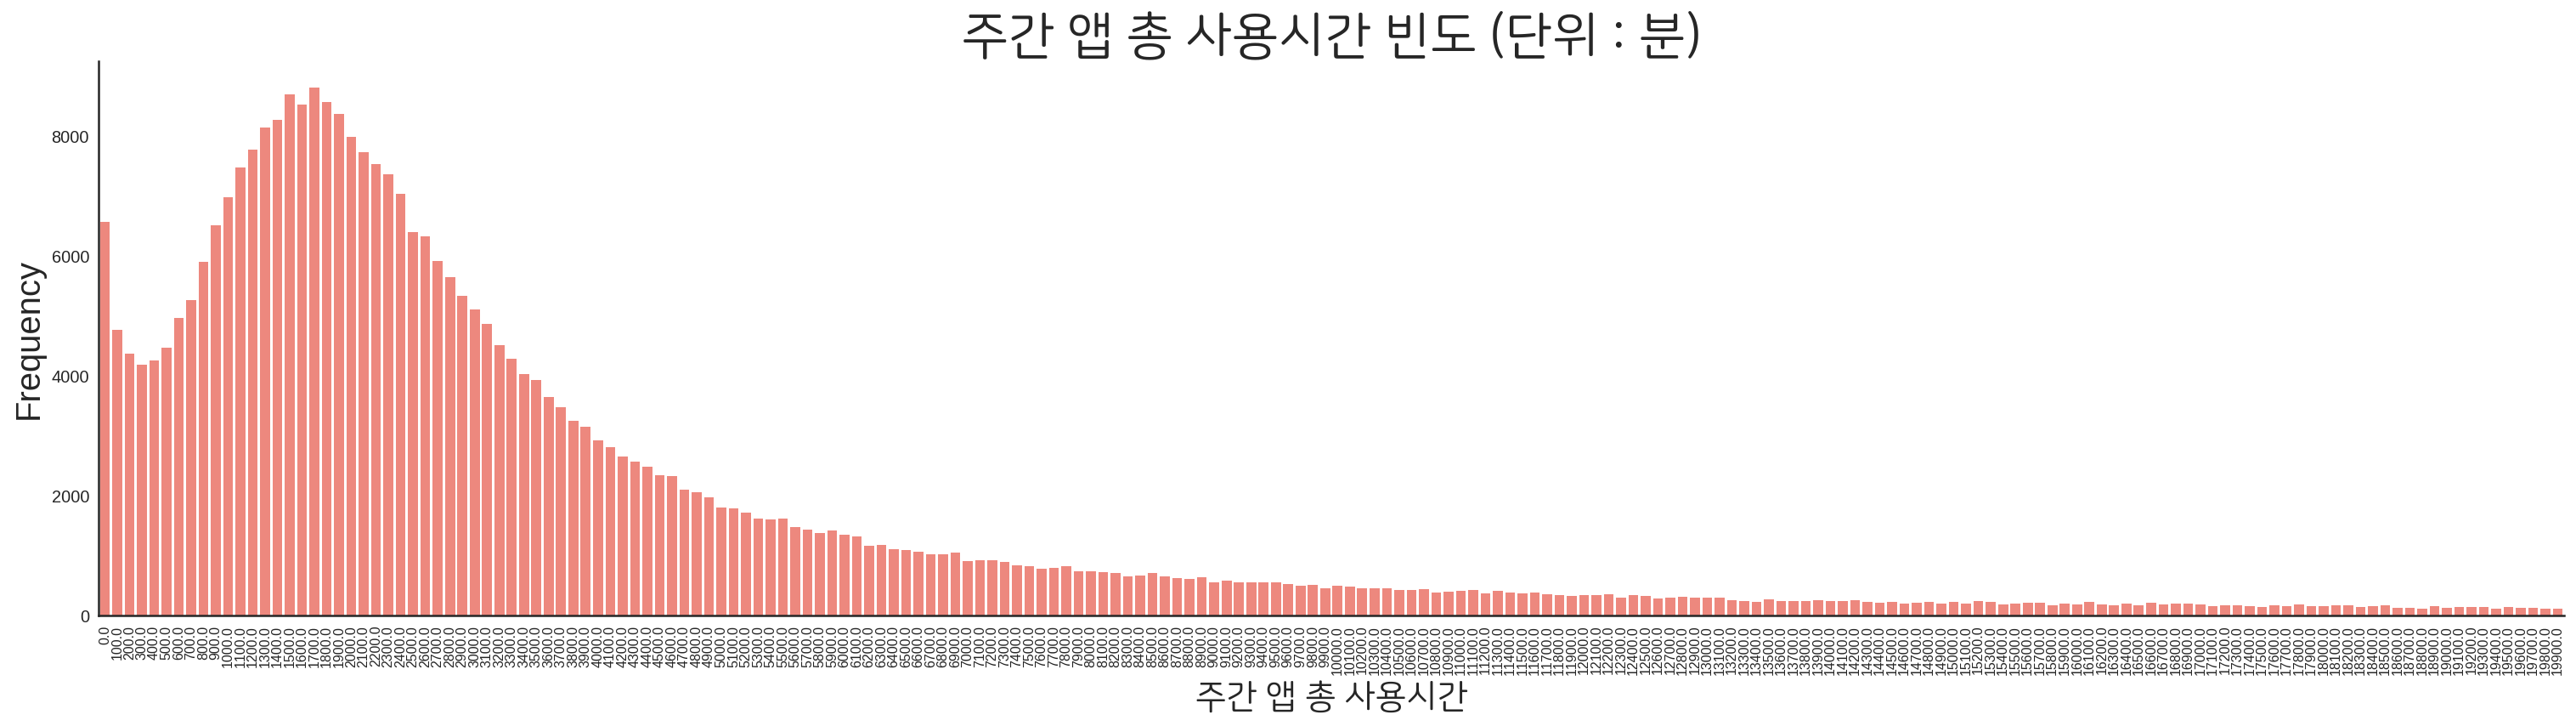

In [70]:
# 1주일에 16~50시간 정도 앱을 사용하는 사람이 가장 많음
# 꼬리가 너무 길어서 잘랐는데, 평균은 1주일에 80시간

timedata_sum = notzero_appusage_timedata['sum'].map(lambda x: x//100*100)
timedata_sum = timedata_sum.reset_index().groupby('sum')['index'].count()
timedata_sum = timedata_sum.reset_index().iloc[:200,:]

plt.figure(figsize=(26,6))
sns.barplot(x='sum', y='index', data=timedata_sum, color='#ff796c')
sns.despine()

plt.xlabel('주간 앱 총 사용시간', fontproperties=fontprop, fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('주간 앱 총 사용시간 빈도 (단위 : 분)', fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)

plt.show()

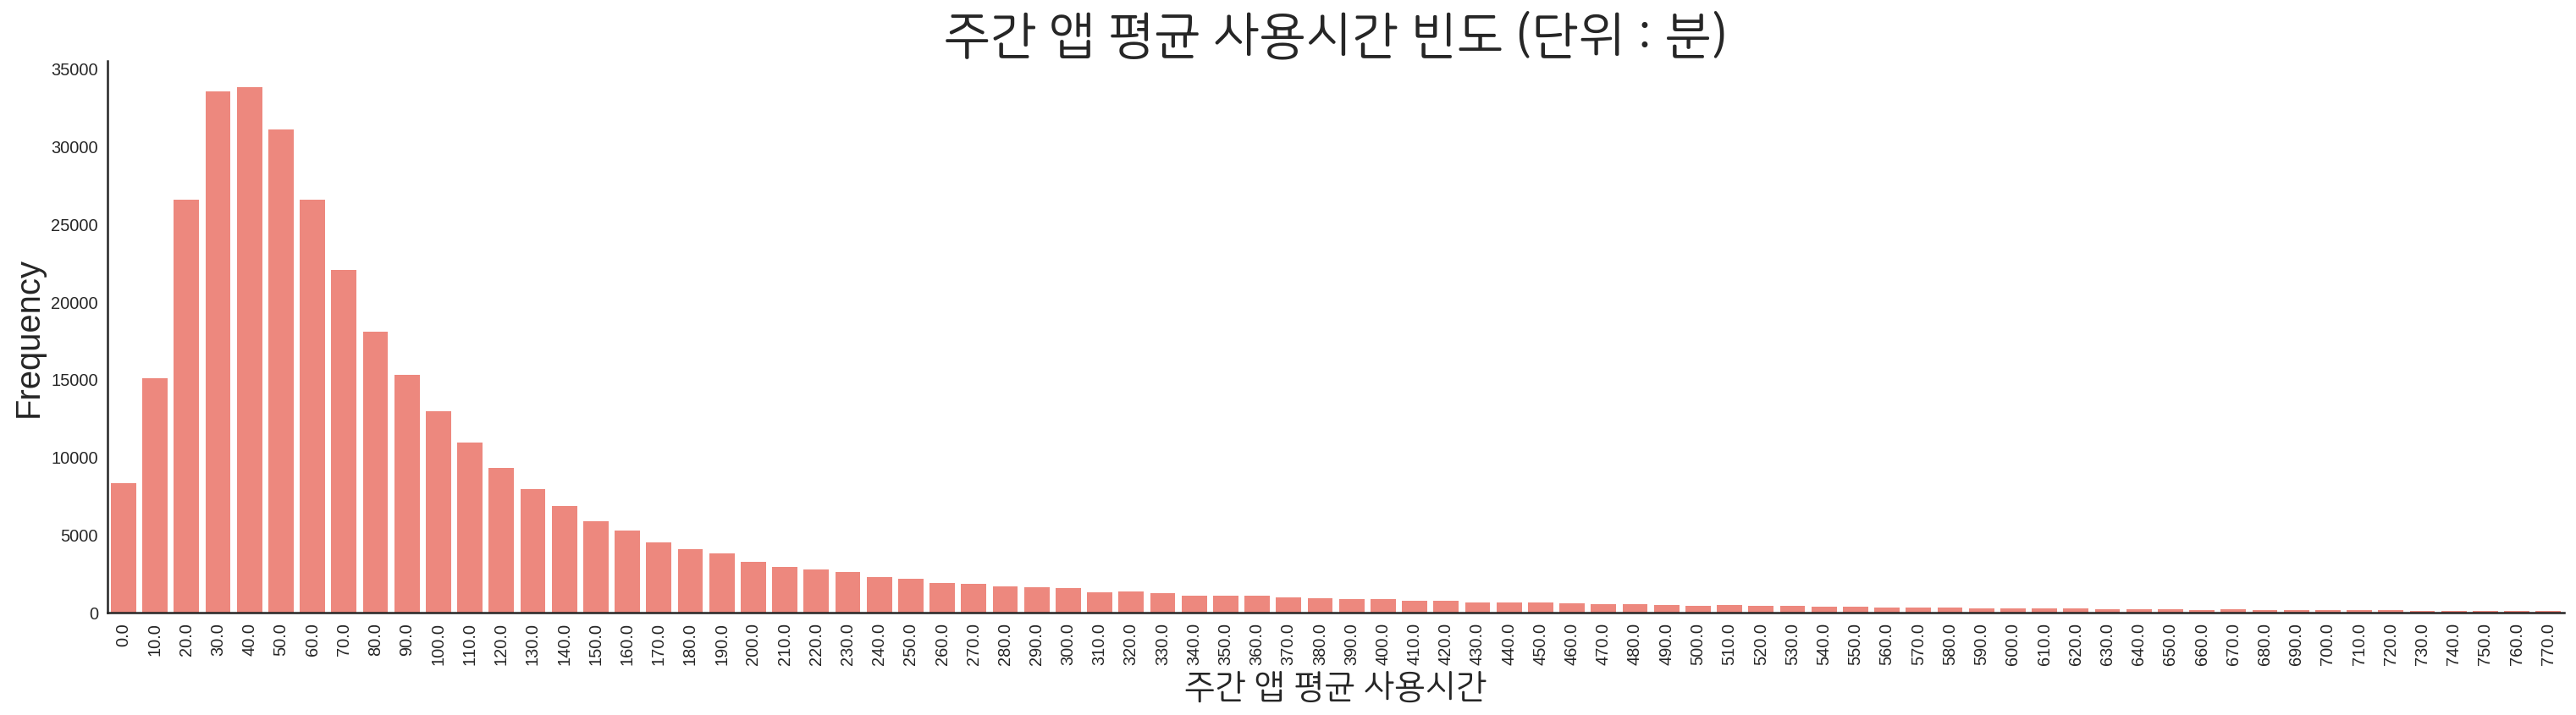

In [74]:
# 주간 앱 사용시간의 평균은 보통 100분을 넘어가지 않음
# 개별 어플을 평균적으로 100분 안짝으로 만진다는 말과 같음
# 하지만 표준편차가 크다는 점을 생각해보면 특정 앱에 사용시간이 집중되어있을거라 생각해볼 수 있음

timedata_mean = notzero_appusage_timedata['mean'].map(lambda x: x//10*10)
timedata_mean = timedata_mean.reset_index().groupby('mean')['index'].count()
timedata_mean = timedata_mean.reset_index().iloc[:200,:]
timedata_mean = timedata_mean[lambda x: x['index'] > 100]

plt.figure(figsize=(26,6))
sns.barplot(x='mean', y='index', data=timedata_mean, color='#ff796c')
sns.despine()

plt.xlabel('주간 앱 평균 사용시간', fontproperties=fontprop, fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('주간 앱 평균 사용시간 빈도 (단위 : 분)', fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)

plt.show()

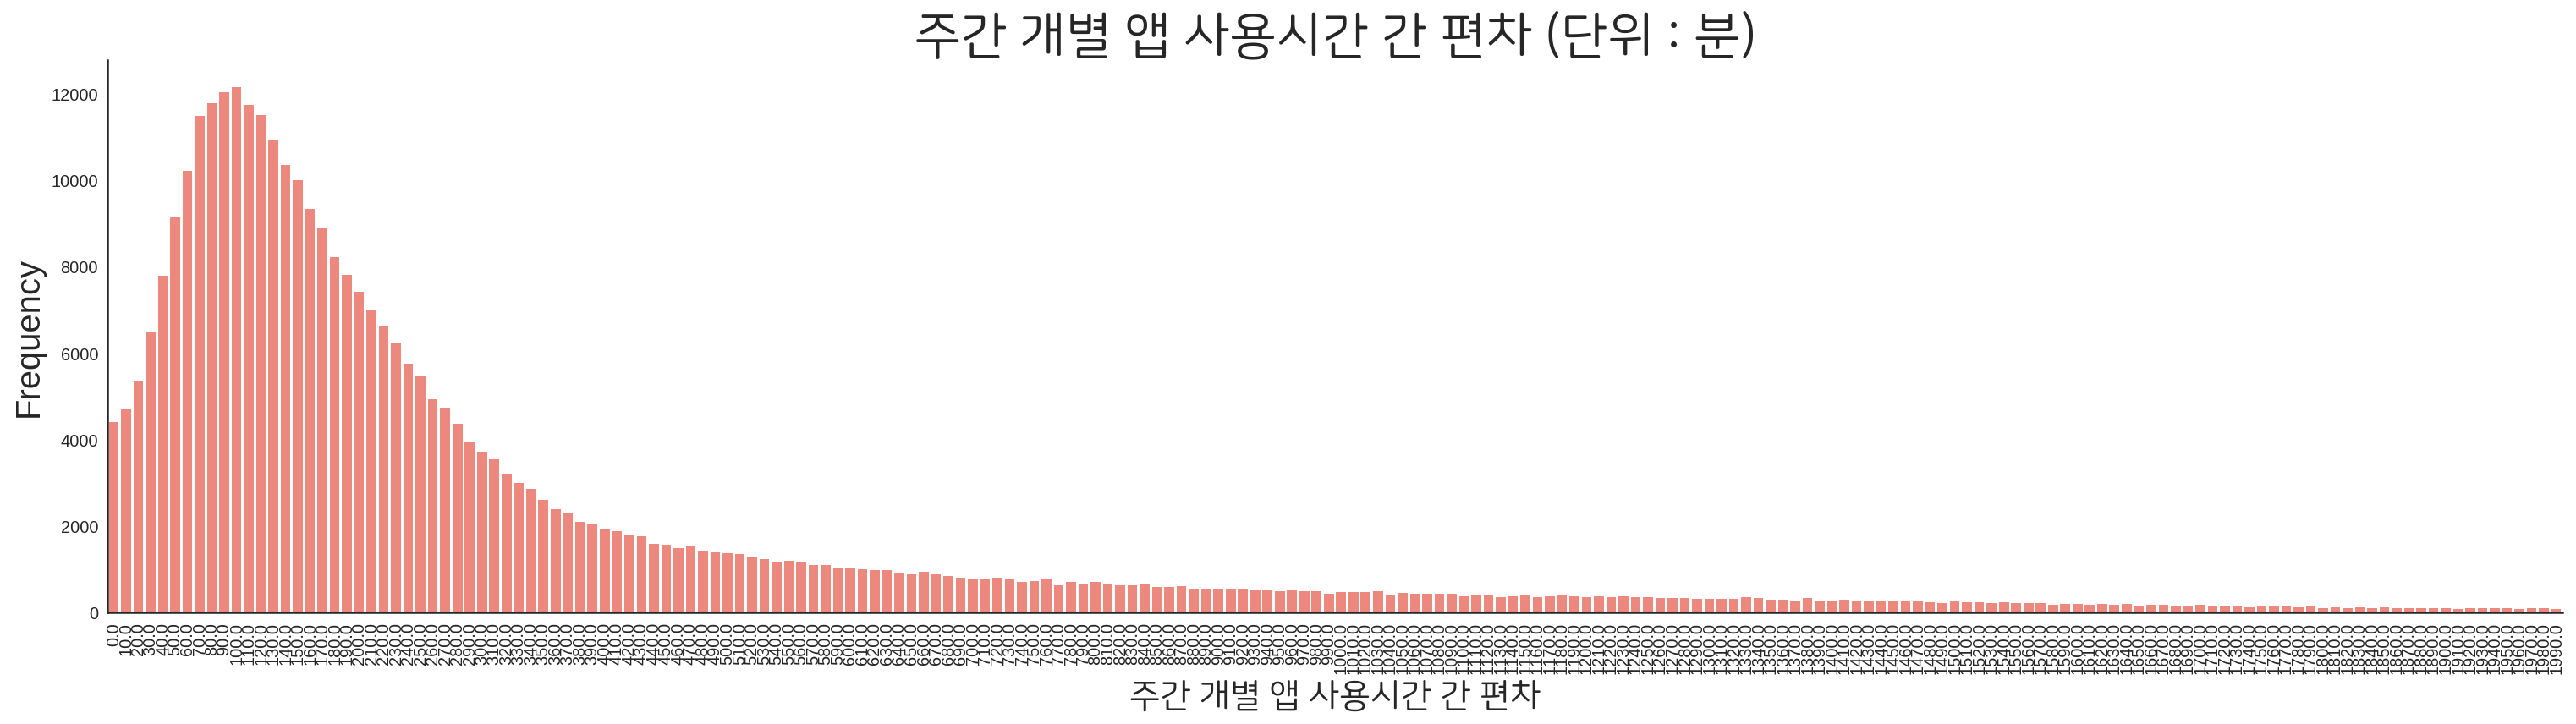

In [75]:
# 100분~200분 사이의 표준편차가 다수

timedata_std = notzero_appusage_timedata['std'].map(lambda x: x//10*10)
timedata_std = timedata_std.reset_index().groupby('std')['index'].count()
timedata_std = timedata_std.reset_index().iloc[:200,:]

plt.figure(figsize=(26,6))
sns.barplot(x='std', y='index', data=timedata_std, color='#ff796c')
sns.despine()

plt.xlabel('주간 개별 앱 사용시간 간 편차', fontproperties=fontprop, fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('주간 개별 앱 사용시간 간 편차 (단위 : 분)', fontproperties=fontprop, fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)

plt.show()

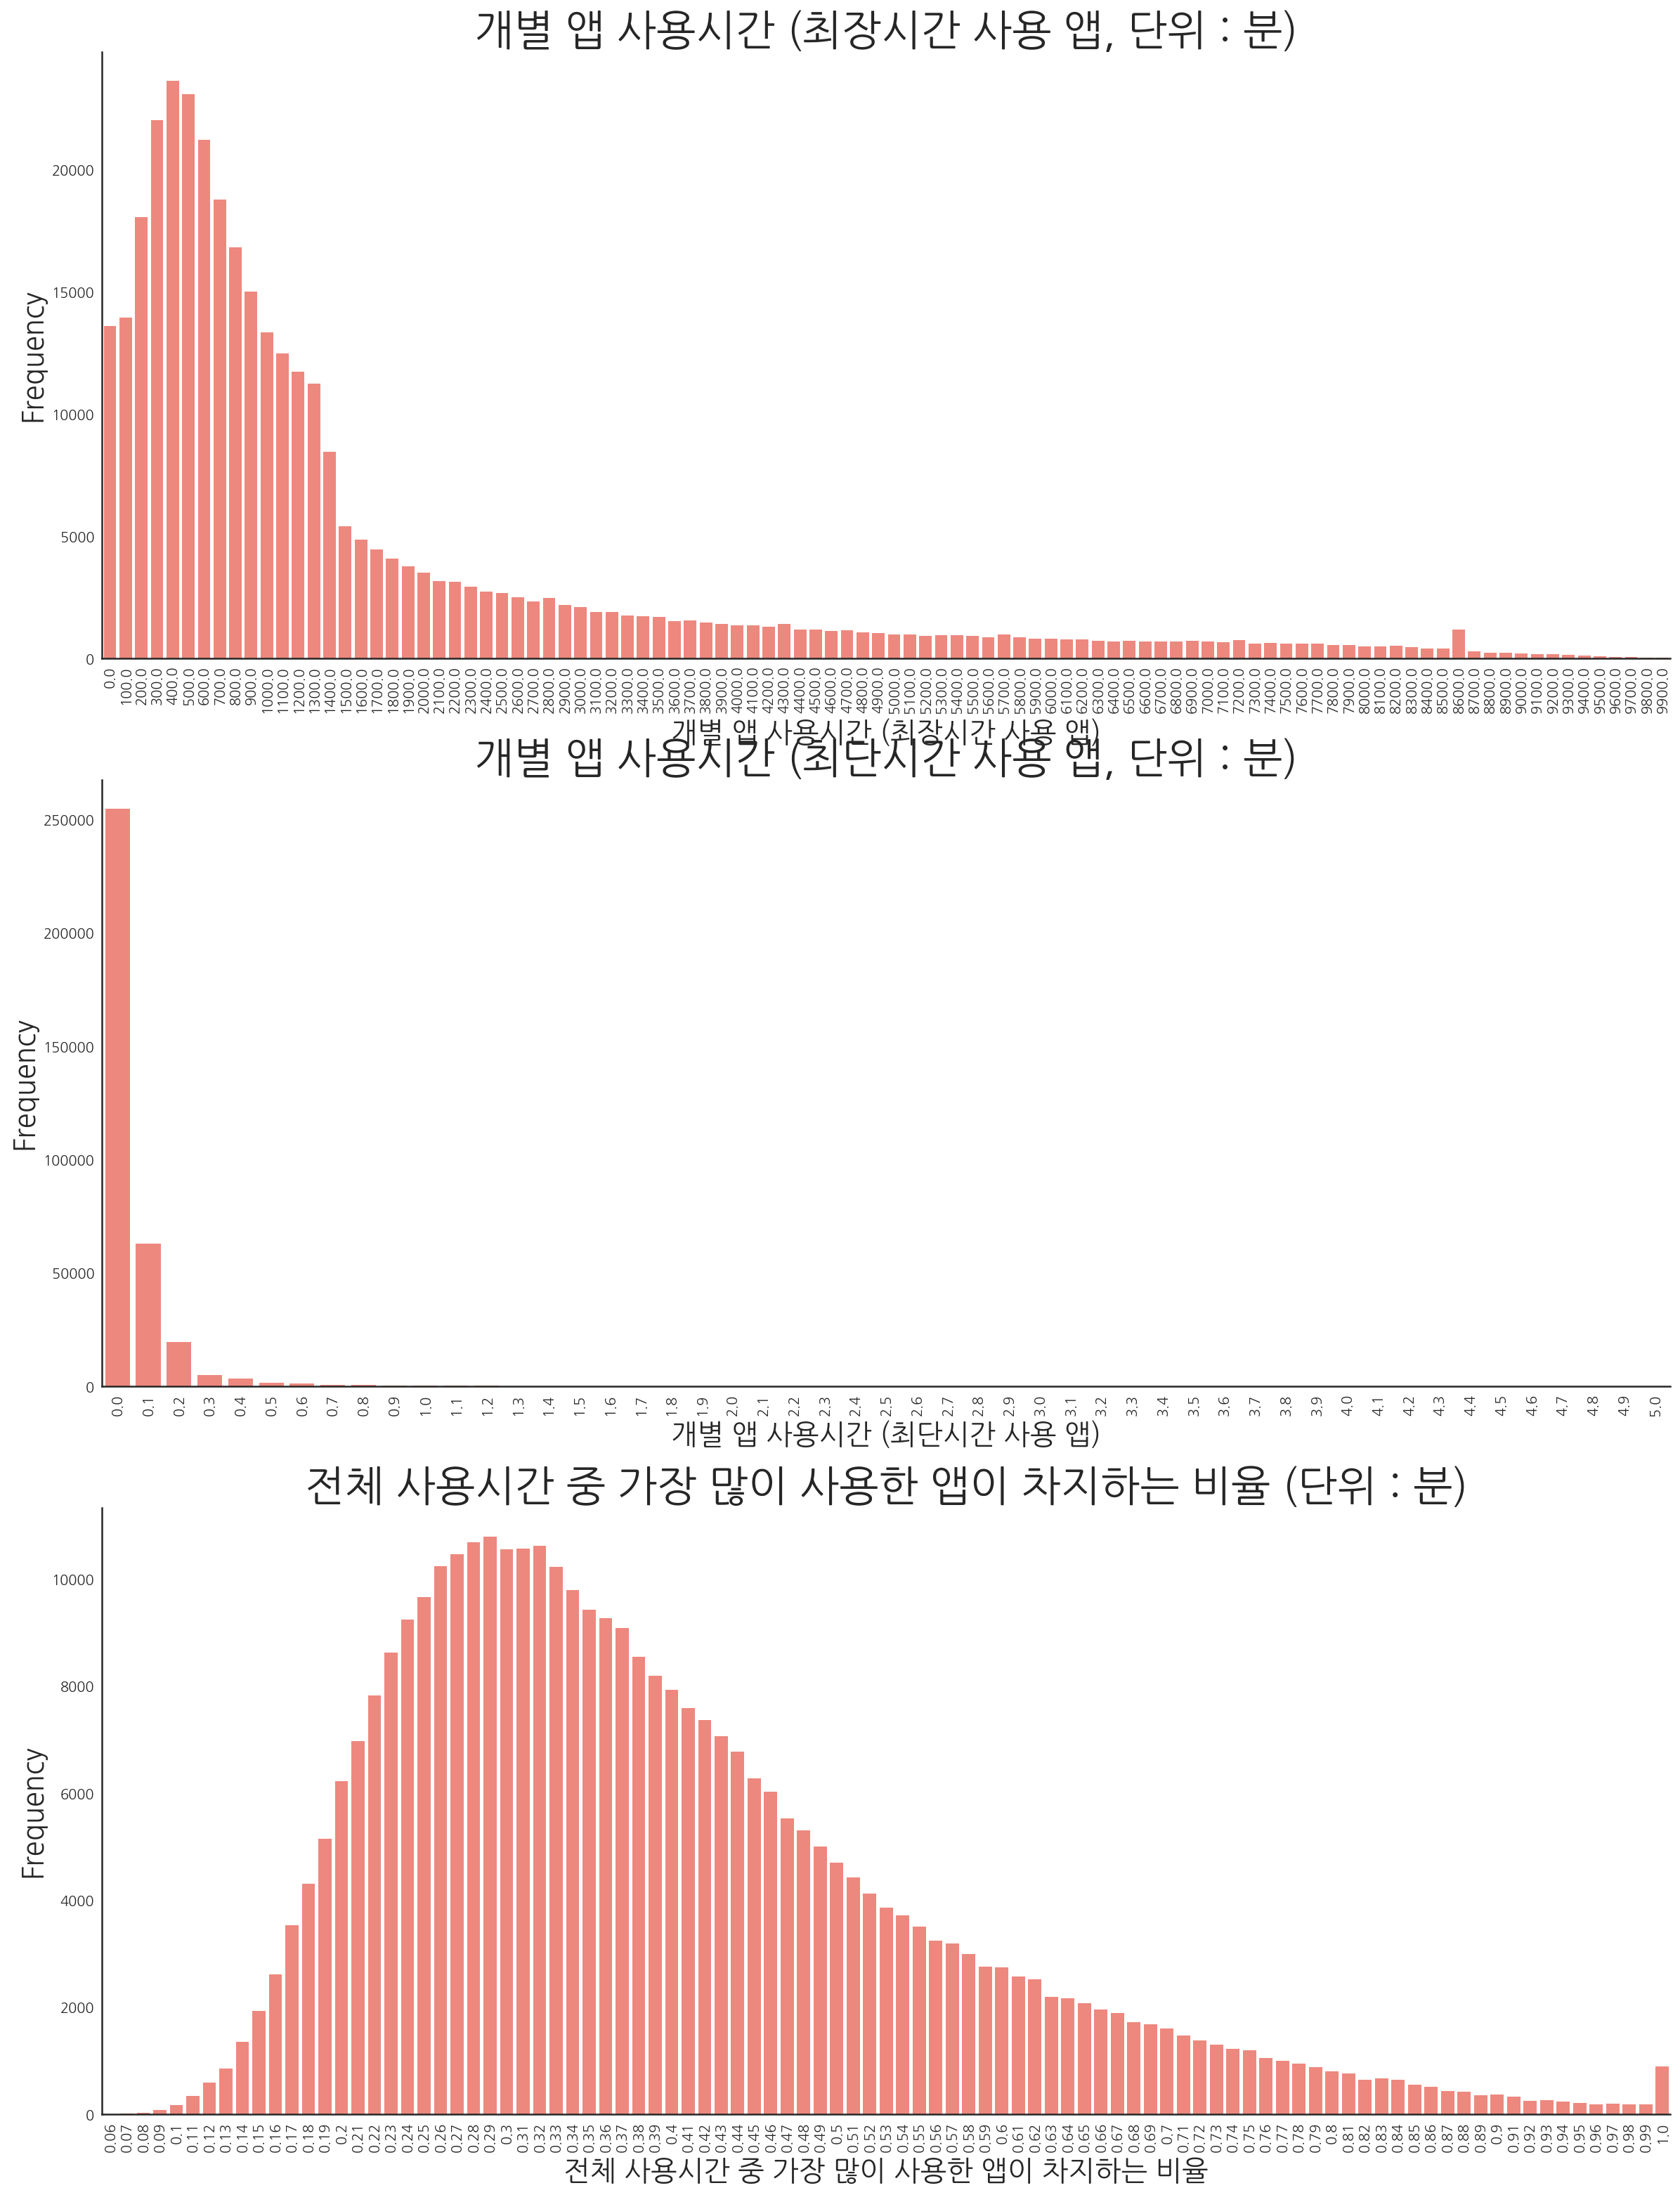

In [315]:
# 가장 많이 사용하는 앱은 보통 매주 300분 ~1300분 (5시간 ~ 21시간) 정도 사용
# 가장 적게 사용하는 앱은 보통 0.2분(12초) 이상 사용하지 않음

# 가장 많이 사용하는 앱이 차지하는 비중은 약 30~40%가 가장 많고, 그 이상도 꽤 있음
# 자주 사용하는 특정 앱만 많이 쓴다는 것을 어느 정도 증명


timedata_max = (
    notzero_appusage_timedata['max'].map(lambda x: x//100*100)
                                 .reset_index()
                                 .groupby('max')['panel_id']
                                 .count()
                                 .reset_index().iloc[:100,:]
)

timedata_min = notzero_appusage_timedata.groupby('min')['max_ratio'].count()[:5]
timedata_max_ratio = notzero_appusage_timedata['max_ratio'].map(lambda x: round(x,2)).reset_index().groupby('max_ratio')['panel_id'].count()


plt.figure(figsize=(20,27))

plt.subplot(311)
sns.barplot(x='max', y='panel_id', data=timedata_max, color='#ff796c')
plt.xlabel('개별 앱 사용시간 (최장시간 사용 앱)', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('개별 앱 사용시간 (최장시간 사용 앱, 단위 : 분)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)
sns.despine()

plt.subplot(312)
sns.barplot(x=timedata_min.index, y=timedata_min.values, color='#ff796c')
plt.xlabel('개별 앱 사용시간 (최단시간 사용 앱)', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('개별 앱 사용시간 (최단시간 사용 앱, 단위 : 분)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)
sns.despine()

plt.subplot(313)
sns.barplot(x=timedata_max_ratio.index, y=timedata_max_ratio.values, color='#ff796c')
plt.xlabel('전체 사용시간 중 가장 많이 사용한 앱이 차지하는 비율', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('전체 사용시간 중 가장 많이 사용한 앱이 차지하는 비율 (단위 : 분)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)
sns.despine()

plt.show()

In [317]:
usage_sum_time_notzero.head()

,panel_id,reg_cnt,package_name,app_name,app_category,total_time_stamp,total_time,reg_date,total_time_hour,total_time_minute,total_time_second,total_usage_time
14,A0000910,10,com.facebook.katana,Facebook,소셜,105439.0,00:01:45,2017-11-25,0,1,45,1.8
16,A0000910,10,com.facebook.orca,Messenger,커뮤니케이션,124418.0,00:02:04,2017-11-25,0,2,4,2.1
31,A0000910,10,com.hrc.mobilo,MobileCX,라이프스타일,64098.0,00:01:04,2017-11-25,0,1,4,1.1
36,A0000910,10,com.interpark.notitome,NotiToMe,라이프스타일,307031.0,00:05:07,2017-11-25,0,5,7,5.1
39,A0000910,10,com.kakao.page,카카오페이지,도서/참고자료,3581975.0,00:59:41,2017-11-25,0,59,41,59.7


In [33]:
# 카테고리의 nan값을 N으로 채움, 원래도 없는 애들이 N으로 들어가있어서 똑같이 맞춰준거임

usage_sum_time_notzero['app_category'] = usage_sum_time_notzero['app_category'].fillna('N')

In [34]:
# 앱 카테고리는 총 48개

usage_sum_time_notzero['app_category'].nunique()

48

In [35]:
# 각 카테고리는 대충 이렇다...

# 소셜과 커뮤니케이션의 차이는 뭐지?
# 라이프스타일은 어떤걸 말하는걸까? 
# 생산성? 도구?
# N? nan이랑 같은건가? 아니면 Naver?
# 이벤트?
# 음악/오디오, 음악은 왜 또 따로임?
# 맞춤 설정?
# 라이브러리/데모?
# 단어는 교육 카테고리에 들어가면 안되나?

# 전체적으로 게임 관련 카테고리가 굉장히 많다!

usage_sum_time_notzero['app_category'].unique()

array(['소셜', '커뮤니케이션', '라이프스타일', '도서/참고자료', '금융', '엔터테인먼트', '생산성', '건강/운동',
       '사진', '날씨', '도구', '동영상 플레이어/편집기', '여행 및 지역정보', 'N', '쇼핑',
       '지도/내비게이션', '음악/오디오', '비즈니스', '교육', '부동산/홈 인테리어', '시뮬레이션', '뷰티',
       '식음료', '어드벤처', '뉴스/잡지', '퍼즐', '캐주얼 게임', '퀴즈', '만화', '아케이드', '보드',
       '액션', '이벤트', '롤플레잉', '출산/육아', '음악', '맞춤 설정', '스포츠', '자동차', '전략',
       '라이브러리/데모', '예술/디자인', '카드', '의료', '자동차 경주', '데이트', '카지노', '단어'], dtype=object)

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


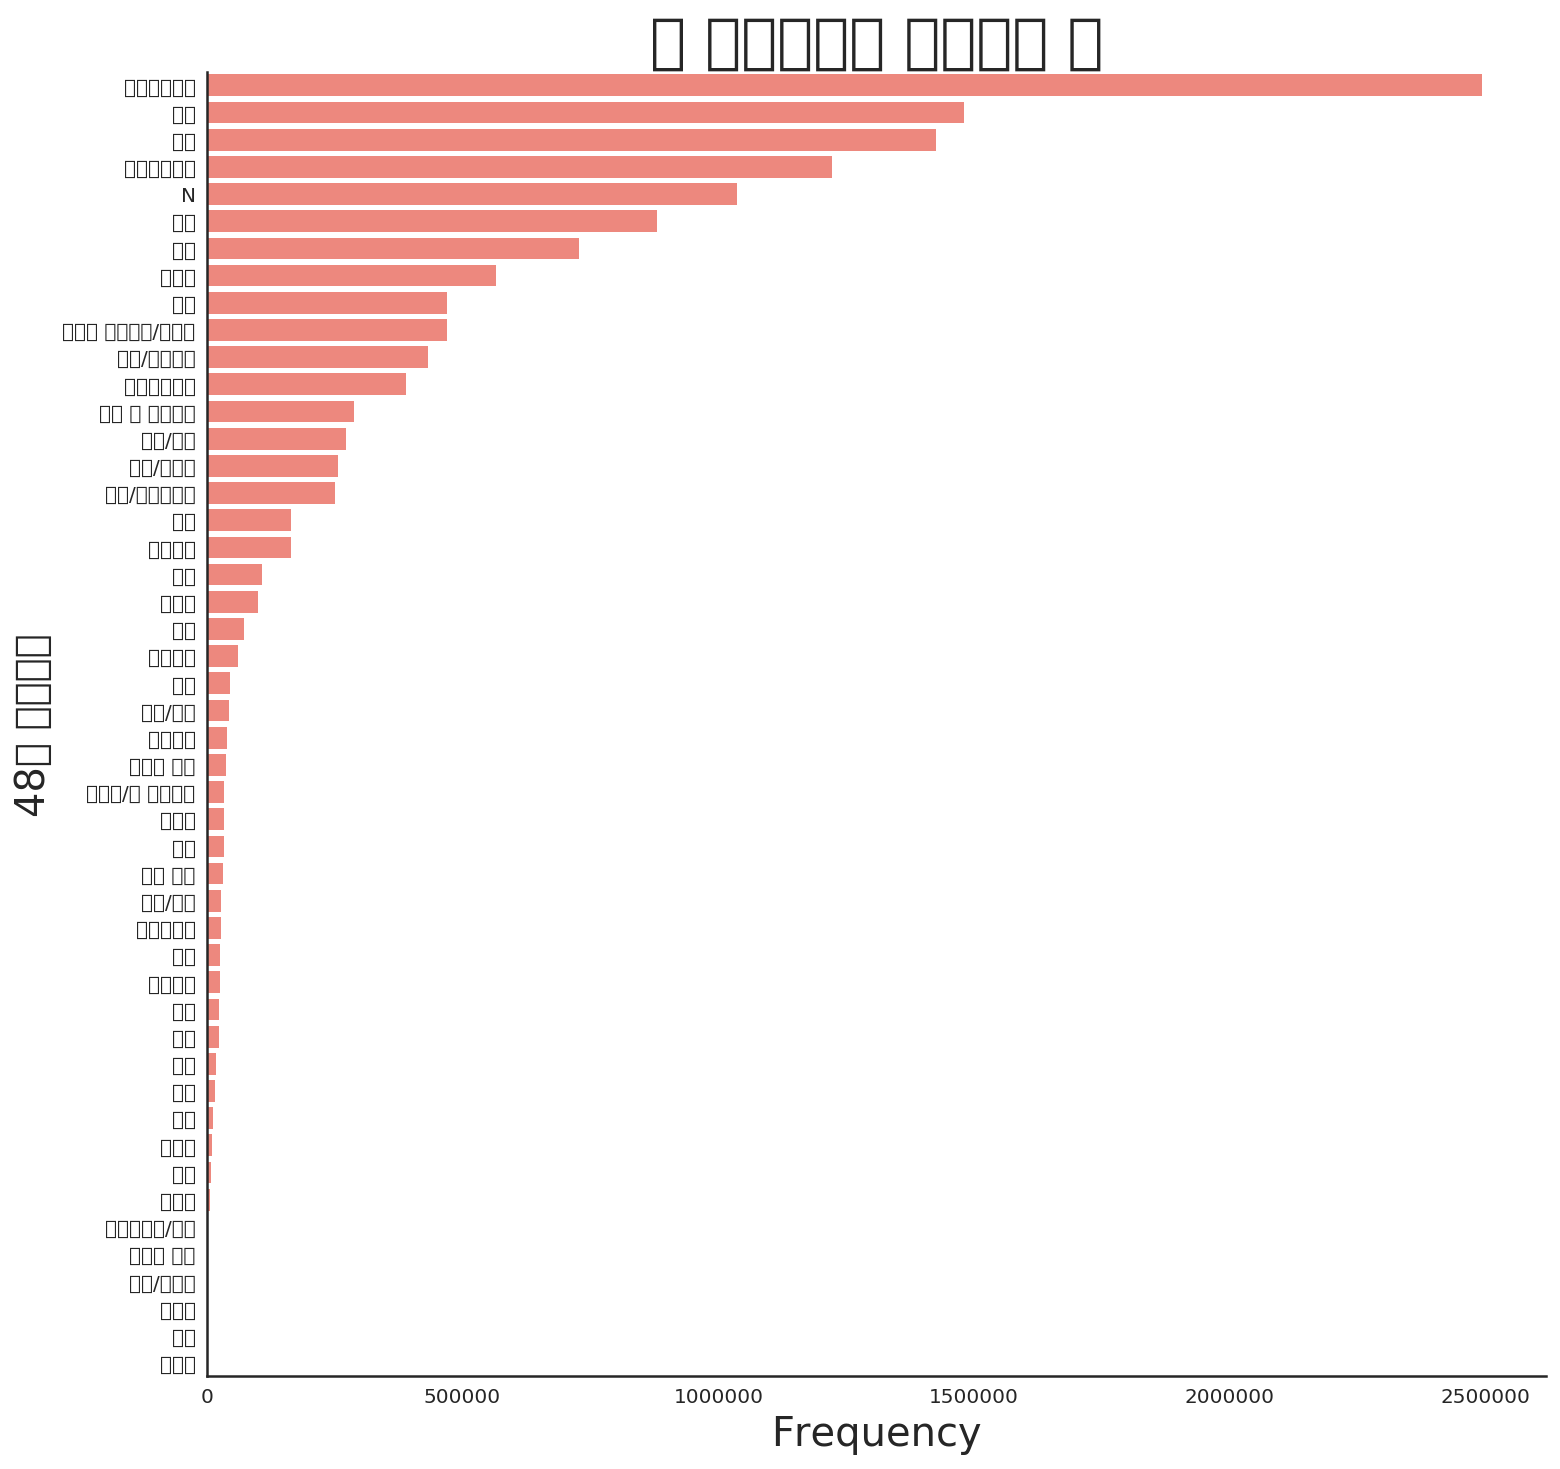

In [36]:
# 라이프스타일, 금융, 쇼핑, 커뮤니케이션, 소셜
# 도구와 생산성은 기본 내장 어플이라고 치면 그 아래로는 굵직한 몇 주제 이외에는 또이또이함...

app_category_count = usage_sum_time_notzero['app_category'].value_counts()

plt.figure(figsize=(12,12))
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('48개 카테고리', fontsize=20)
plt.title('각 카테고리별 앱데이터 수', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

sns.barplot(x=app_category_count.values, y=app_category_count.index, color='#ff796c')
sns.despine()

plt.show()

In [325]:
# 각 카테고리에 해당하는 앱 목록

# 소셜과 커뮤니케이션의 차이는 뭐지? -> 소셜은 그냥 SNS, 커뮤니케이션은 메신저와 전화 관련된 앱
# 라이프스타일은 어떤걸 말하는걸까? -> 멤버십, 포인트, 기타 등등 살면서 써야하는 앱들 다 때려박음 그냥... 애매하면 라이프스타일이다...
# 생산성? 도구? 역시 기본 내장 어플들이 다수이지만 실제로 생산성을 향상시켜주는 스케줄러, 기타 툴도 포함되는듯... 더봐야함
# N? nan이랑 같은건가? 아니면 Naver? -> none이 맞는듯
# 이벤트? -> 정말 이벤트를 위한 앱 (경품추첨 등)
# 음악/오디오, 음악은 왜 또 따로임? -> 음악은 음악 관련 게임

# 맞춤 설정? -> 폰 UX 스타일 바꾸는거
# 라이브러리/데모? - 진짜 도서관 관련 어플이었다....
# 단어는 교육 카테고리에 들어가면 안되나? -> 단어로 하는 게임...

usage_sum_time_notzero.groupby('app_category')['app_name'].unique()

app_category
N               [케어나우, 코레일전철톡, StyleMoney, 패널락, i-Adsnap, 말해, ...
건강/운동           [Samsung Health, 포켓닥터, 케어나우, 캐시슬라이드 스텝업, M건강보험...
교육              [공식 Free, 글로벌회화, 아이엠스쿨, 네이버 사전, 스쿨맘, Q-Net, 코참...
금융              [KB스타뱅킹, KB스마트원 통합인증, 신한i mobile, Toss, i-ONE뱅...
날씨              [원기날씨, 날씨, 미세미세, Weather & Clock Widget, 우리동네 ...
뉴스/잡지           [Google 뉴스, 트위터, The-K 매거진, Flipboard, Google ...
단어              [영단어 던전, 한글 끝말잇기, 대국민 끝말잇기, WordTower, Sudoku ...
데이트             [LoveLetter, Jchat, 1km, 욜로, 58Talk, 두리, 스윗미, ...
도구              [Google, 계산기, 음성 녹음, Smart Switch, 국세청 홈택스, T연...
도서/참고자료         [카카오페이지, NAVER, 원스토어 북스, YES24도서, 예스24 도서, 예스2...
동영상 플레이어/편집기    [YouTube, oksusu, 비디오, 스마트 DMB, TVING, MX 플레이어...
라이브러리/데모        [Clicker, 북토비, 의정부시도서관, 책 읽는 도시 인천, 경상남도교육청 통합...
라이프스타일          [MobileCX, NotiToMe, OK Cashbag, 틸리언, 서베이링크, 두...
롤플레잉            [Gamebox, AxE, Archlord Awake, 요괴, 듀랑고, 라그나로크M...
만화              [네이버 웹툰, SCViewer, 다음 웹툰, 레진코믹스, 투믹스, HTOON, 마.

In [37]:
usage_sum_time_notzero['app_category'].map(lambda x: 1 if x == 'N' else 0).value_counts()

0    12835464
1     1037208
Name: app_category, dtype: int64

In [38]:
usage_sum_time_notzero['null_category?'] = usage_sum_time_notzero['app_category'].map(lambda x: 1 if x == 'N' else 0)

In [48]:
# 카테고리가 명시되지 않은 앱 목록
# 카테고리가 분명히 있는데 그냥 표시가 안된 친구들이 많다
# 카테고리 있는 친구들로 맵핑시켜줌

notzero_null_cat = usage_sum_time_notzero[lambda x: x['null_category?'] == 1]
notzero_null_cat = notzero_null_cat.reset_index()
notzero_with_cat = usage_sum_time_notzero[lambda x: x['null_category?'] == 0][['app_name','app_category']].drop_duplicates()
notzero_notnull_cat = usage_sum_time_notzero[lambda x: x['null_category?'] == 0]

notzero_null_cat = notzero_null_cat.merge(notzero_with_cat, how='left', on='app_name').drop_duplicates(subset='index')
del notzero_null_cat['app_category_x']
notzero_null_cat.columns = ['index', 'panel_id', 'reg_cnt', 'package_name', 'app_name',
       'total_time_stamp', 'total_time', 'reg_date', 'total_time_hour',
       'total_time_minute', 'total_time_second', 'total_usage_time',
       'null_category?', 'app_category']

usage_sum_time_notzero_cat_apply = pd.concat([notzero_null_cat,notzero_notnull_cat])
del usage_sum_time_notzero_cat_apply['index']
del usage_sum_time_notzero_cat_apply['null_category?']

In [77]:
# 카테고리 결측치 103만개 -> 18만개로 확 줄임. 굿.

usage_sum_time_notzero_cat_apply.isnull().sum()

app_category         189150
app_name                  0
package_name              0
panel_id                  0
reg_cnt                   0
reg_date                  0
total_time                0
total_time_hour           0
total_time_minute         0
total_time_second         0
total_time_stamp          0
total_usage_time          0
dtype: int64

In [79]:
# 카테고리 딱히 없는 친구들은 N으로 표시해줌

usage_sum_time_notzero_cat_apply = usage_sum_time_notzero_cat_apply.fillna('N')

In [82]:
usage_sum_time_notzero_cat_apply[lambda x: x.app_category != 'N']['app_name'].nunique()

30131

In [81]:
# 레이블링된 앱 : 30131개
# 레이블 없는 앱 : 10990개
# 레이블이 없는 앱은 클러스터링으로 레이블을 달아줄까?

app_category_nunique = usage_sum_time_notzero_cat_apply.groupby('app_category')['app_name'].nunique()
app_category_nunique = app_category_nunique.reset_index().sort_values(by='app_name', ascending=False)
app_category_nunique

,app_category,app_name
0,N,10990
2,교육,3241
12,라이프스타일,2371
8,도구,2274
23,쇼핑,2031
30,엔터테인먼트,1455
3,금융,1236
21,생산성,1111
19,비즈니스,1060
45,커뮤니케이션,1038


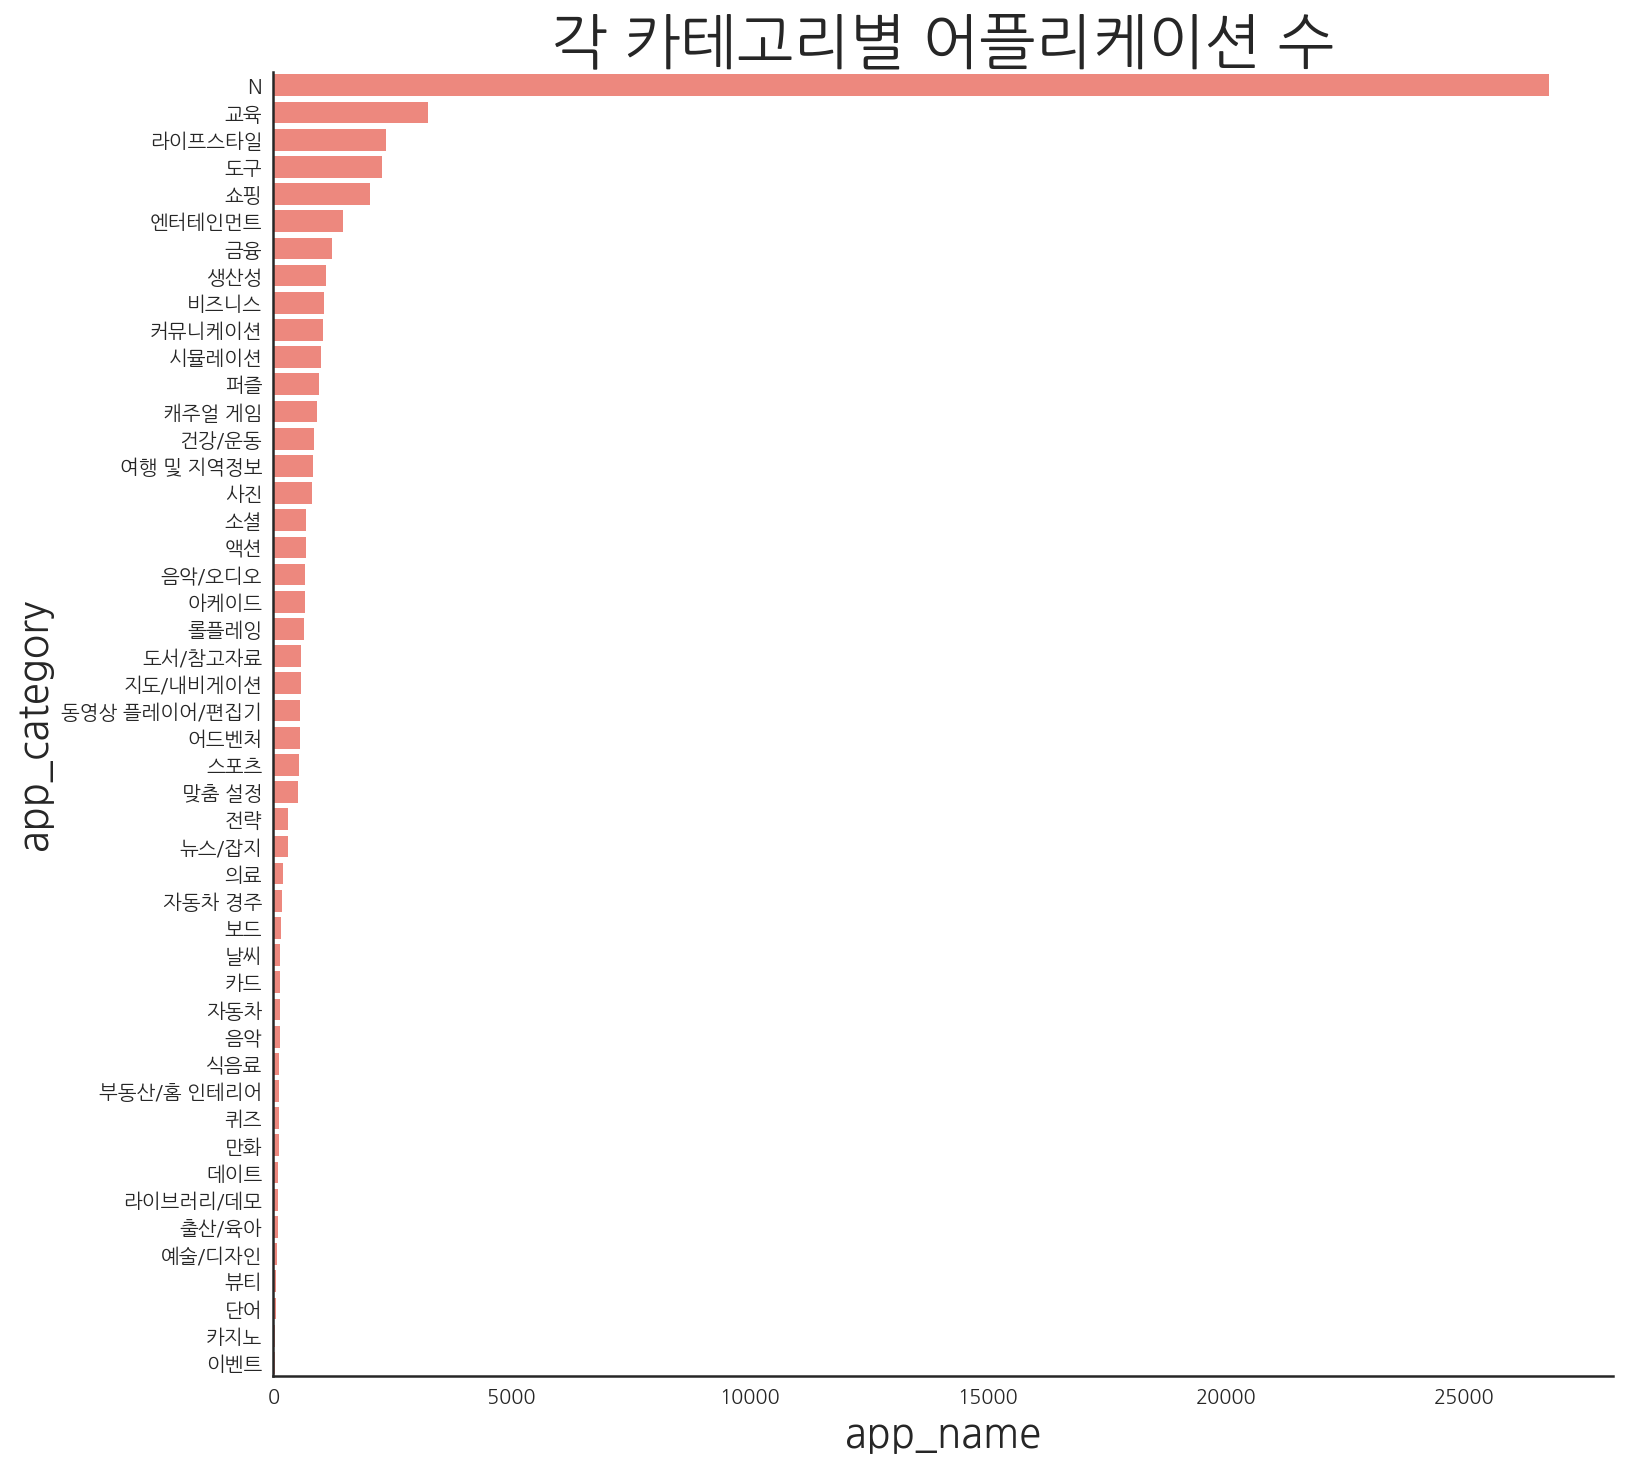

In [348]:
# 카테고리 없는 앱이 약 만개 이상 됨 

app_category_nunique = usage_sum_time_notzero.groupby('app_category')['app_name'].nunique()
app_category_nunique = app_category_nunique.reset_index().sort_values(by='app_name', ascending=False)

plt.figure(figsize=(12,12))
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('48개 카테고리', fontsize=20)
plt.title('각 카테고리별 어플리케이션 수', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

sns.barplot(x='app_name', y='app_category', data= app_category_nunique, color='#ff796c')
sns.despine()

plt.show()

In [ ]:
# 1주일은 약 10000분, 그 이상 사용된 앱은 뭘까?
# 그런 기록이 2000개 이상 있음

len(usage_sum_time_notzero[lambda x: x['total_usage_time'] > 10080])
usage_sum_time_notzero[lambda x: x['total_usage_time'] > 10080]['app_name'].unique()
len(usage_sum_time_notzero[lambda x: x['total_usage_time'] > 10080]['panel_id'].unique())